In [1]:
# This notebook extracts information of the inpgen calculatuion run on structures from OQMD, 
# which where extracted and written to files

In [2]:
# filelayout
# uuid, formula, struc_uuid, strucvol, natoms, natomtypes, runtime, kmax, nkpt, elements, rmts, gridpts, lmax, lnonsp, econfic, los

# Imports

In [1]:
# elements: 114x numbers? or get it from the formula? or is just put there the elements in the structure, Be, Ti, ...
# makes parsing harder but saves space...
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [2]:
# extract, runtime, inp.xml size, parameters: CutoffsL: kmax, ggff... RMT and corelevel setup for all elements

# also get some info about the content of COD first, 
# distribution of structures with how many atoms and what elementes they contain
# 3D or 2D?

#from aiida import load_dbenv, is_dbenv_loaded
#if not is_dbenv_loaded():
#    load_dbenv()
import sys,os
#from lxml import etree, objectify
#from lxml.etree import XMLSyntaxError, XPathEvalError
from pprint import pprint
#import time
import pandas as pd
import matplotlib.pyplot as pp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import json
import numpy as np
from collections import Counter



#from aiida.orm import QueryBuilder
#from aiida.orm import Code, CalculationFactory, DataFactory, Computer
#from aiida.orm import load_node
#from aiida.orm import JobCalculation, WorkCalculation
#from aiida_fleur.tools.common_aiida import get_nodes_from_group
from aiida.common.constants import elements as PeriodicTableElements
#from aiida_fleur.tools.ParameterData_util import extract_elementpara
#from aiida_fleur.tools.common_fleur_wf_util import get_natoms_element
from masci_tools.vis.plot_methods import default_histogram, histogram, set_plot_defaults
from masci_tools.vis.plot_methods import multiple_scatterplots, multiaxis_scatterplot, single_scatterplot
from aiida_fleur.tools.ParameterData_util import dict_merger
from aiida_fleur.tools.io_routines import write_results_to_file

_atomic_numbers = {data['symbol']: num for num, data in PeriodicTableElements.iteritems()}

#codename1 = 'inpgen_dev@local'
#code1 = Code.get_from_string(codename1)
#StructureData = DataFactory('structure')

head_dir = '/Users/broeder/work/data_phd/inpgen_on_oqmd/'
files_property_dict = ['/Users/broeder/work/data_phd/inpgen_on_oqmd/property_dict_oqmd_1k.json',
                      '/Users/broeder/work/data_phd/inpgen_on_oqmd/property_dict_oqmd_2k.json',
                      '/Users/broeder/work/data_phd/inpgen_on_oqmd/property_dict_oqmd_3k.json',
                      '/Users/broeder/work/data_phd/inpgen_on_oqmd/property_dict_oqmd_4k.json']

files_property_dict2 = [head_dir + 'property_dict_oqmd_1k_small.json',
                      head_dir + 'property_dict_oqmd_2k_small.json',
                      head_dir + 'property_dict_oqmd_3k_small.json',
                      head_dir + 'property_dict_oqmd_4k_small.json',
                      head_dir + 'property_dict_oqmd_5k_small.json',
                      head_dir + 'property_dict_oqmd_6k_small.json',
                      head_dir + 'property_dict_oqmd_7k_small.json',
                      head_dir + 'property_dict_oqmd_8k_small.json']

files_property_dict3 = [head_dir + 're_property_dict_oqmd_2k.json',
                      head_dir + 're_property_dict_oqmd_4k.json']#,
                      #head_dir + 'property_dict_oqmd_5k_small.json',
                      #head_dir + 'property_dict_oqmd_6k_small.json',
                      #head_dir + 'property_dict_oqmd_7k_small.json',
                      #head_dir + 'property_dict_oqmd_8k_small.json']
files_elemental_dict = [head_dir + 'elemental_dicts_oqmd_1k.json', 
                       head_dir + 'elemental_dicts_oqmd_2k.json',
                       head_dir + 'elemental_dicts_oqmd_3k.json',
                       head_dir + 'elemental_dicts_oqmd_4k.json',
                       head_dir + 'elemental_dicts_oqmd_5k.json', 
                       head_dir + 'elemental_dicts_oqmd_6k.json',
                       head_dir + 'elemental_dicts_oqmd_7k.json',
                       head_dir + 'elemental_dicts_oqmd_8k.json']
files_failed_dict = [head_dir + 'failed_calcs_oqmd_1k.json', 
                       head_dir + 'failed_calcs_oqmd_2k.json',
                       head_dir + 'failed_calcs_oqmd_3k.json',
                       head_dir + 'failed_calcs_oqmd_4k.json',
                       head_dir + 'failed_calcs_oqmd_5k.json', 
                       head_dir + 'failed_calcs_oqmd_6k.json',
                       head_dir + 'failed_calcs_oqmd_7k.json',
                       head_dir + 'failed_calcs_oqmd_8k.json']

all_elemental_dicts = head_dir + 'elemental_dicts_oqmd_all.json'
all_property_dicts = head_dir + 'property_dict_oqmd_all.json'

# Read in files

In [3]:
property_dict2 = {}
for filename in files_property_dict3:
    filet = open(filename, 'r')
    property_dictt = json.load(filet)
    filet.close()
    property_dict2 = dict_merger(property_dict2, property_dictt)

In [4]:

filet = open(files_property_dict2[0], 'r')
property_dict = json.load(filet)
filet.close()

In [5]:
filet = open(all_property_dicts, 'r')
property_dict = json.load(filet)
filet.close()

In [6]:
property_dict = {}
for filename in files_property_dict2:
    filet = open(filename, 'r')
    property_dictt = json.load(filet)
    filet.close()
    property_dict = dict_merger(property_dict, property_dictt)

In [7]:
filet = open(all_elemental_dicts, 'r')
elemental_dict = json.load(filet)
filet.close()


In [59]:
elemental_dict = {}
for filename in files_elemental_dict:
    filet = open(filename, 'r')
    elemental_dictt = json.load(filet)
    filet.close()
    elemental_dict = dict_merger(elemental_dict, elemental_dictt)

don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know w

don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know w

don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know w

don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know w

don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know w

don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know w

don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know what to do with element : symbol
don't know what to do with element : name
don't know w

In [9]:
failed_calc_dict = {}
for filename in files_failed_dict:
    filet = open(filename, 'r')
    failed_calc_dictt = json.load(filet)
    filet.close()
    failed_calc_dict = dict_merger(failed_calc_dict, failed_calc_dictt)

don't know what to do with element : 25134
don't know what to do with element : 17618
don't know what to do with element : 18609
don't know what to do with element : 34419
don't know what to do with element : 25351
don't know what to do with element : 19478
don't know what to do with element : 9537
don't know what to do with element : 18763
don't know what to do with element : 88147
don't know what to do with element : 34677
don't know what to do with element : 16762
don't know what to do with element : 8059
don't know what to do with element : 23837
don't know what to do with element : 32117
don't know what to do with element : 22054
don't know what to do with element : 9855
don't know what to do with element : 4195
don't know what to do with element : 6090
don't know what to do with element : 18330
don't know what to do with element : 7834
don't know what to do with element : 2821
don't know what to do with element : 8309
don't know what to do with element : 32133
don't know what to 

In [10]:
len(failed_calc_dict.keys()), len(property_dict[u'natomtypes'])+len(failed_calc_dict.keys())

(524, 824912)

In [11]:
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)
#a = np.array([1, 2, 3,3])
#print(json.dumps({'aa': [2, (2, 3, 4), a], 'bb': [2]}, cls=NumpyEncoder))

In [310]:
with open(head_dir +'elemental_dicts_oqmd_all.json', 'w') as fp:
    json.dump(elemental_dict, fp, cls=NumpyEncoder)

In [21]:
with open(all_property_dicts, 'w') as fp:
    json.dump(property_dict, fp, cls=NumpyEncoder)

In [12]:
#Missing symmetry group and number of symetry operations, number of symmert operation found
#Number of symmetries missed compared with symmetry group to find possible weaknesses in inpgen.
# kpoints density

In [60]:
print(elemental_dict['60'].keys())

[u'name', u'rmt', u'lo', u'symbol', u'jri', u'lmax', u'mass', u'combined', u'dx', u'econfig', u'lnonsph']


In [13]:
print(property_dict.keys())

[u'strucvol', u'jri', u'struc_uuid', u'oqmd_label', u'struc_symg', u'uuid', u'los', u'nsym_inpgen', u'nspecies', u'inpgen_symg', u'natomtypes', u'rmts', u'formula', u'vasp_magmom', u'natomtypes_org', u'natoms', u'elements', u'gmaxxc', u'gmax', u'nkpt', u'jspins', u'vasp_delta_e', u'struc_symsm', u'process_id', u'dx', u'nlines_inpxml', u'nsym', u'lnonsph', u'inpxml_size', u'lmax', u'kmax', u'pbc', u'runtime', u'oqmd_id']


In [14]:
len(property_dict[u'natomtypes'])

824388

In [51]:
property_dict[u'natomtypes_org']

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [15]:
property_dict[u'process_id'][:5]

[0, 1, 0, 1, 2]

In [16]:
property_dict[u'formula']

[u'F18La6',
 u'Ce6F18',
 u'Ce6F18',
 u'H8Li4O12P4',
 u'Ba4S12Te4',
 u'Li2Nd2O24P8',
 u'Ca6H12O20Si4',
 u'Cl2Na2O4',
 u'Cl10Cs6Mn2',
 u'As12Ca10Ga4',
 u'Fe6O14Yb4',
 u'Cl10Cs3ORe2',
 u'FH6NaO6Te',
 u'Ge12S24',
 u'Ga4S4',
 u'K2O8Tc2',
 u'K2O8Re2',
 u'O8Os2',
 u'Fe6Sn4',
 u'Be8F28Li8Rb4',
 u'Bi2Ce2O2S4',
 u'La4O10Re2',
 u'C4H12Co2N4O6S4',
 u'Fe2S6U2',
 u'',
 u'Cl8Te12',
 u'Br8Te16',
 u'I8Te16',
 u'I4Te4',
 u'I8Te8',
 u'Cs21O3',
 u'Mg2P8',
 u'Gd2P10',
 u'Ba6Cl4Cu4O8',
 u'C8Cu8N8S8',
 u'Ca2H12O18P4',
 u'C4N4Pb2S4',
 u'C4Ca4O12',
 u'F24Mo4',
 u'Ca4Sb2',
 u'K8O8Sn2',
 u'C8Bi2N8Rb2S8',
 u'Cl4Fe8O16P4',
 u'Cl4H8Na4O20',
 u'Ba2Ni2O6',
 u'CuK2N6O12Sr',
 u'K2N6NiO12Sr',
 u'C6H6Cl8Fe3N6',
 u'Hf4S20Y8',
 u'Nb4O14Sr4',
 u'Ba2MnO6W',
 u'As6Ca2',
 u'O20V12',
 u'O8V4',
 u'Cr2Cs4F12Na2',
 u'Cs4F12Fe2Na2',
 u'Si4U2',
 u'Cu6Se4',
 u'Cu2Se4',
 u'Cu4Se8',
 u'In6O18Y6',
 u'Mg2Na4Sn2',
 u'O14S2Te4',
 u'Hg2K12S8',
 u'Cr2O6U',
 u'Ba12Fe4S20',
 u'Cu4Li4O4',
 u'Mg2O6V2',
 u'AlF4K',
 u'Fe2I6O18',
 u'Ca8H4N4',
 u'B5

In [17]:
property_dict[u'natomtypes']

[24,
 24,
 24,
 28,
 20,
 36,
 42,
 8,
 18,
 26,
 24,
 13,
 15,
 36,
 8,
 12,
 12,
 10,
 10,
 48,
 9,
 16,
 32,
 10,
 22,
 20,
 24,
 24,
 8,
 16,
 24,
 10,
 12,
 22,
 32,
 36,
 14,
 20,
 28,
 5,
 18,
 28,
 32,
 36,
 10,
 16,
 16,
 29,
 32,
 22,
 8,
 4,
 32,
 12,
 20,
 20,
 6,
 10,
 6,
 6,
 30,
 8,
 20,
 22,
 9,
 36,
 12,
 10,
 5,
 26,
 16,
 128,
 24,
 8,
 6,
 14,
 28,
 28,
 28,
 24,
 12,
 8,
 24,
 24,
 12,
 26,
 24,
 10,
 32,
 4,
 32,
 32,
 30,
 24,
 5,
 5,
 24,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 7,
 32,
 20,
 12,
 3,
 12,
 20,
 16,
 8,
 28,
 15,
 24,
 10,
 8,
 6,
 7,
 24,
 3,
 36,
 8,
 10,
 13,
 20,
 24,
 8,
 20,
 20,
 20,
 20,
 20,
 14,
 22,
 16,
 7,
 11,
 8,
 38,
 68,
 28,
 13,
 36,
 16,
 12,
 18,
 12,
 12,
 20,
 16,
 12,
 24,
 28,
 27,
 30,
 9,
 26,
 26,
 36,
 36,
 19,
 14,
 12,
 16,
 3,
 18,
 18,
 2,
 4,
 16,
 26,
 28,
 24,
 10,
 28,
 27,
 7,
 26,
 16,
 8,
 32,
 20,
 36,
 28,
 20,
 10,
 36,
 16,
 20,
 2,
 8,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 20,
 9,
 4,
 10,
 17,
 6,
 6,
 14,

In [18]:
total = 0
for entr in property_dict[u'nspecies']:
    total = total + int(entr)
len(property_dict[u'nspecies'])
print(total)

2527224


In [11]:
len(property_dict['kmax'])

824388

# Plot data

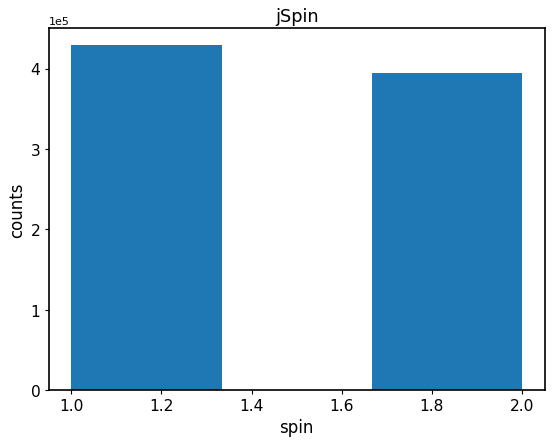

In [10]:
default_histogram(property_dict['jspins'],bins=3, log=False, title='jSpin', xlabel='spin')

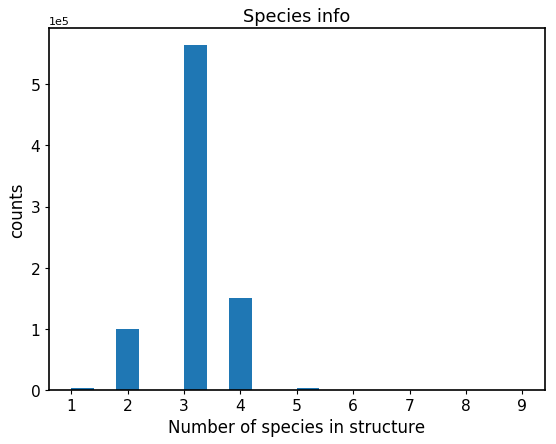

In [21]:
default_histogram(property_dict['nspecies'], bins=20, log=False, title='Species info', xlabel='Number of species in structure')

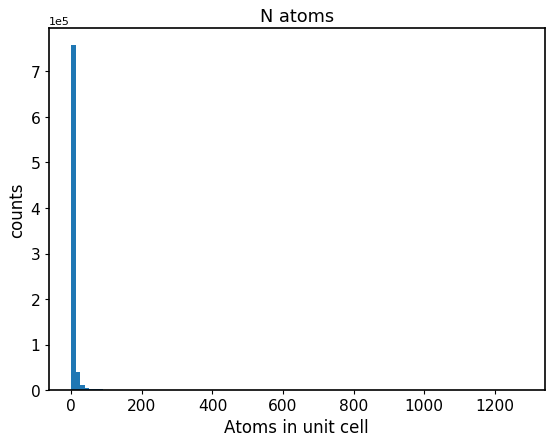

In [22]:
default_histogram(property_dict['natoms'], bins=100, log=False, title='N atoms', xlabel='Atoms in unit cell')#, range=[0,2000])

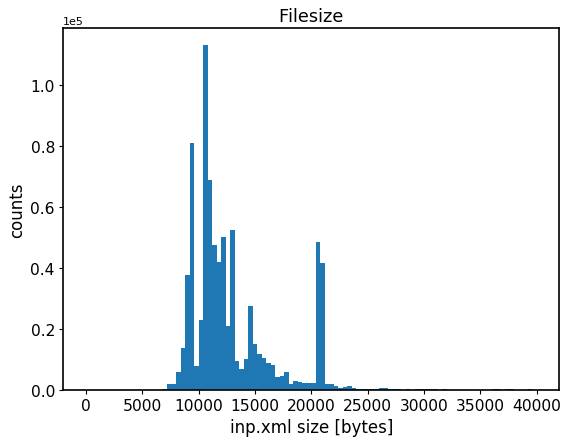

In [23]:
default_histogram(property_dict['inpxml_size'],bins=100, log=False, title='Filesize', xlabel='inp.xml size [bytes]', range=[0,40000])

In [31]:
pd_prop_dict = pd.DataFrame(property_dict)
keys = [u'inpxml_size', u'natoms', u'nlines_inpxml', u'runtime', u'kmax', u'lmax', 'natoms', 'nkpt']
property_dict_sliced = pd_prop_dict[keys]

In [33]:
df_file_size = pd_prop_dict[[u'inpxml_size']]*0.000001
a = df_file_size.sum()
print(a)

inpxml_size    10995.352456
dtype: float64


In [75]:
property_dict_sliced.describe()

inpxml_size         natoms  nlines_inpxml        runtime  \
count  824388.000000  824388.000000  824388.000000  824388.000000   
mean    13337.594016       6.840018     219.612100       0.030180   
std      5429.133213      16.190596      78.420246       1.337947   
min      5468.000000       0.000000      96.000000       0.004586   
25%     10528.000000       3.000000     175.000000       0.012206   
50%     11649.000000       4.000000     191.000000       0.017403   
75%     14738.000000       4.000000     235.000000       0.027571   
max    483029.000000    1278.000000    5400.000000    1191.643143   

                kmax         natoms           nkpt  
count  824388.000000  824388.000000  824388.000000  
mean        3.925873       6.840018      59.617178  
std         0.628195      16.190596      52.146357  
min         3.300000       0.000000       1.000000  
25%         3.600000       3.000000      32.000000  
50%         3.800000       4.000000      44.000000  
75%         4.000000       4.000000      60.000000  
max        34.100000    1278.000000    5324.000000

In [76]:
property_dict_sliced.stats()

AttributeError: 'DataFrame' object has no attribute 'stats'

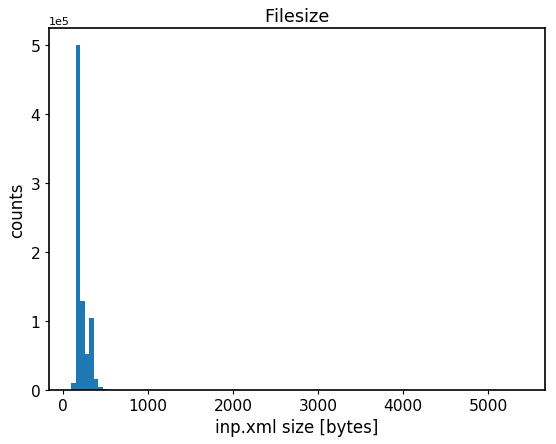

In [24]:
default_histogram(property_dict['nlines_inpxml'],bins=100, log=False, title='Filesize', xlabel='inp.xml size [bytes]')

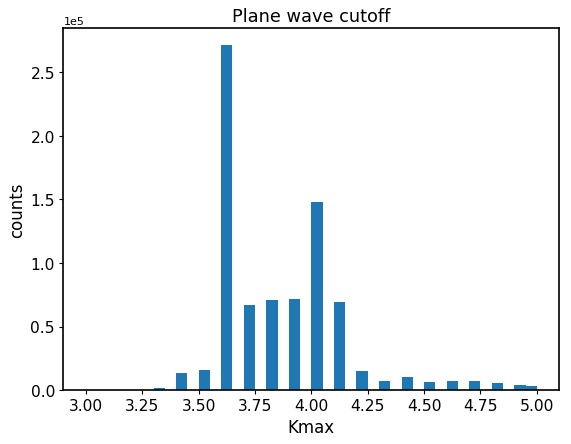

34.1


In [25]:
default_histogram(property_dict['kmax'], bins=40, log=False, title='Plane wave cutoff', xlabel='Kmax', range=[3, 5])
print(max(property_dict['kmax']))

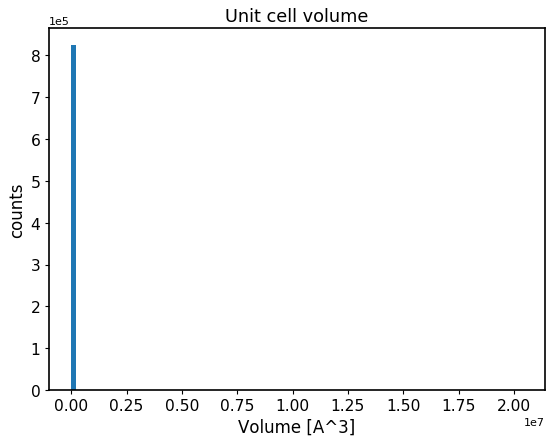

In [26]:
default_histogram(property_dict['strucvol'], bins=100, log=False, title='Unit cell volume', xlabel='Volume [A^3]')

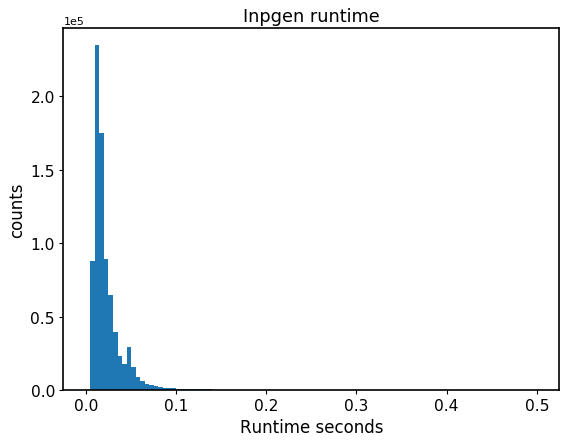

In [27]:
default_histogram(property_dict['runtime'], bins=100, log=False, range=[0,0.5], title='Inpgen runtime', xlabel='Runtime seconds')

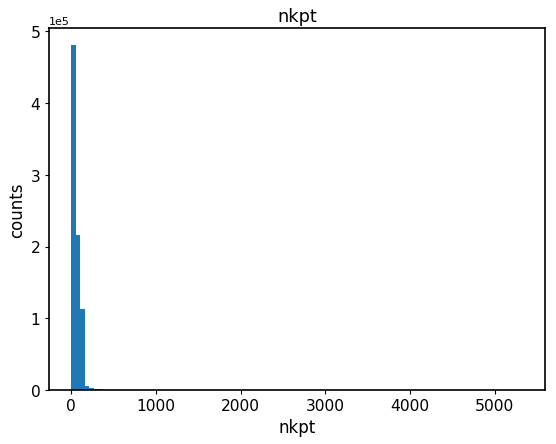

In [28]:
default_histogram(property_dict['nkpt'], bins=100, log=False, title='nkpt', xlabel='nkpt')

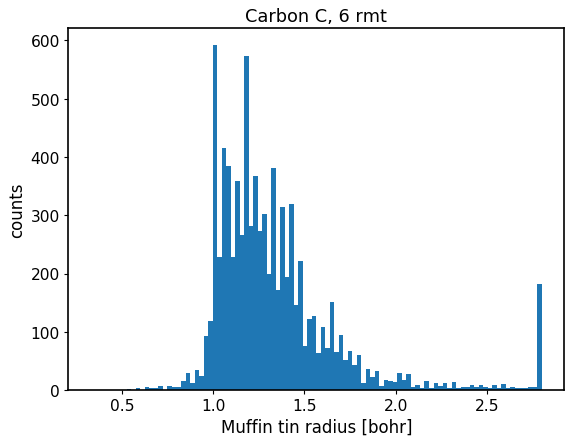

In [29]:
default_histogram(elemental_dict['6']['rmt'], bins=100, log=False, title='Carbon C, 6 rmt', xlabel='Muffin tin radius [bohr]')

# Plot property dict data

## Restructuring of Data

In [30]:
nspecies = property_dict['nspecies']
natoms = property_dict['natoms']
natomsgroup = property_dict['natomtypes']
elements_pr = property_dict['elements']
nelements = []
symmetry_group = property_dict['struc_symg']


In [31]:
natoms_type = {}
natom_group_types = {}
symmetry_group_types = {}

natoms_size = {10:[], 20:[], 50: [], 100:[], 101 : []}
for i, entr in enumerate(property_dict['nspecies']):
    #print(entr)
    if entr >5:
        entr = 5

    natomst2 = natoms[i]
    if natomst2 <=10:
        natoms_size[10].append(natomst2)
    elif 10< natomst2 <=20:
        natoms_size[20].append(natomst2)
    elif 20< natomst2 <=50:
        natoms_size[50].append(natomst2)
    elif 50< natomst2 <=100:
        natoms_size[100].append(natomst2)
    else:
        natoms_size[101].append(natomst2)
    #natomst.append(natoms[i])
    #natoms_type[entr] = natomst        

    natomst = natoms_type.get(entr, [])
    natomst.append(natoms[i])
    natoms_type[entr] = natomst
    
    natomstt = natom_group_types.get(entr, [])
    natomstt.append(natomsgroup[i])
    natom_group_types[entr] = natomstt

    symmetry_groupt = symmetry_group_types.get(entr, [])
    symmetry_groupt.append(symmetry_group[i])
    symmetry_group_types[entr] = symmetry_groupt
    #Check if there is a difference between species and nelements:
    # Answer, no, only some elements are not parsed. Also means that inpgen does not create several species for magnetic calculations
    #nelement = len(elements_pr[i])
    #nelements.append(nelement)
    #if nelement > 5:
    #    print(elements_pr[i])
    #if nelement != nspecies[i]:
    #    print(nelement, elements_pr[i], nspecies[i])

In [32]:
symmetry_group_types = {'Monoclinic' :[], 'Orthorhombic': [], 'Tetragonal': [], 'Trigonal' : [], 'Hexagonal' : [], 'Cubic' : []}
symmetry_group_types_percent = {'Monoclinic     ' : 0.0, 'Orthorhombic': 0.0, 'Tetragonal     ': 0.0, 'Trigonal         ' : 0.0, 'Hexagonal     ' : 0.0, 'Cubic           ' : 0.0}
# spaces for legend alignment... not so nice, also not a monospace font...

# 1-15 Monoclinic, 16-74 Orthorhombic, 75-142, Tetragonal, 143-167 Trigonal, 168-194 Hexagonal, 195-230 Cubic
for i, entr in enumerate(symmetry_group): 
    if entr in [i for i in range(195,231)]:
        symmetry_group_types['Cubic'].append(entr)
    elif entr in  [i for i in range(16,75)]:
        symmetry_group_types['Orthorhombic'].append(entr)
    elif entr in  [i for i in range(75,143)]:
        symmetry_group_types['Tetragonal'].append(entr)
    elif entr in  [i for i in range(143,168)]:
        symmetry_group_types['Trigonal'].append(entr)
    elif entr in  [i for i in range(168,194)]:
        symmetry_group_types['Hexagonal'].append(entr)
    elif entr in  [i for i in range(1,16)]:
        symmetry_group_types['Monoclinic'].append(entr)

total = len(symmetry_group)
for key, val in symmetry_group_types_percent.iteritems():
    symmetry_group_types_percent[key]= len(symmetry_group_types[key.rstrip()])/float(total)

In [33]:
len(nspecies), len(natoms), len(natomsgroup)

(824388, 824388, 824388)

## Plot Natoms and Natomstypes

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5]


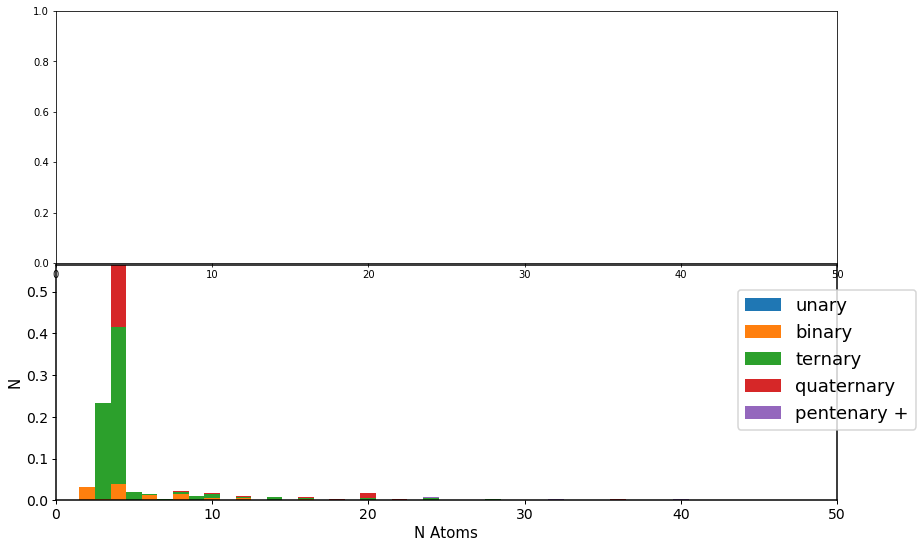

In [34]:
fig, ax1 = pp.subplots(num=None, figsize=(14,9))

divider = make_axes_locatable(ax1)
ax2 = divider.append_axes("top",3.5, pad=0.02, sharex=ax1)#, sharey=ax1)
bins = [i for i in np.linspace(0.5, 50.5, num=51)]
#bins = [i for i in np.linspace(0.5, 11.5, num=12)] + [i for i in np.linspace(12.5, 200.5, num=21)]
print(bins)
ax1 = histogram([natoms_type[1],natoms_type[2],natoms_type[3],natoms_type[4],natoms_type[5]], 
                bins=bins, legend=True, cumulative=0,
                label=['unary', 'binary', 'ternary', 'quaternary', 'pentenary +'],#natoms_type.keys(),
                range=[0.5,50.5],#range=[0.5,200.5],
                log=False, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                xlabel='N Atoms', limits=[[0, 50],[None,None]], #0.3,3.1]
                ylabel=u'N',
                legend_option={'bbox_to_anchor' : (0.85, 0.97), 'fontsize' : 18, 'borderaxespad' : 1 , 'loc' : 2, 'fancybox' : True} #'linewidth' : 1.5,, 'title' : 'Legend',
, density=True, saveas='All_natoms_oqmd', axis=ax1)# type=bar_stack

#bins = [i for i in np.linspace(0.5, 200.5, num=201)]
#bins = [i for i in np.linspace(0.5, 11.5, num=12)] + [i for i in np.linspace(12.5, 400.5, num=21)]
#print(bins)
ax2.xaxis.set_label_position('top')
ax2.xaxis.tick_top()
ax2 = histogram([natom_group_types[1],natom_group_types[2],natom_group_types[3],natom_group_types[4],natom_group_types[5]], 
                bins=bins, legend=False, cumulative=0,
                label=natom_group_types.keys(),
                range=[0.5,50.5],#range=[0.5,200.5],
                log=False, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                xlabel='N Atomstypes', limits=[[0, 50],[None,None]], #0.3,3.1]
                ylabel=u'N',
                #legend_option={'bbox_to_anchor' : (0.85, 0.97), 'fontsize' : 18, 'borderaxespad' : 1 , 'loc' : 2, 'fancybox' : True} #'linewidth' : 1.5,, 'title' : 'Legend',
                density=True, saveas='All_natoms_oqmd', axis=ax2)# type=bar_stack




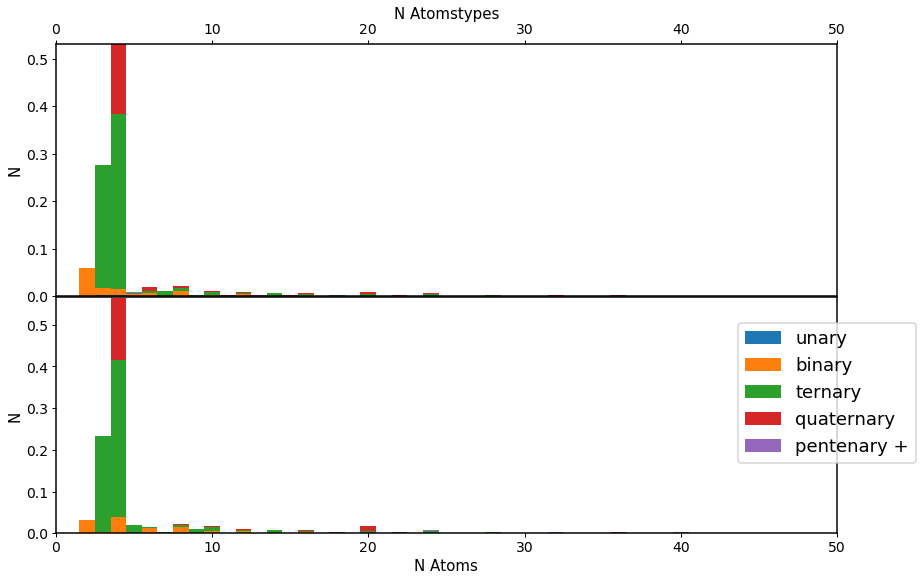

In [35]:
fig

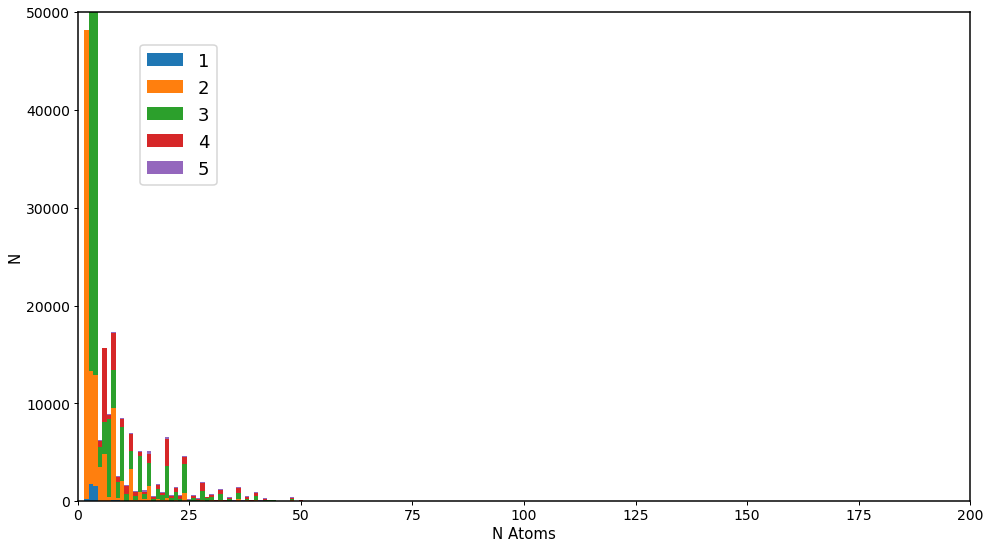

In [36]:
fig = pp.figure(num=None, figsize=(16,9))
ax1 = fig.add_subplot(111)
#bins = [i for i in np.linspace(0.5, 200.5, num=201)]
#bins = [i for i in np.linspace(0.5, 11.5, num=12)] + [i for i in np.linspace(12.5, 400.5, num=21)]
#print(bins)
ax1 = histogram(natom_group_types.values(), 
                bins=bins, legend=True, 
                label=natom_group_types.keys(),
                range=[0.5,200.5],#range=[0.5,200.5],
                log=False, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                xlabel='N Atoms', limits=[[0, 200],[0, 50000]], #0.3,3.1]
                ylabel=u'N',
                legend_option={'bbox_to_anchor' : (0.05, 0.97), 'fontsize' : 18, 'borderaxespad' : 1 , 'loc' : 2, 'fancybox' : True} #'linewidth' : 1.5,, 'title' : 'Legend',
, density=False, saveas='All_natoms_oqmd', axis=ax1)# type=bar_stack



In [37]:
max(natoms_size[20])

20

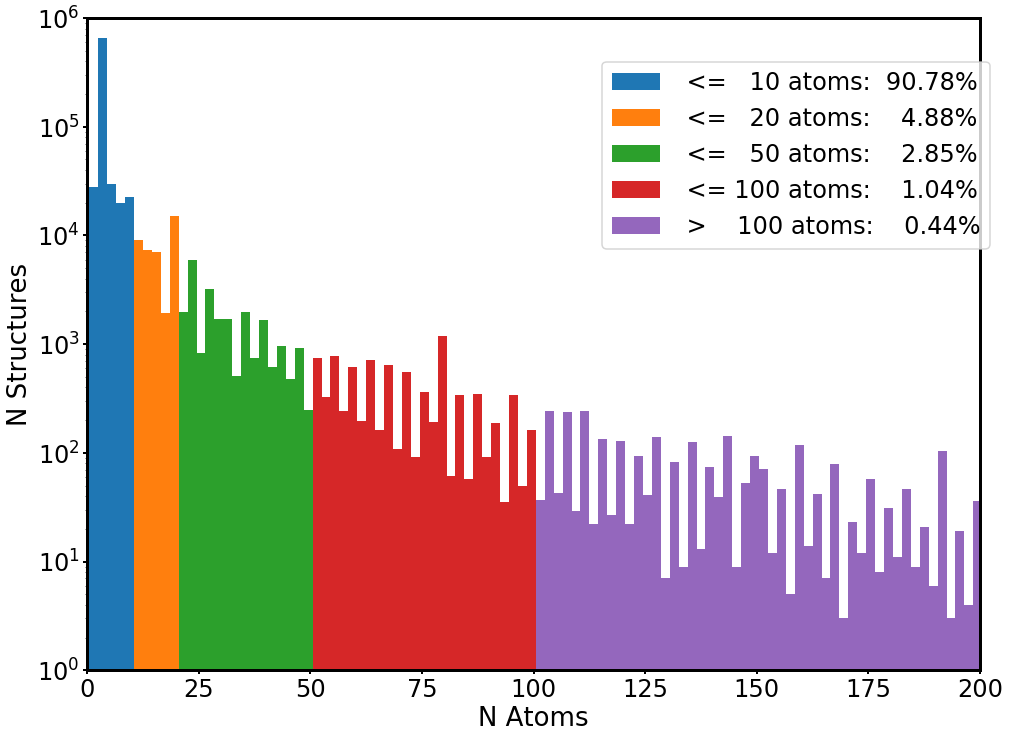

In [70]:
set_plot_defaults(labelfonstsize=26, ticklabelsize=24, axis_linewidth=3.0, tick_paramsx = {'size' : 4.0, 'width' : 2.0,'labelsize' : 24,
                                     'length' : 5}, tick_paramsy = {'size' : 4.0, 'width' : 2.0,
                                     'labelsize' : 24,
                                     'length' : 5})
fig, ax1 = pp.subplots(num=None, figsize=(16,12))#16,9))
total = len(natoms)
#print(max(natoms))
labels = [r' <=   10 atoms:  {0:.2f}%'.format(len(natoms_size[10])/float(total)*100),
          r' <=   20 atoms:    {0:.2f}%'.format(len(natoms_size[20])/float(total)*100),
          r' <=   50 atoms:    {0:.2f}%'.format(len(natoms_size[50])/float(total)*100),
          r' <= 100 atoms:    {0:.2f}%'.format(len(natoms_size[100])/float(total)*100),
          r' >    100 atoms:    {0:.2f}%'.format(len(natoms_size[101])/float(total)*100)]
bins = [i for i in np.linspace(0.5, 200.5, num=101)] + [i for i in np.linspace(202.5, 1300.5,  num=101)]
#print(bins)
ax1 = histogram([natoms_size[10], natoms_size[20], natoms_size[50], natoms_size[100], natoms_size[101]],#natoms, 
                bins=bins, 
                legend=True, cumulative=0,
                label=labels,#['unary', 'binary', 'ternary', 'quaternary', 'pentenary +'],#natoms_type.keys(),
                #range=[0.5,400.5],#range=[0.5,200.5],
                log=True, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                xlabel='N Atoms', limits=[[0, 200],[0,1000000]], #0.3,3.1]
                ylabel=u'N Structures',
                legend_option={'bbox_to_anchor' : (0.55, 0.97), 'fontsize' : 24, 'borderaxespad' : 1 , 'loc' : 2, 'fancybox' : True} #'linewidth' : 1.5,, 'title' : 'Legend',
, density=False, saveas='All_natoms_oqmd', axis=ax1)# type=bar_stack



In [39]:
fig.savefig('OQMD_structures_sizes_histo1.pdf', format='pdf')

## Plot Natomtypes per element average for all elements

We want to find out how many chemical environments (core-level shifts) we can suspect on average for
['unary', 'binary', 'ternary', 'quaternary', 'pentenary +']
This information is not there, since we only have the number of atom types, not what element they are...
we can only devide them by the species, to get an average...

In [40]:
#[u'strucvol', u'nsym_inpgen', u'jri', u'struc_uuid', u'oqmd_label', u'sym_op_inpgen', u'sym_op', u'uuid', u'los', u'sym_notfound',
#u'nspecies', u'inpgen_symg', u'atomtypes_elm', u'natomtypes', u'econfig', u'trans_not', u'vasp_magmom', u'natomtypes_org',
#u'natoms', u'elements', u'gmaxxc', u'gmax', u'nkpt', u'jspins', u'struc_symg', u'rmts', u'struc_symsm', u'process_id', u'dx', u'formula', u'nlines_inpxml', u'nsym', u'lnonsph', u'vasp_delta_e', u'inpxml_size', u'lmax', u'kmax', u'pbc', u'runtime', u'oqmd_id']

In [42]:
natom_types = property_dict2[u'natomtypes_org']

In [44]:
property_dict2[u'natomtypes_org']

[]

In [14]:
natom_types = property_dict2[u'natomtypes']
natom_types_elm = property_dict2[u'atomtypes_elm']
nspecies = property_dict2[u'nspecies']
print(len(natom_types), len(nspecies))
#natom_per_species = [val/float(nspecies[i]) for i, val in enumerate(natom_types)]

(399795, 0)


In [17]:
atomtyp_element_ditc = {}
total_natomtypes = {}
for atomype_struc in natom_types_elm:
    keys = Counter(atomype_struc[0]).keys()
    values = Counter(atomype_struc[0]).values()
    tt = total_natomtypes.get(len(keys), [])
    tt.append(max(values))#val)
    total_natomtypes[len(keys)] = tt
    for i, val in enumerate(values):
        tt2 = atomtyp_element_ditc.get(keys[i], [])
        tt2.append(val)
        atomtyp_element_ditc[keys[i]] = tt2

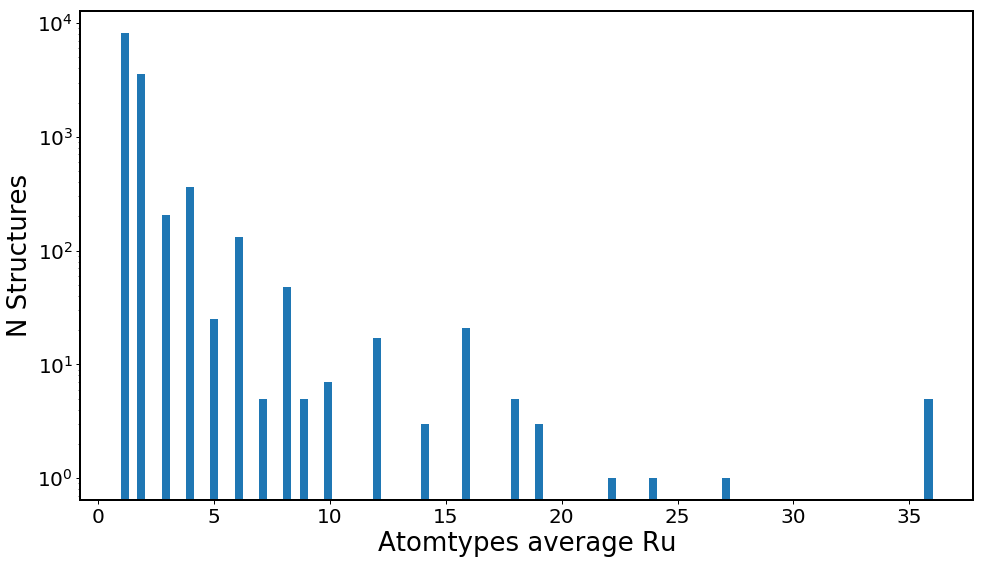

(64.83726866624121, 35.16273133375878)


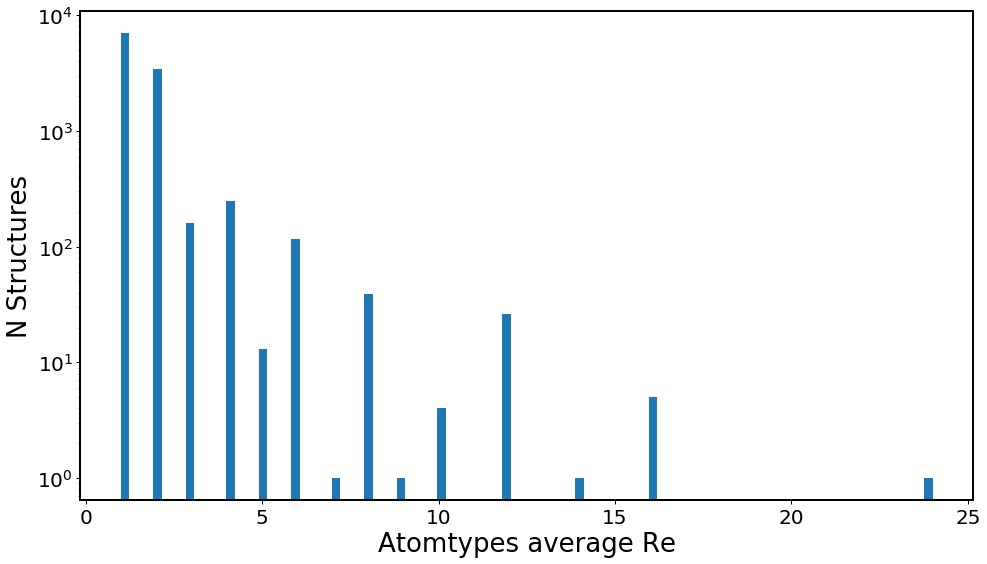

(63.29975496869045, 36.70024503130955)


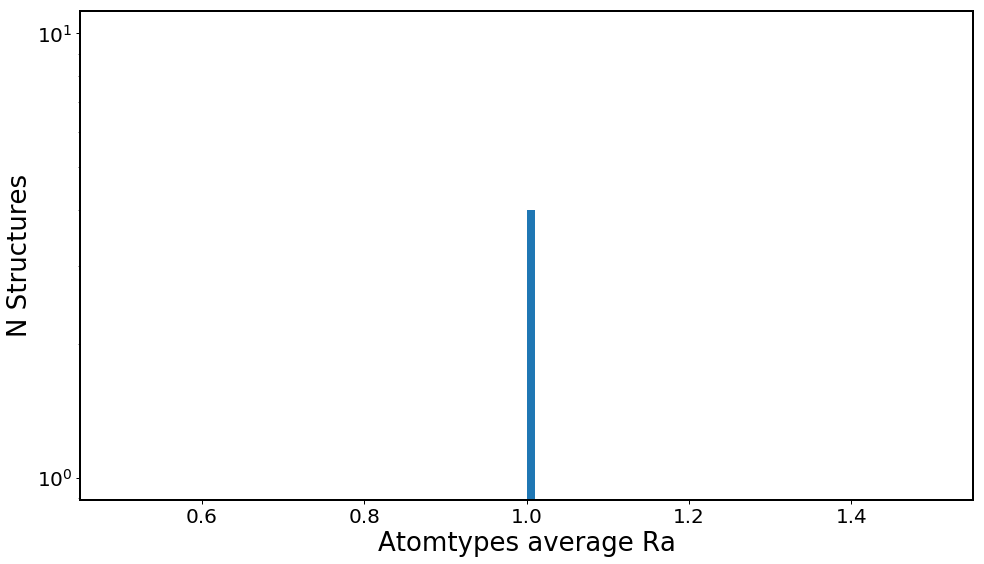

(100.0, 0.0)


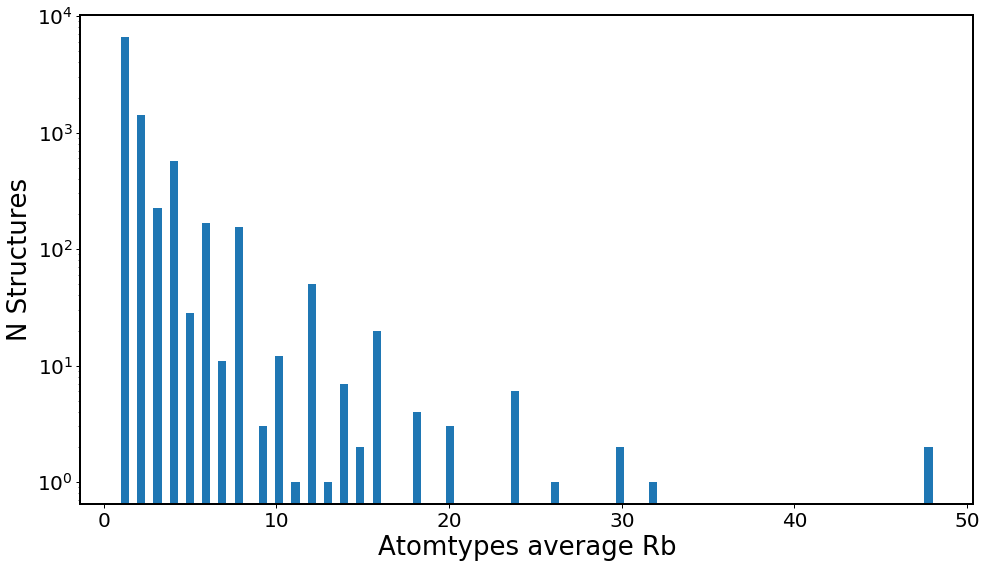

(71.04580812445981, 28.954191875540193)


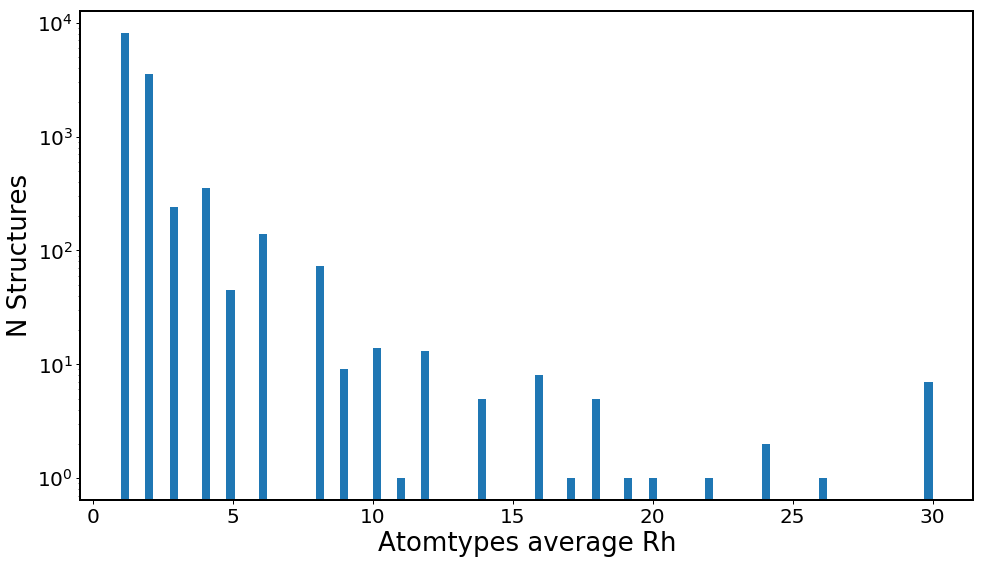

(64.37330785156871, 35.62669214843128)


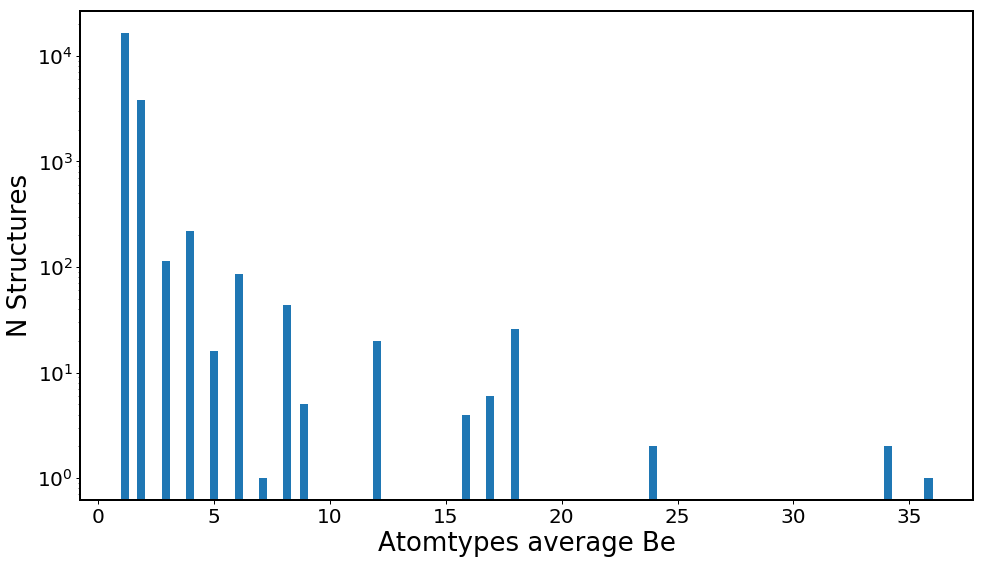

(79.03965991981063, 20.960340080189365)


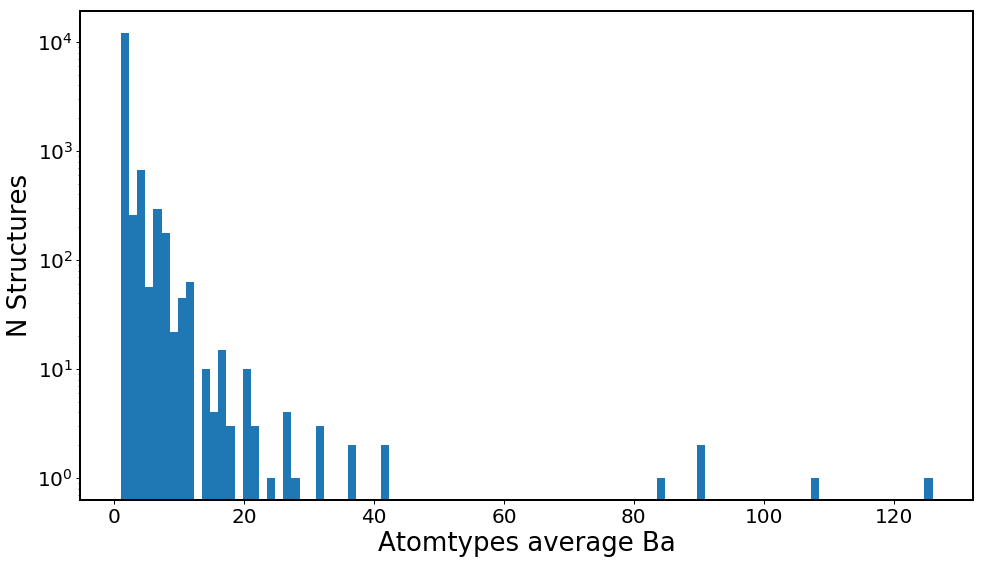

(59.413919413919416, 40.586080586080584)


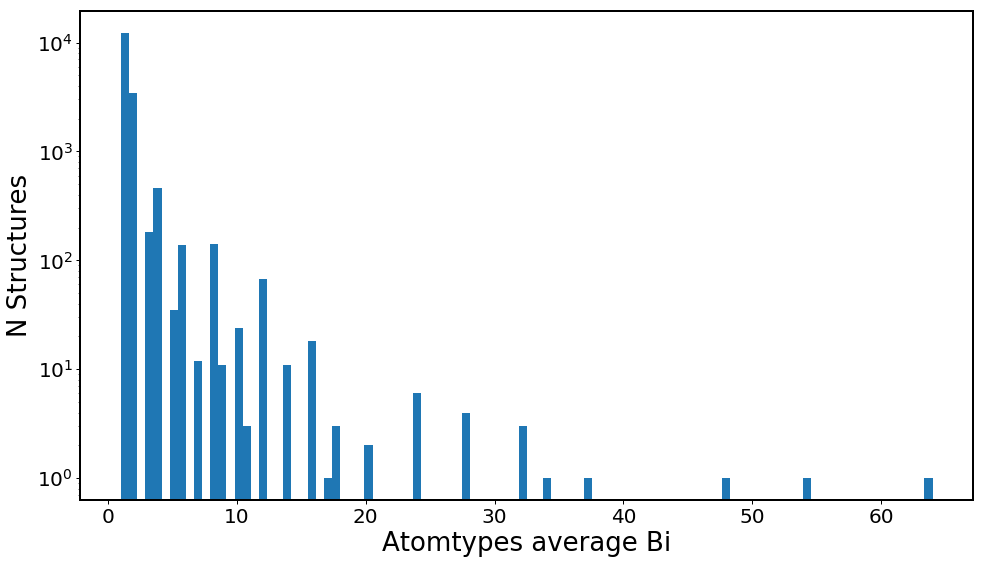

(72.69845067894958, 27.301549321050423)


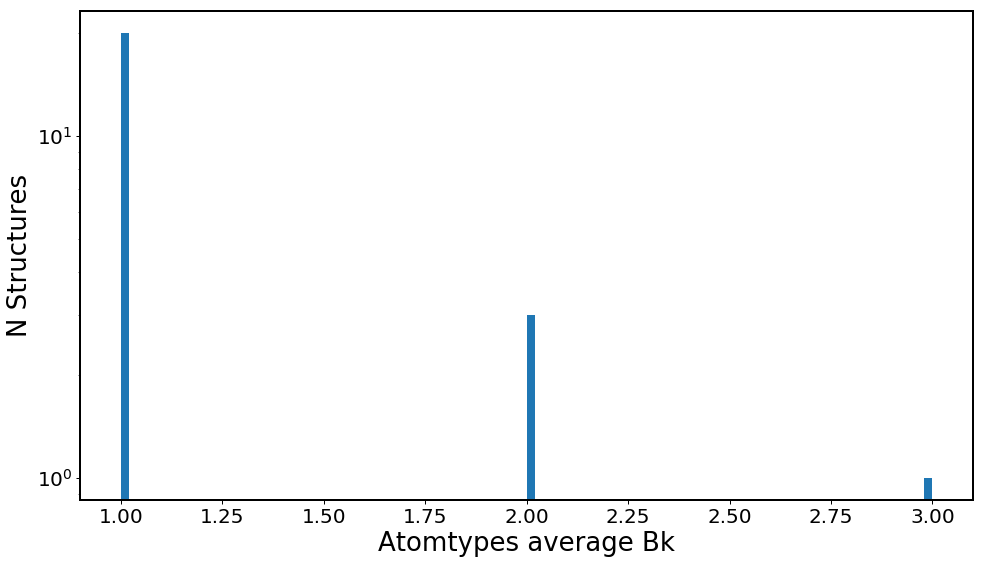

(83.33333333333334, 16.666666666666664)


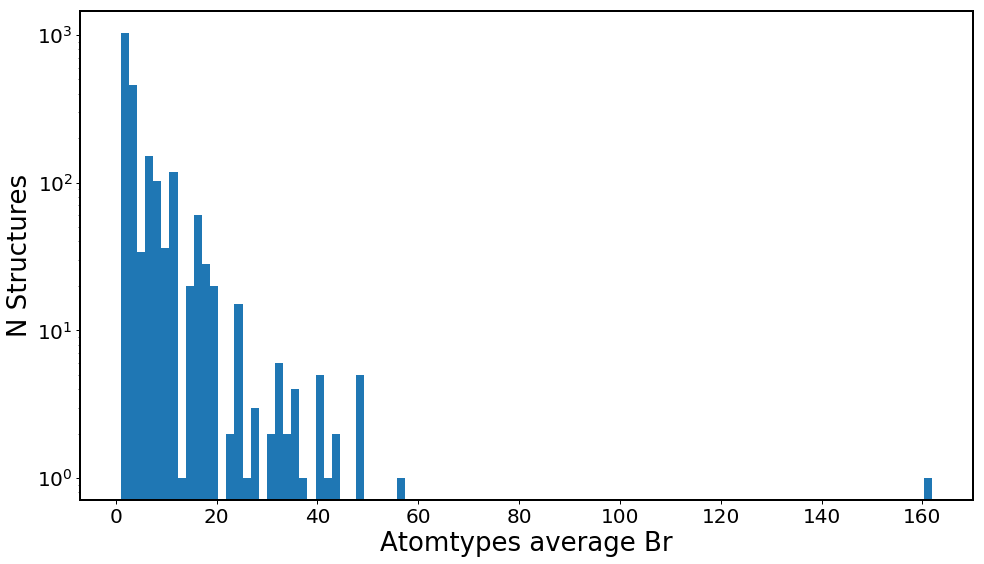

(28.110161443494775, 71.88983855650523)


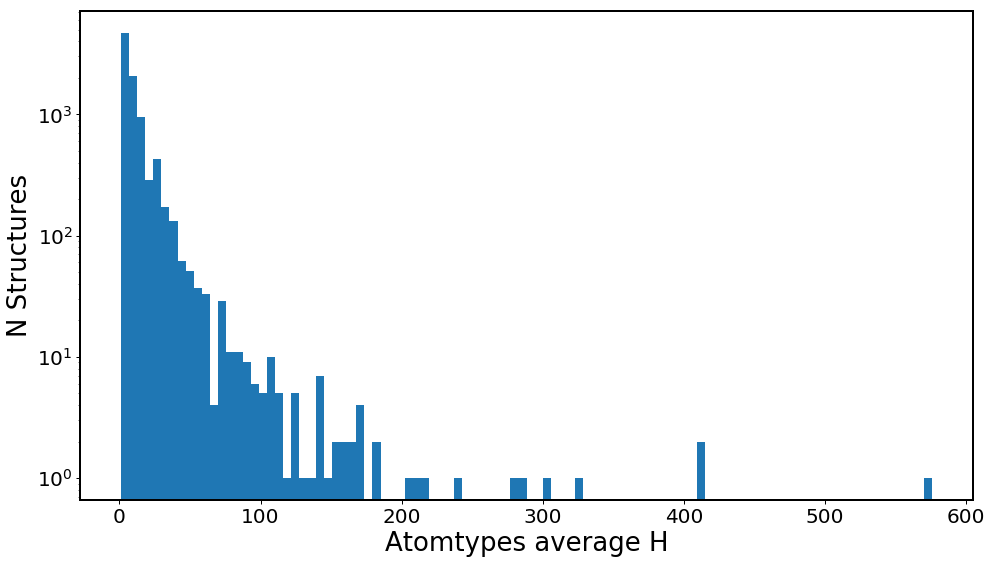

(14.524021352313168, 85.47597864768683)


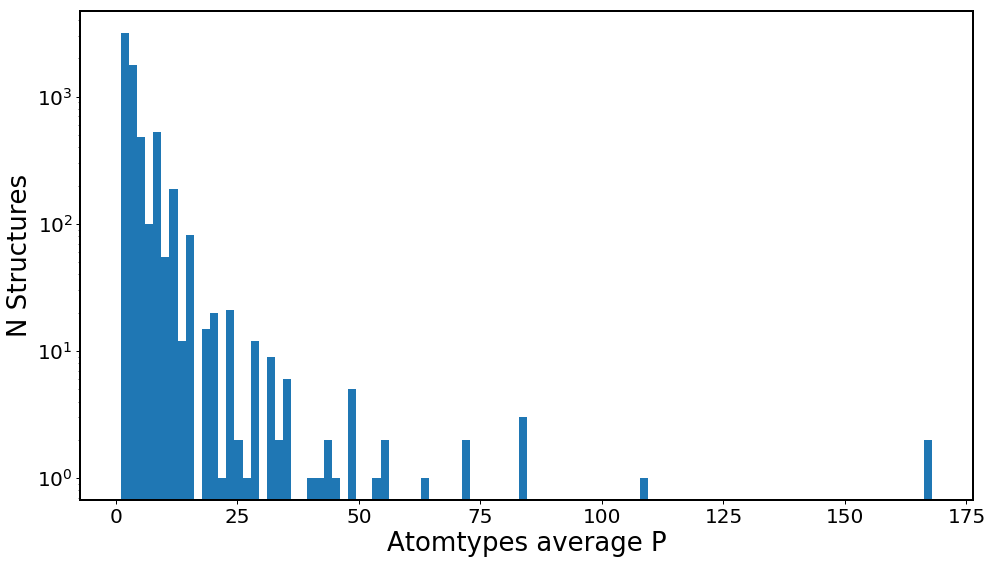

(25.394126738794437, 74.60587326120556)


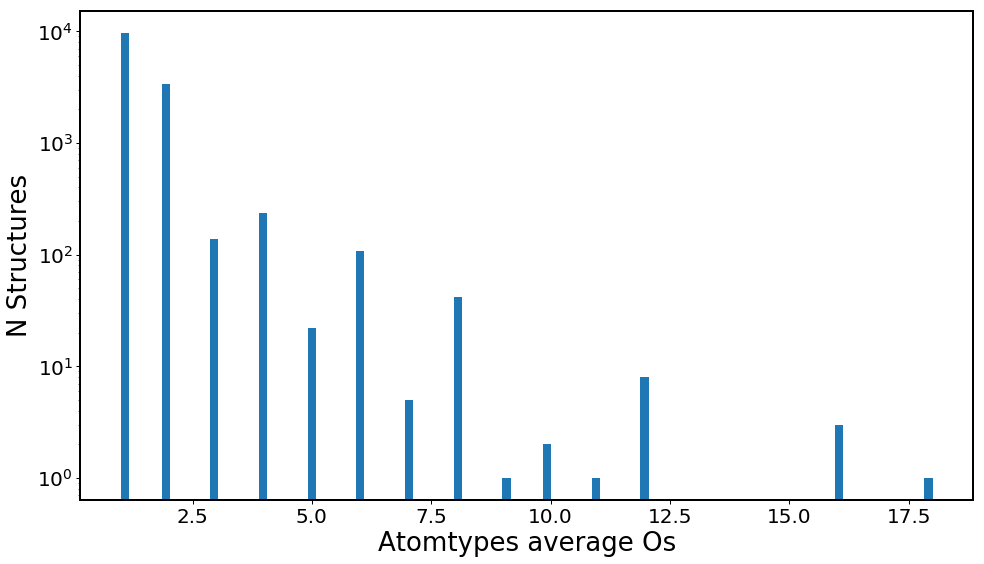

(70.77093323496865, 29.22906676503135)


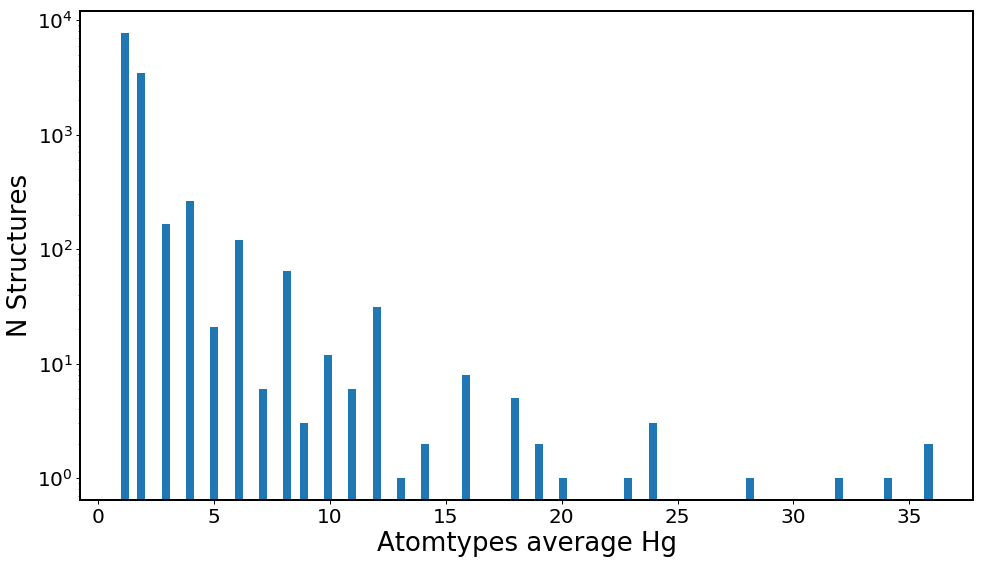

(64.79871719132416, 35.201282808675835)


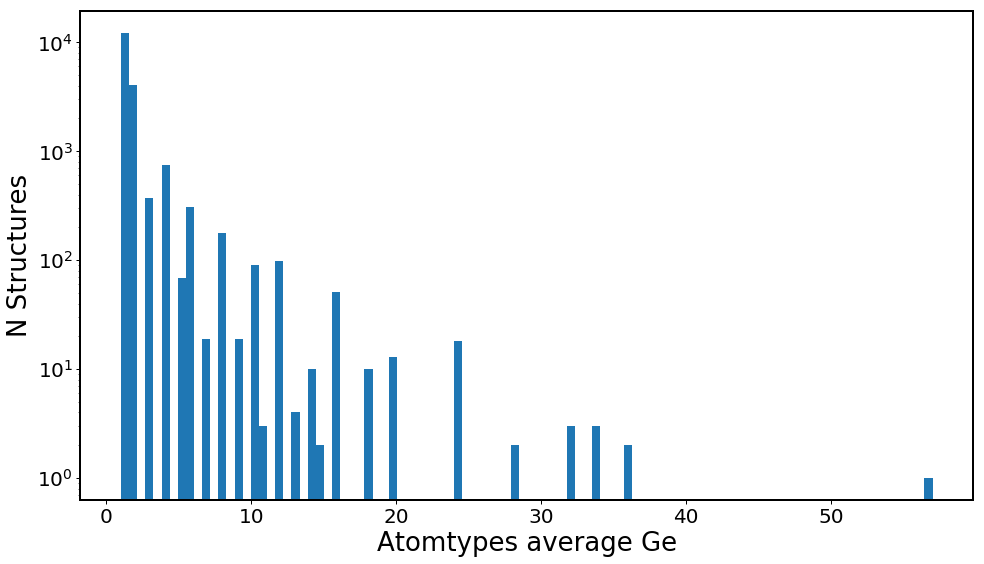

(66.47255946821953, 33.52744053178047)


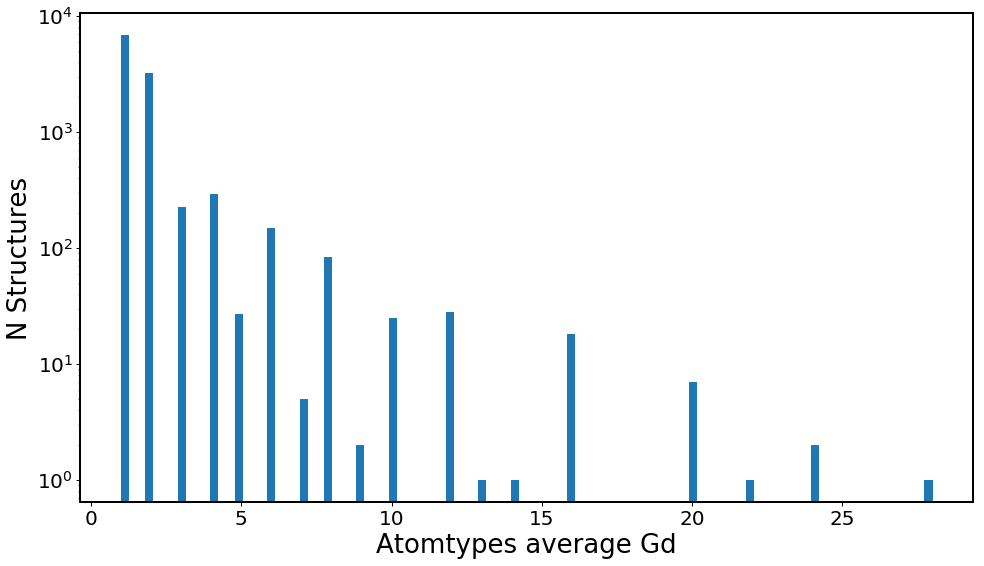

(62.55518763796909, 37.44481236203091)


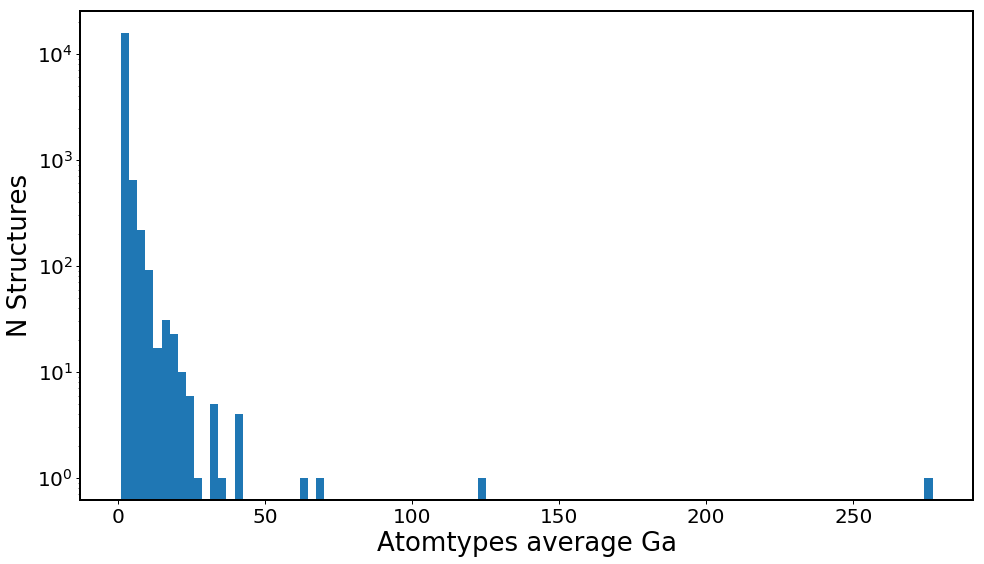

(69.90122717749176, 30.098772822508234)


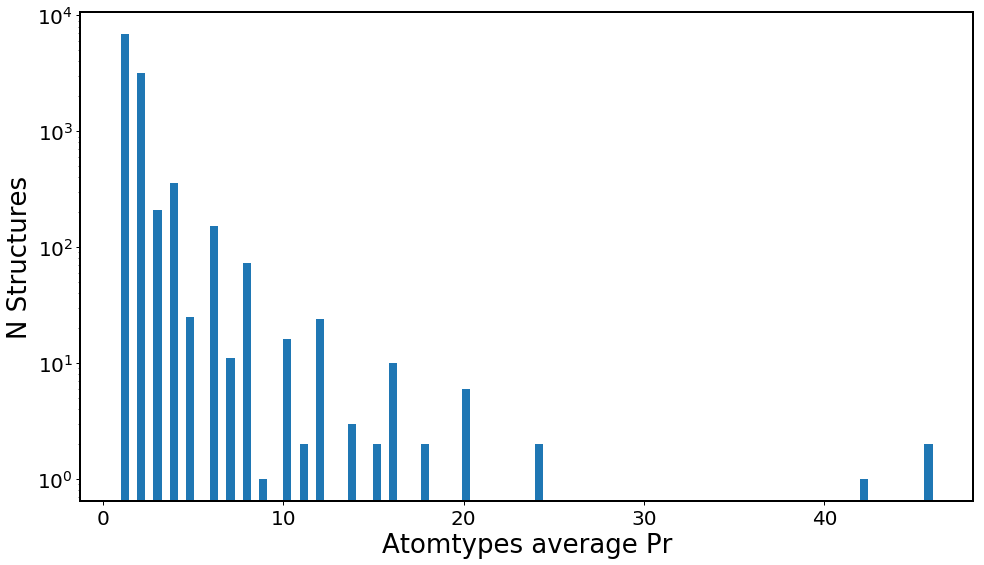

(62.67373811265545, 37.32626188734455)


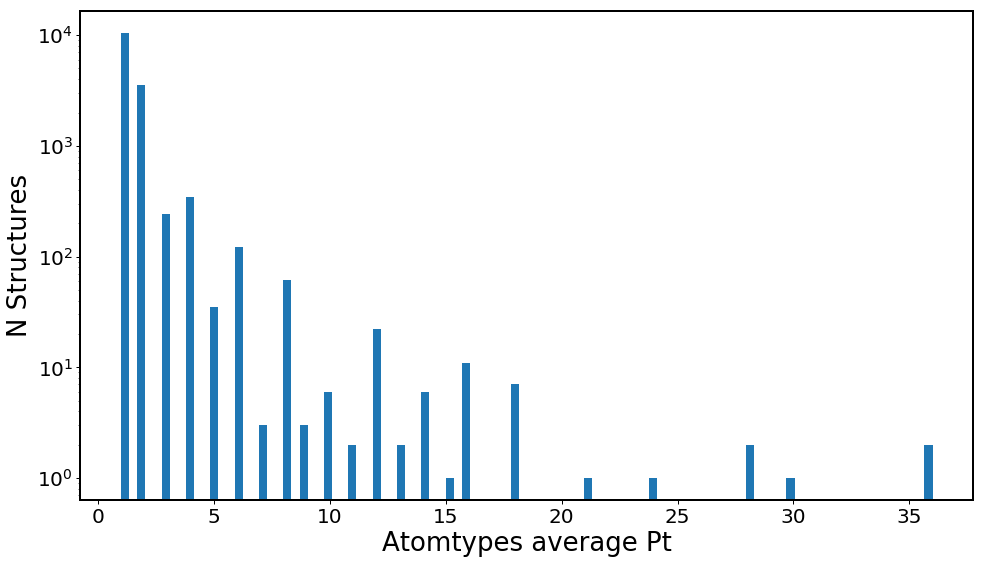

(70.06343636118234, 29.93656363881766)


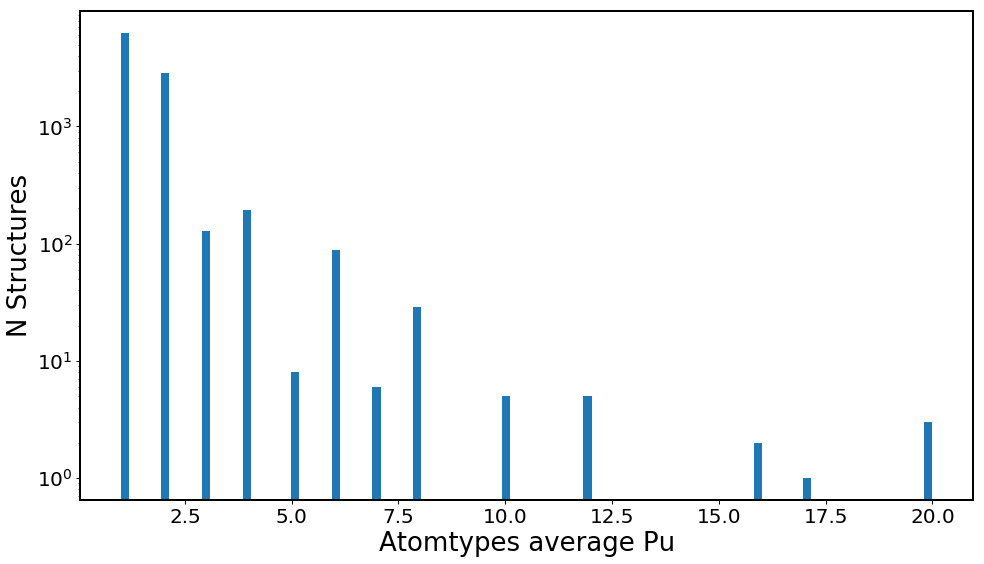

(65.08085550339071, 34.91914449660929)


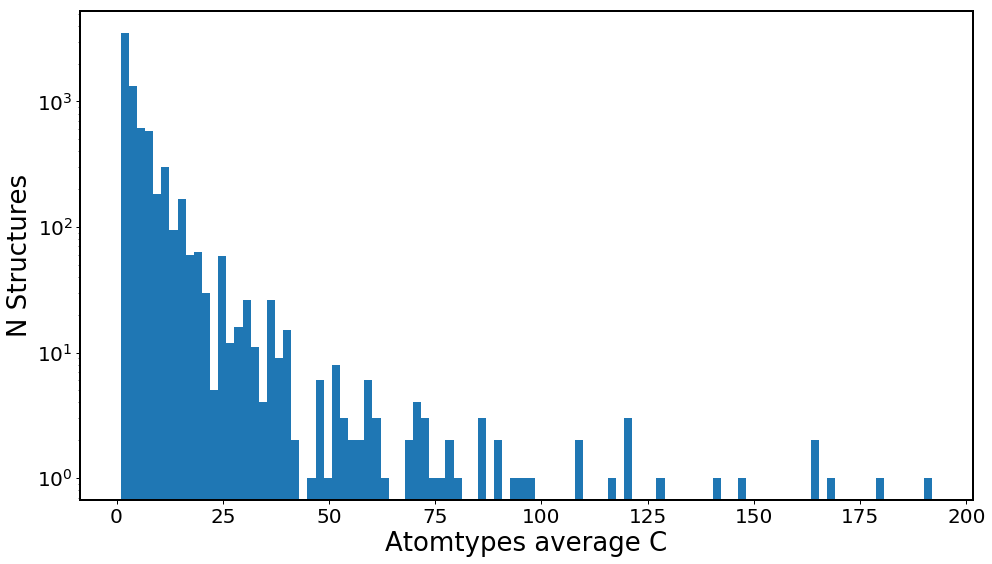

(32.89161668294044, 67.10838331705956)


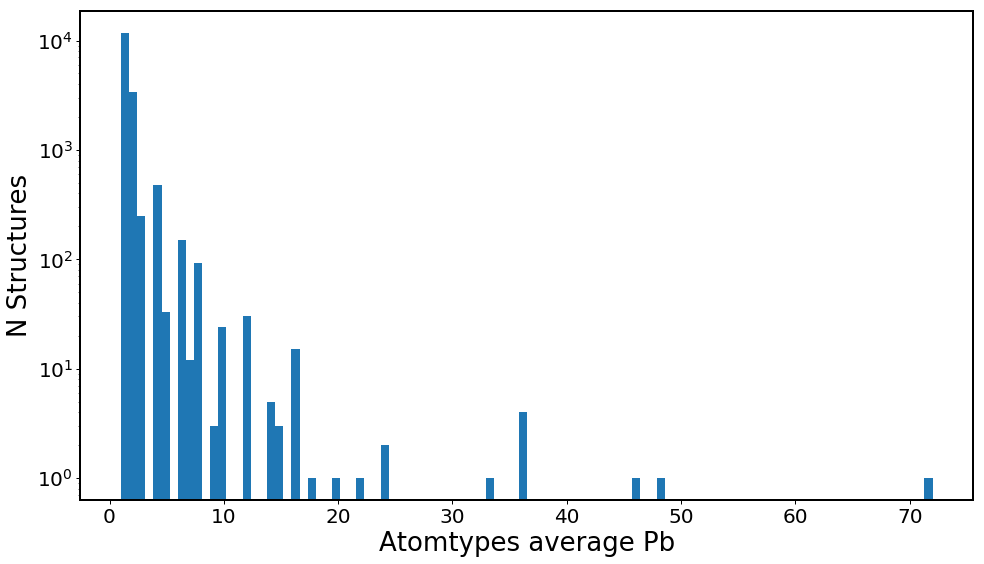

(72.21981020901818, 27.780189790981822)


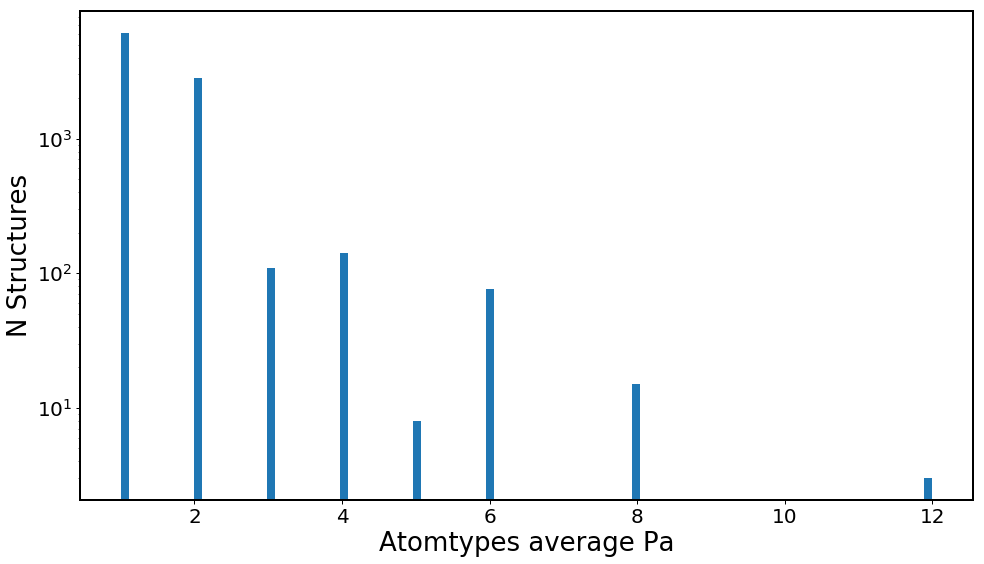

(65.53513513513514, 34.464864864864865)


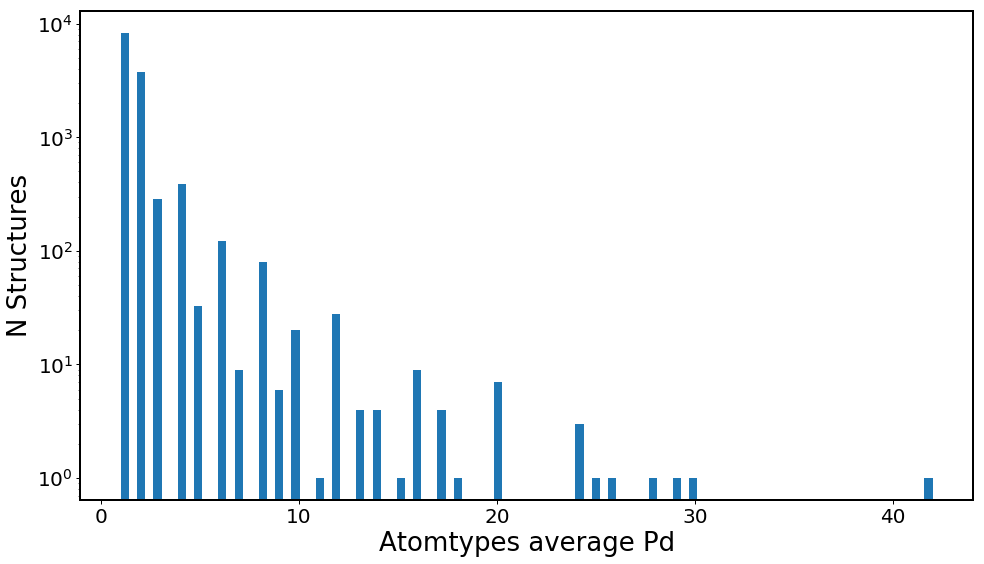

(63.512782884065814, 36.487217115934186)


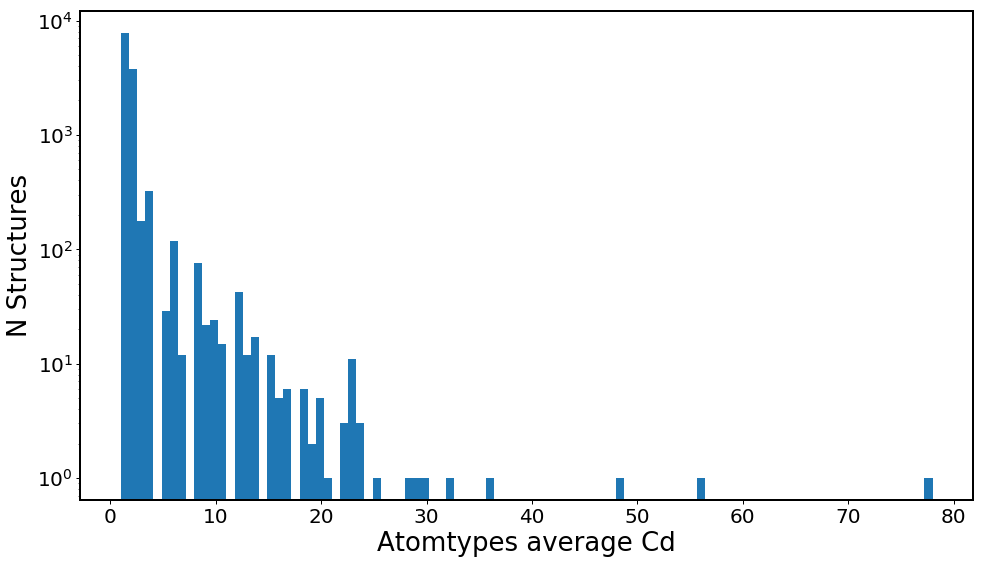

(62.141306968893176, 37.858693031106824)


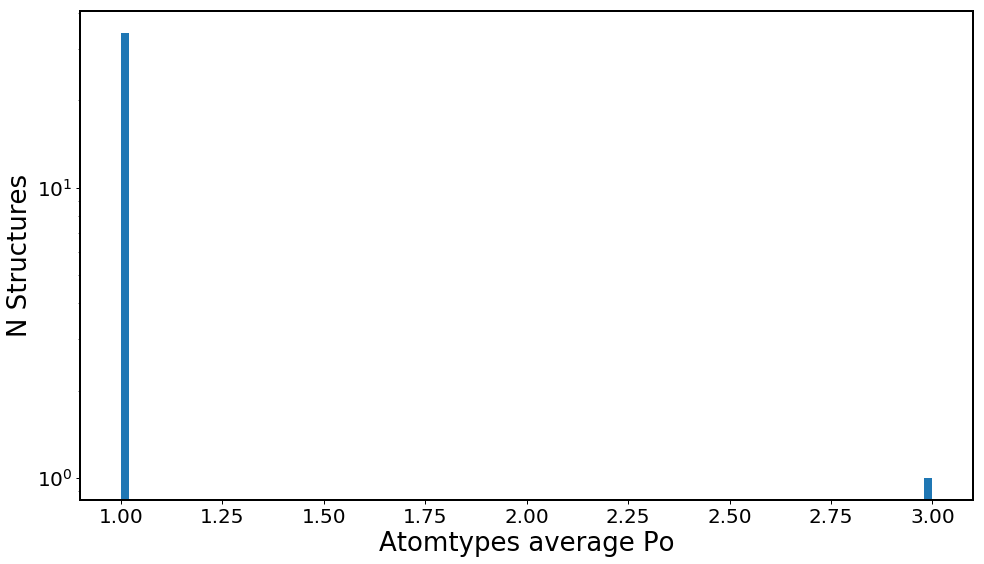

(97.14285714285714, 2.857142857142858)


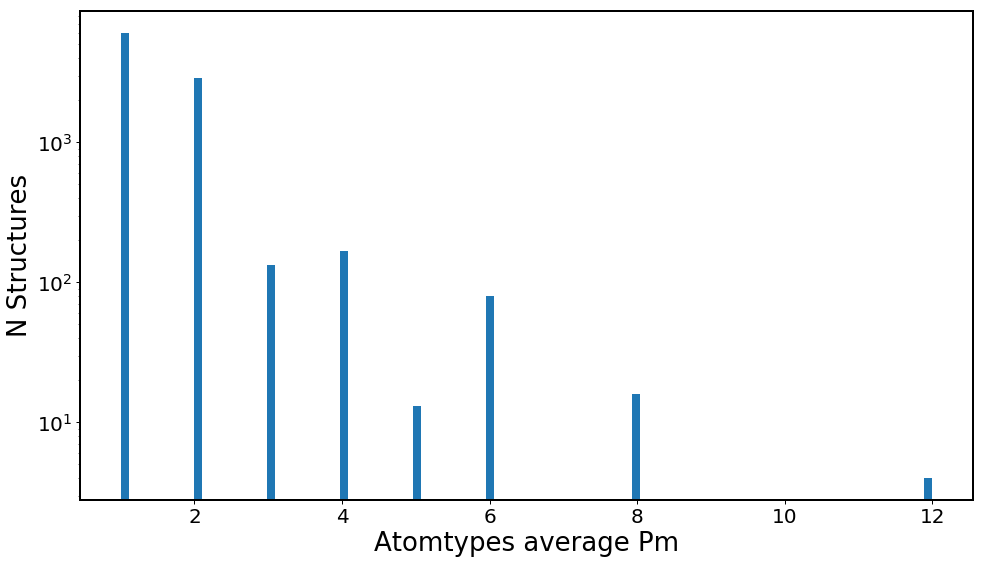

(64.7527738877518, 35.2472261122482)


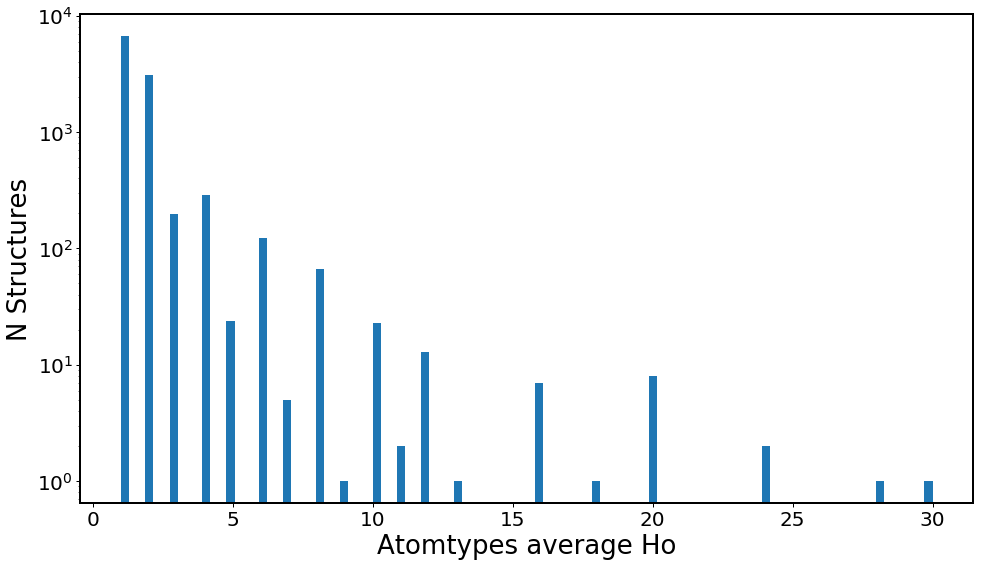

(63.31529478780974, 36.68470521219026)


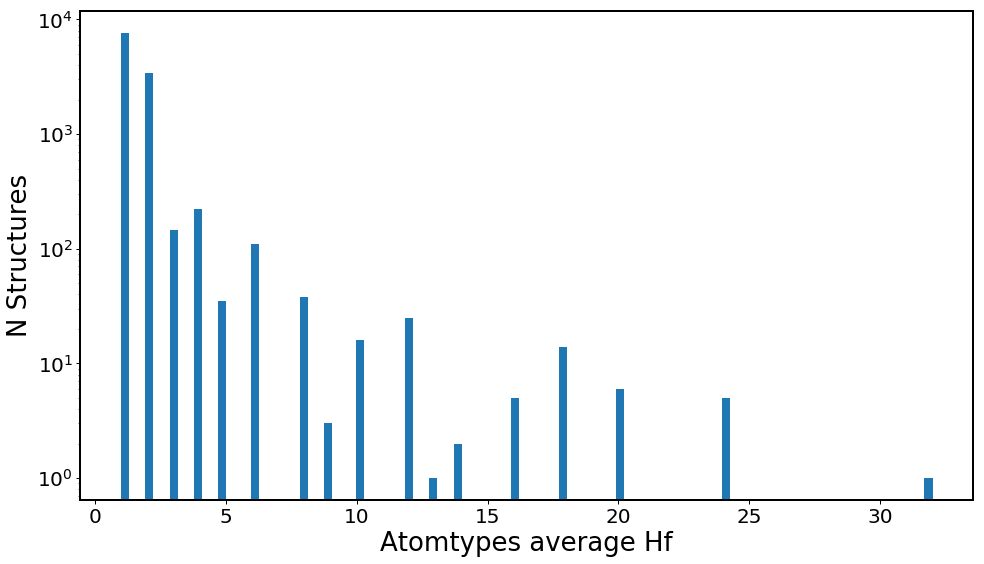

(65.11747998967209, 34.88252001032791)


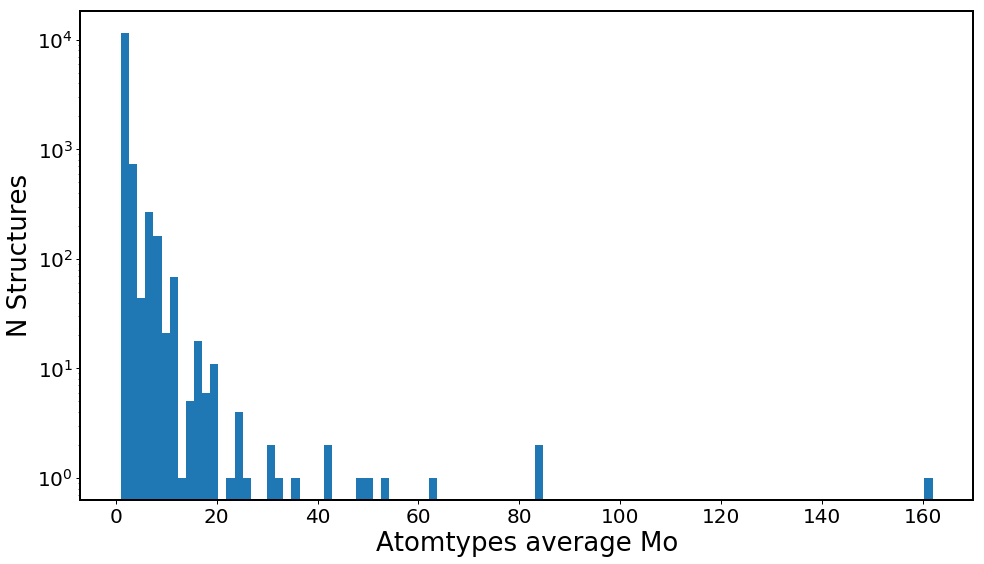

(60.321548427378445, 39.678451572621555)


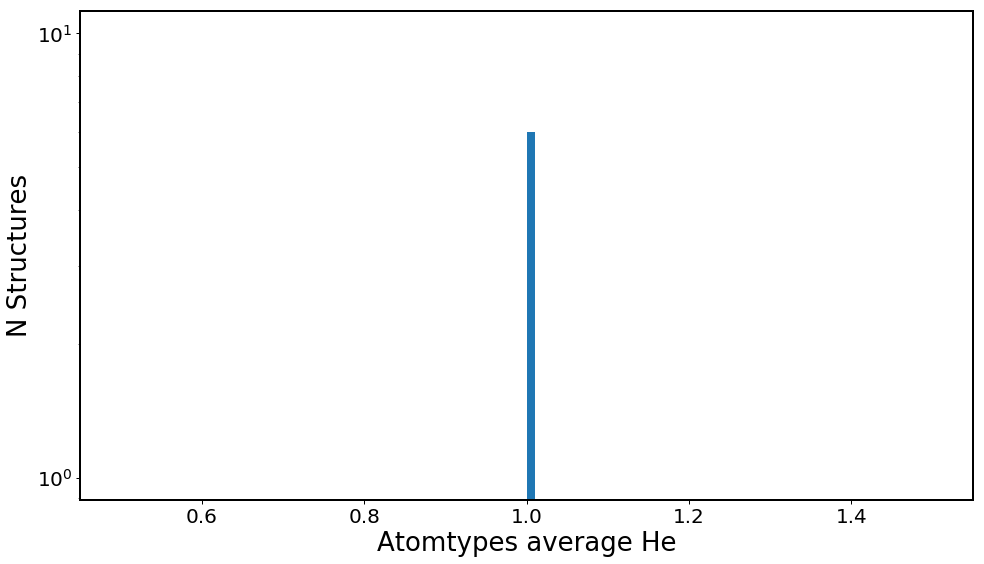

(100.0, 0.0)


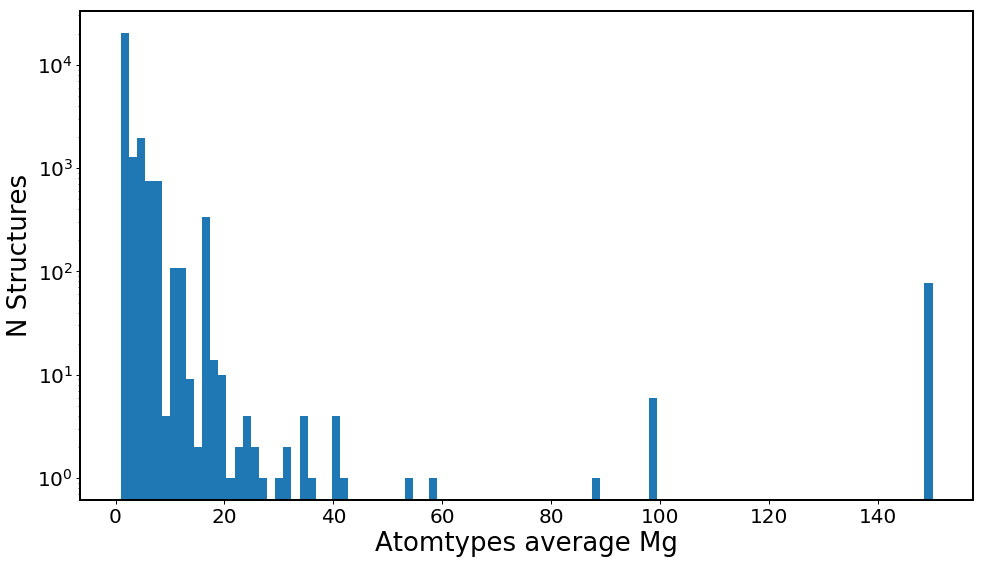

(59.0368980612883, 40.9631019387117)


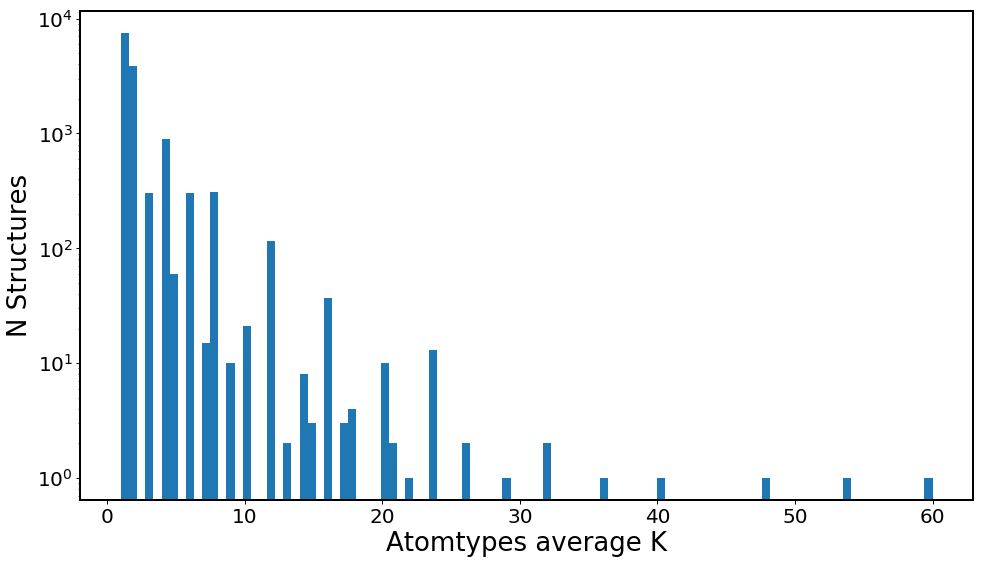

(55.389422004016964, 44.610577995983036)


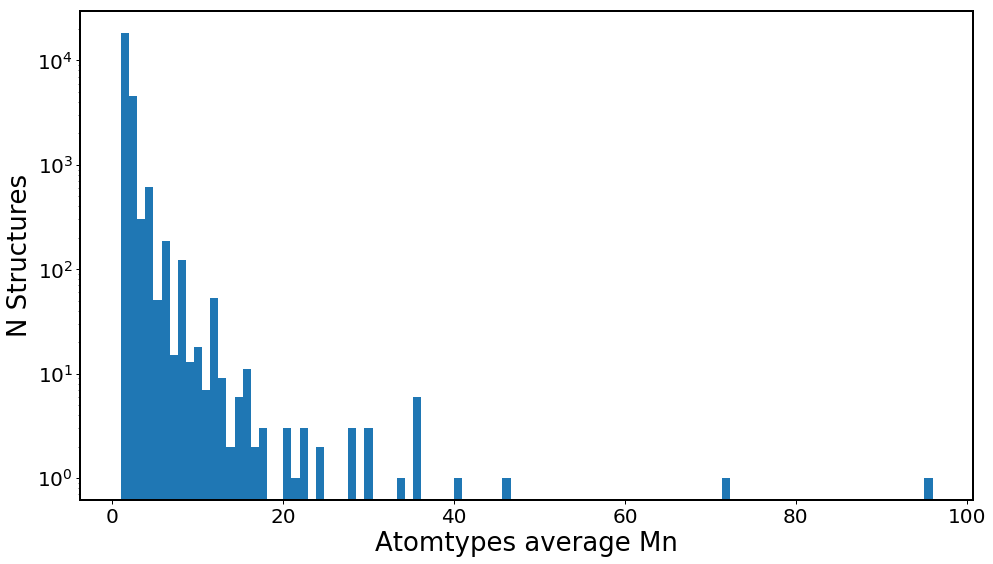

(75.19665479837708, 24.803345201622918)


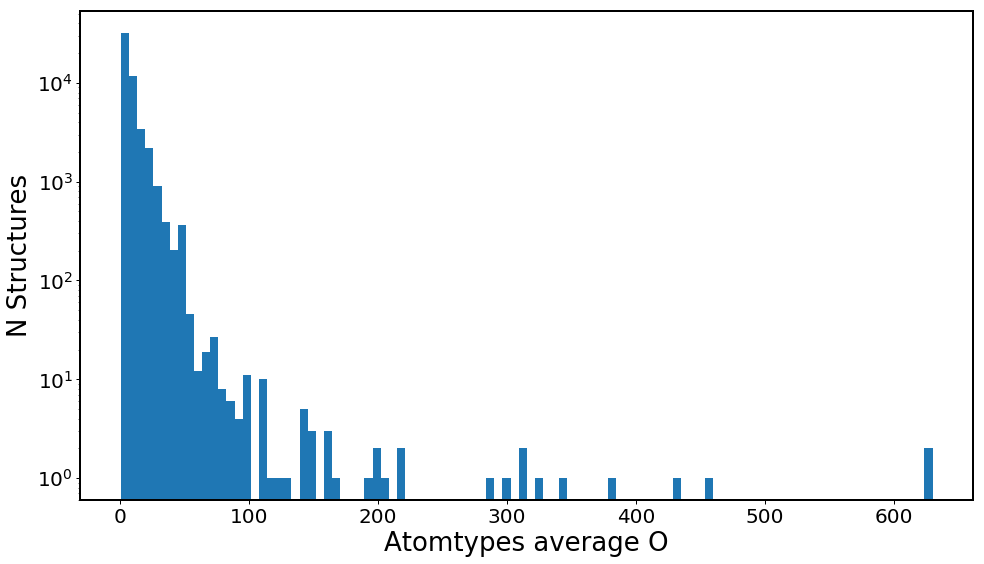

(14.10301468291159, 85.89698531708841)


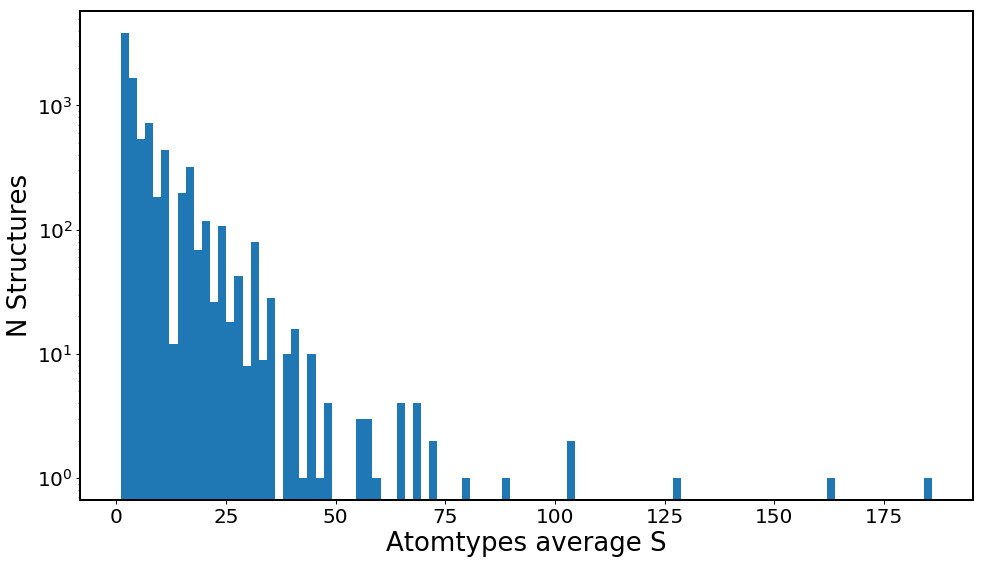

(28.363334912363808, 71.6366650876362)


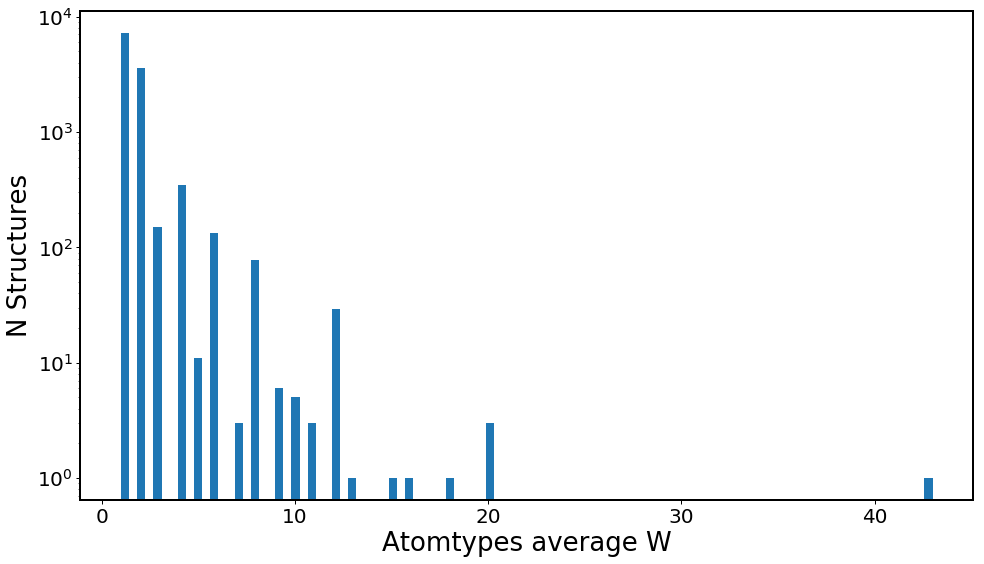

(62.13381868608078, 37.86618131391922)


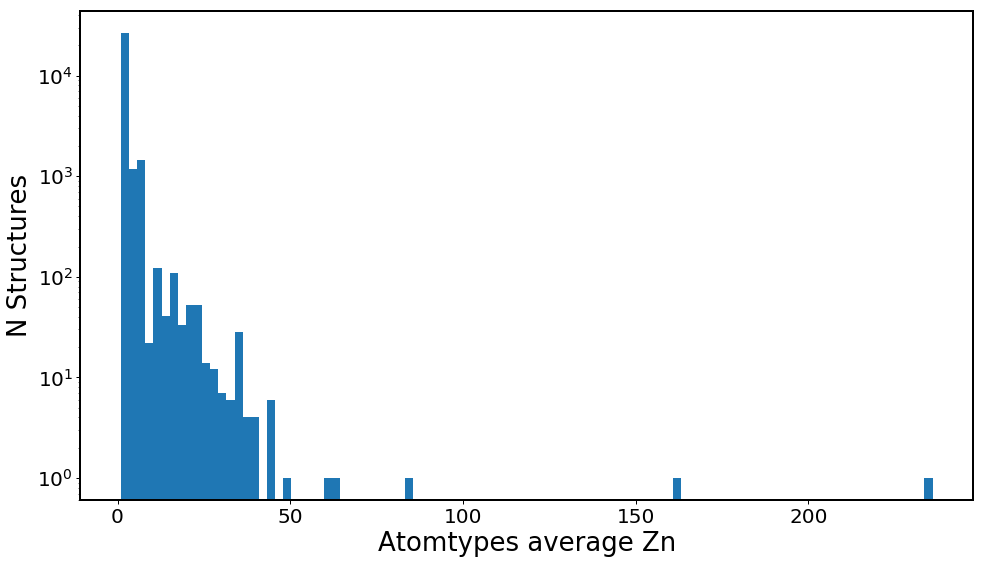

(71.48193425699539, 28.518065743004616)


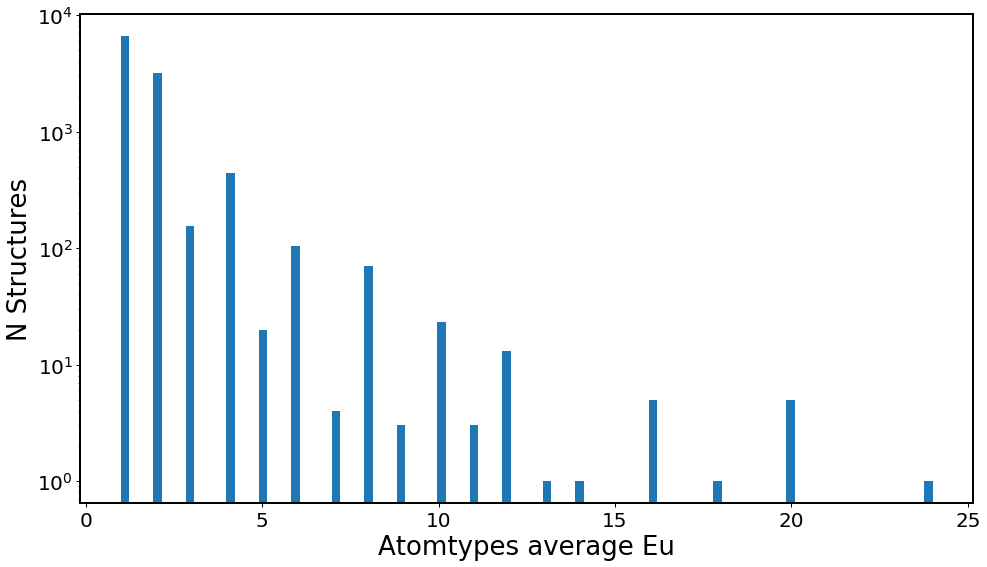

(61.97554092191909, 38.02445907808091)


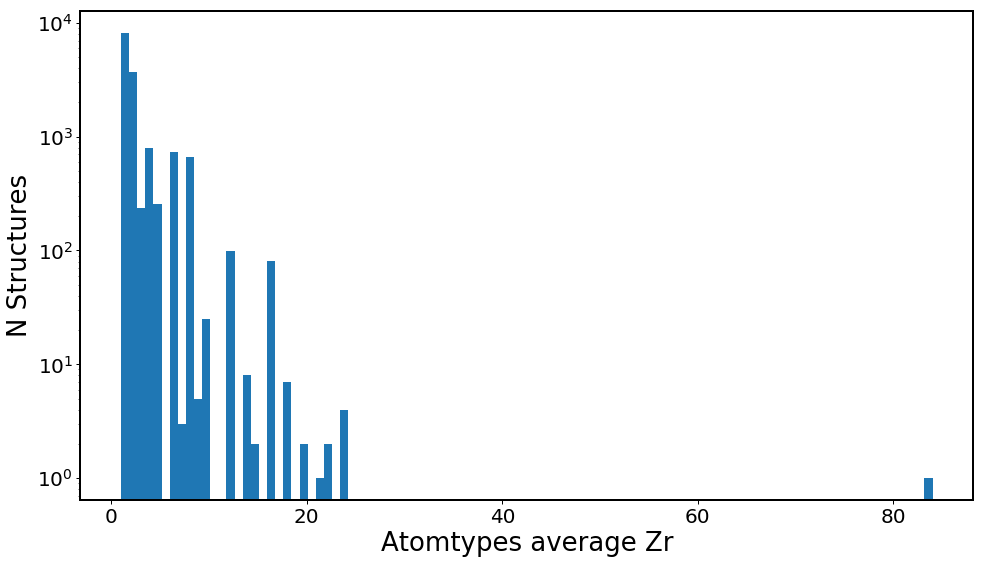

(55.075417855686915, 44.924582144313085)


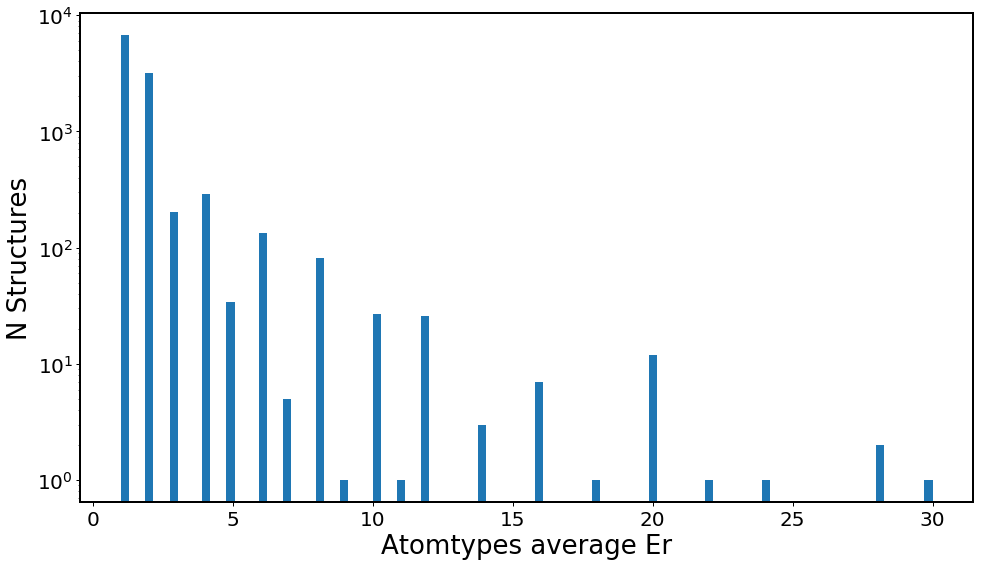

(62.55818283373673, 37.44181716626327)


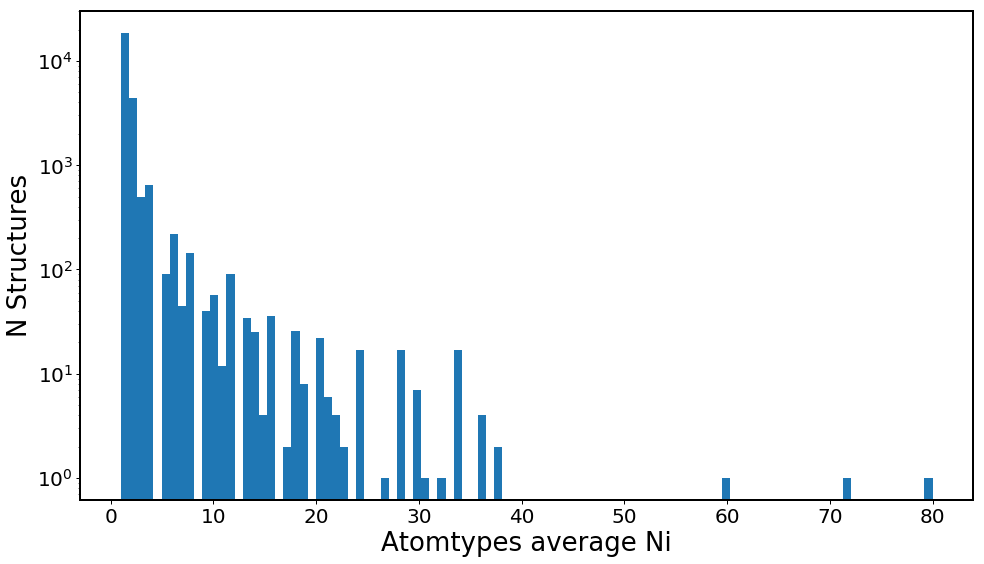

(74.01672967103676, 25.983270328963247)


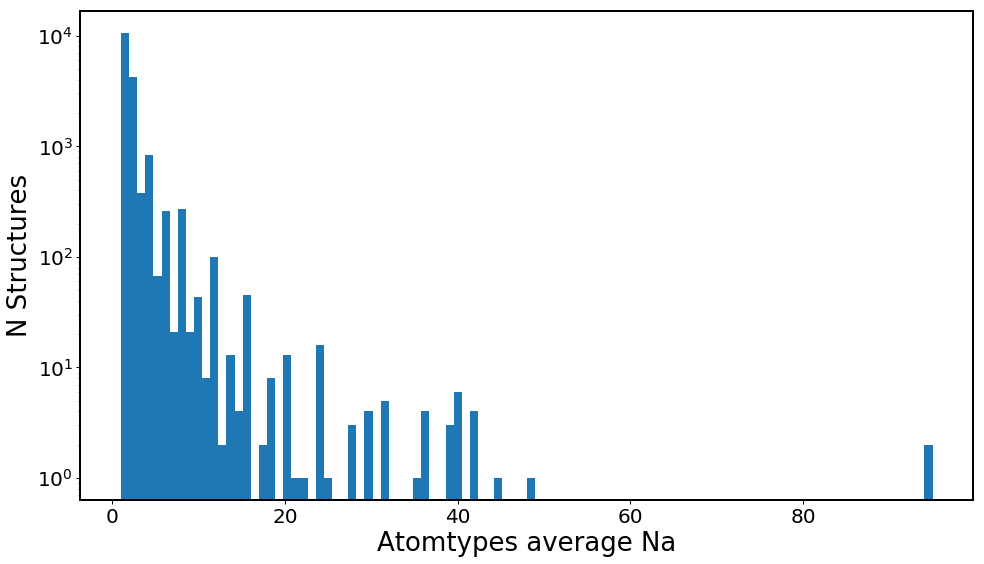

(62.385593723998575, 37.614406276001425)


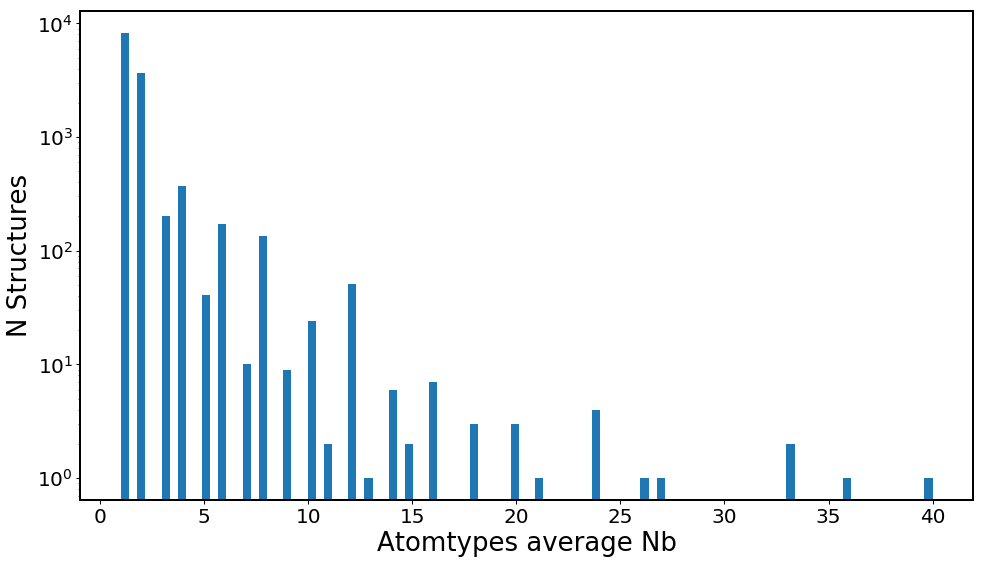

(63.30417279554076, 36.69582720445924)


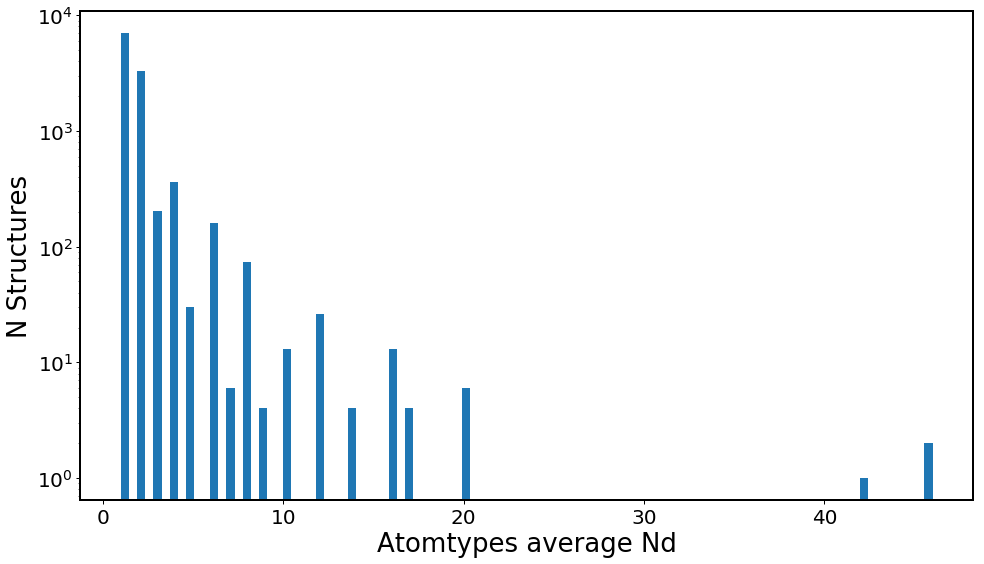

(62.27913617704801, 37.72086382295199)


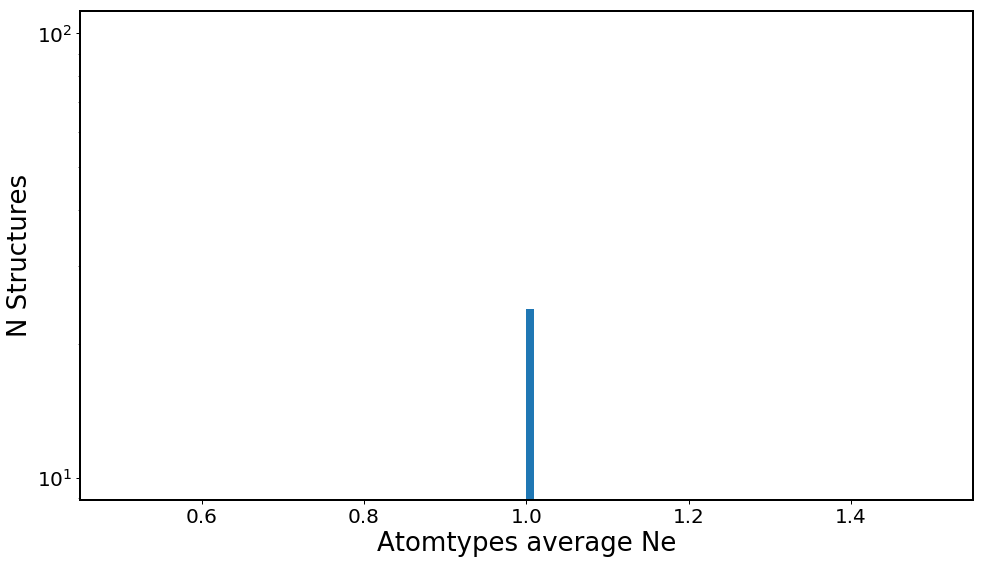

(100.0, 0.0)


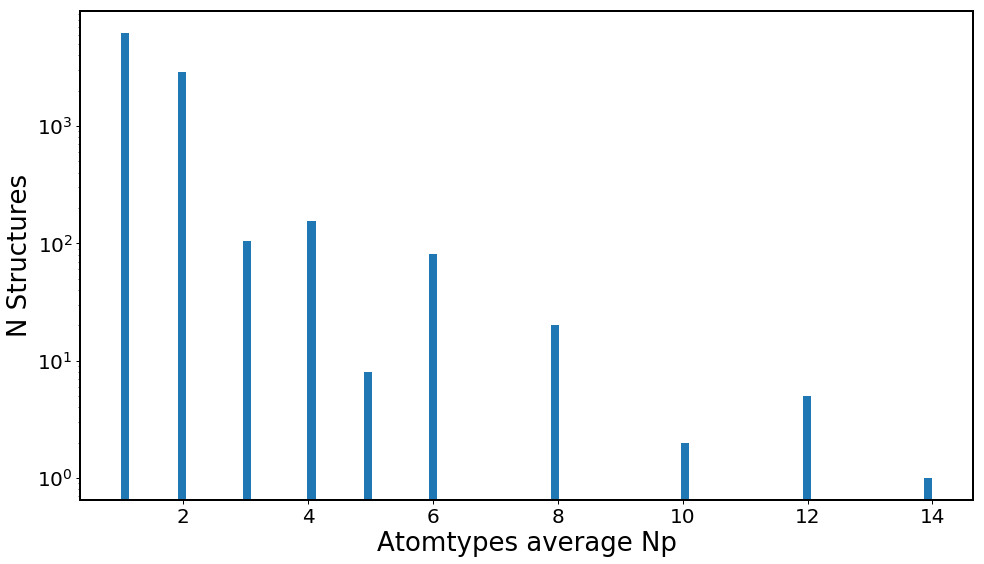

(65.21876981610653, 34.78123018389346)


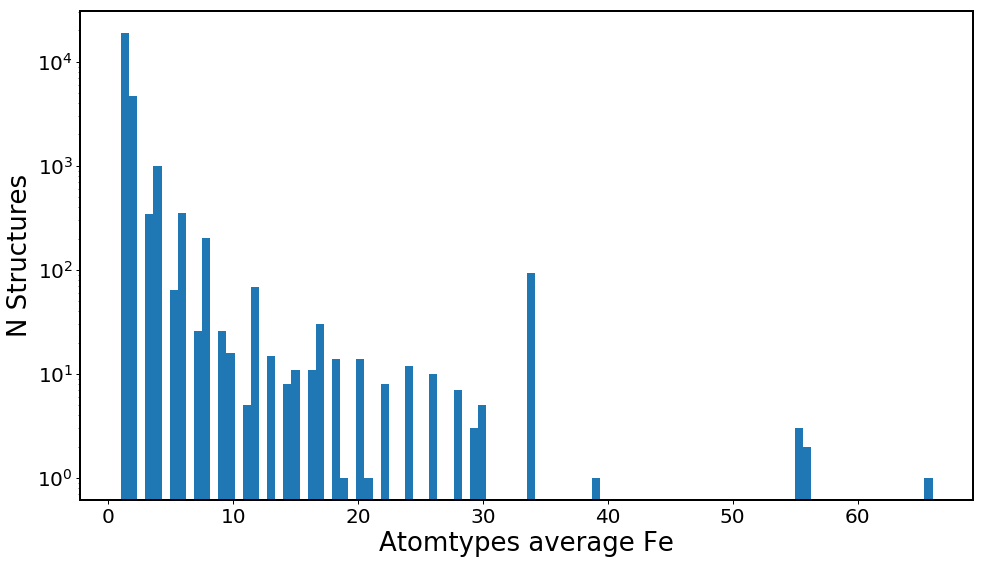

(72.79993791711935, 27.20006208288065)


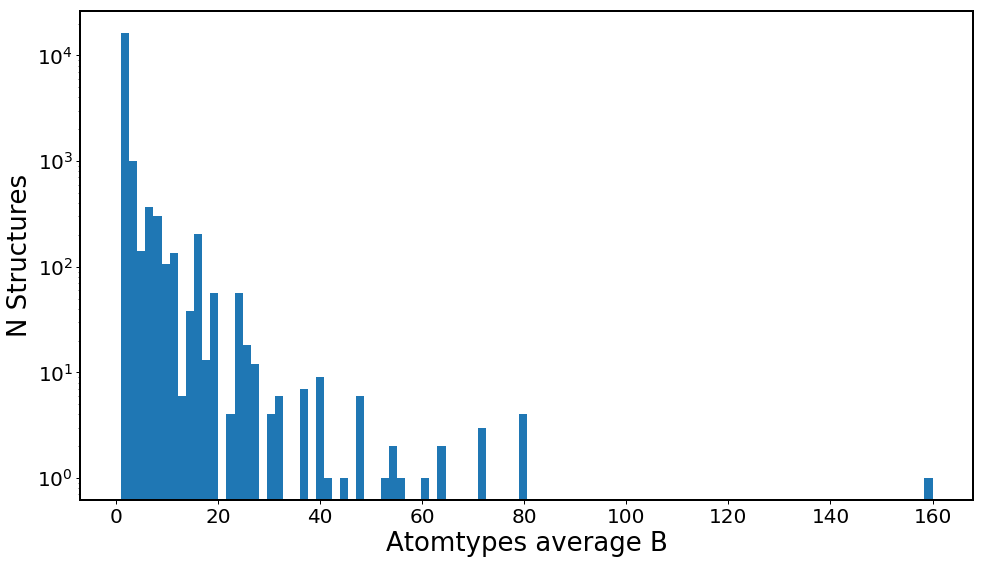

(66.22814054227499, 33.771859457725014)


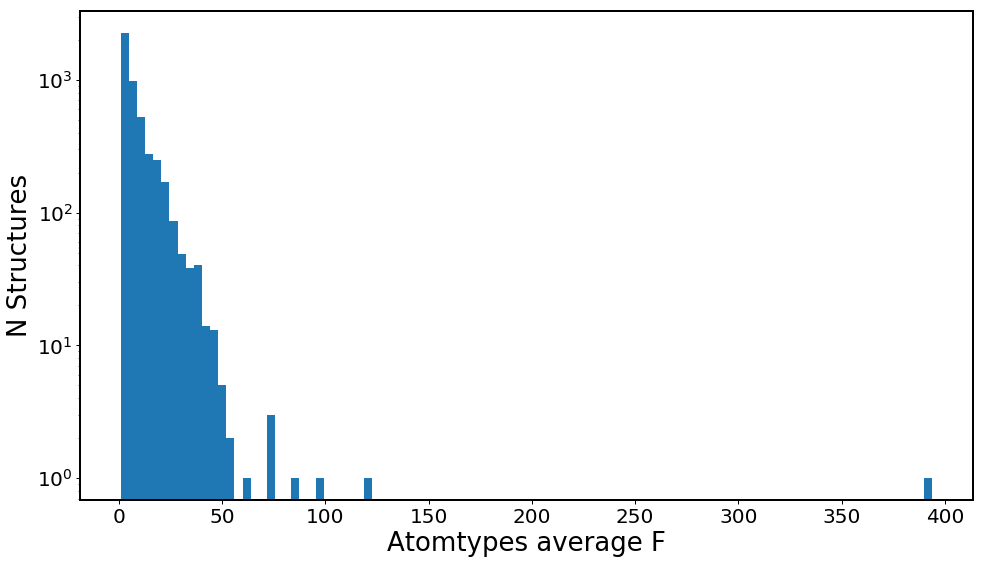

(20.566318926974663, 79.43368107302533)


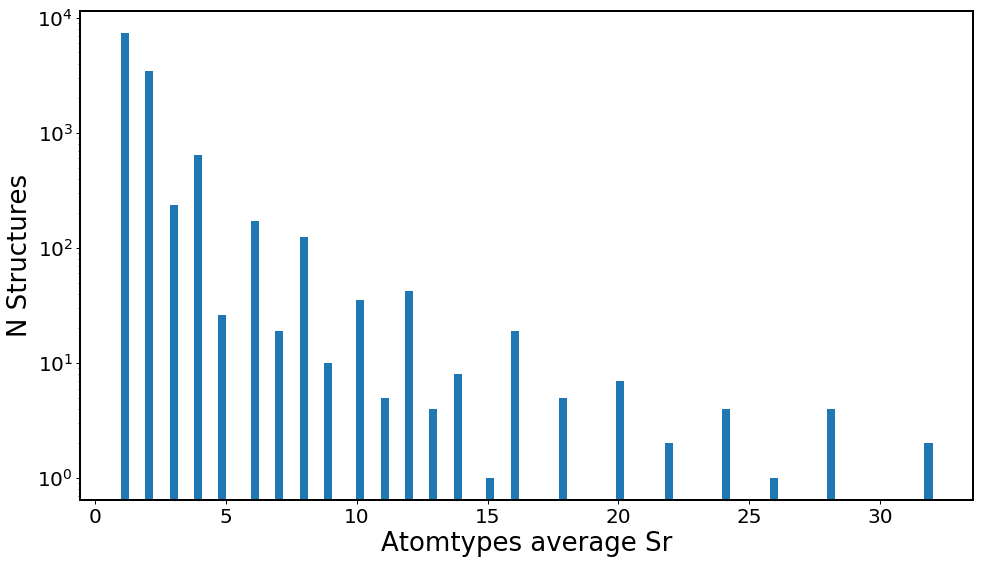

(60.23819301848049, 39.76180698151951)


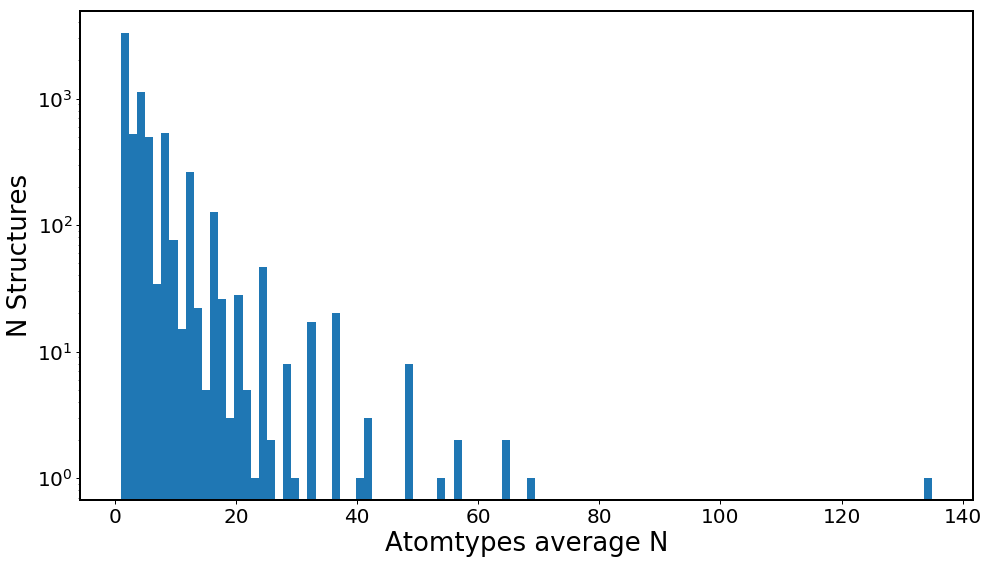

(31.90276110444178, 68.09723889555822)


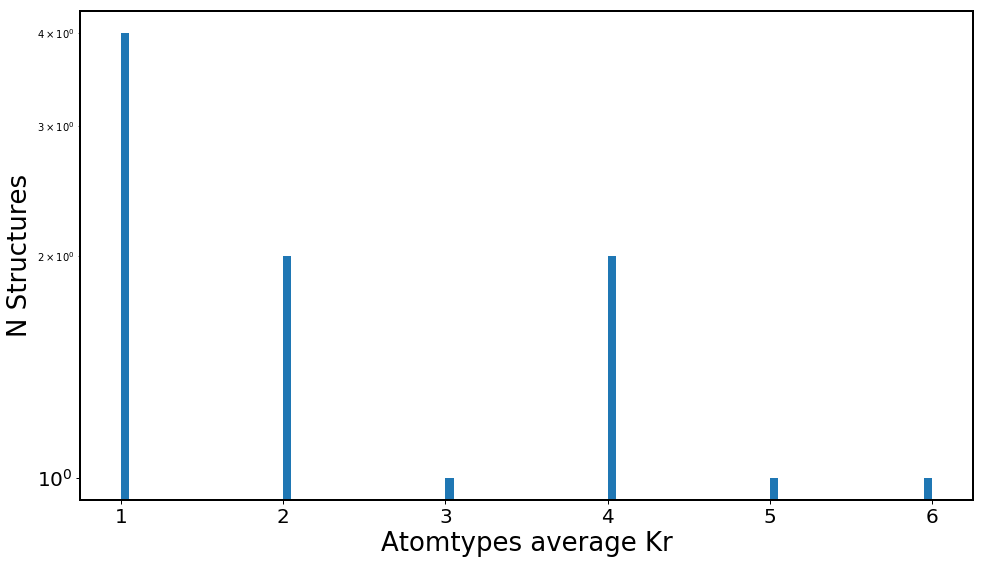

(36.36363636363637, 63.63636363636363)


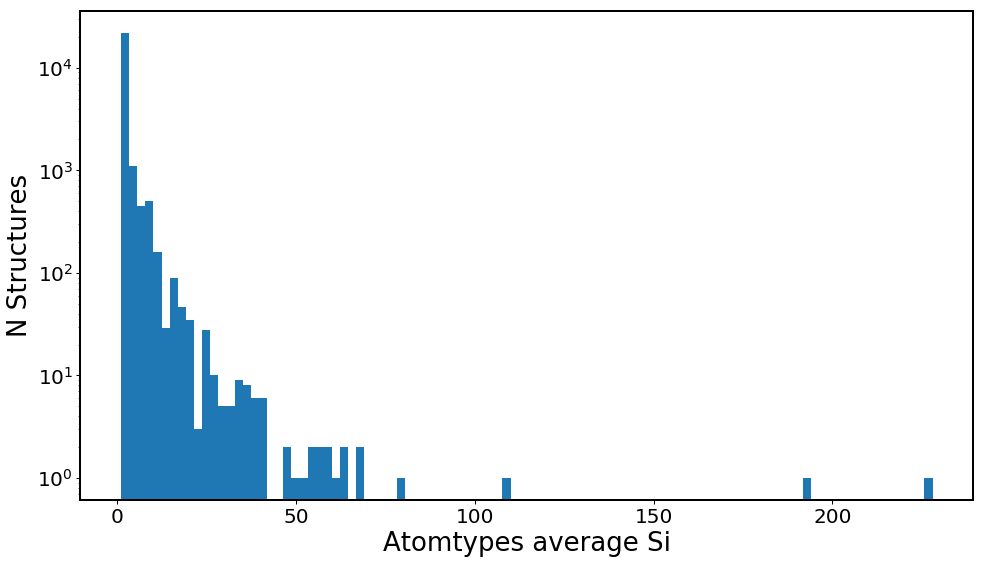

(68.14119010179591, 31.858809898204086)


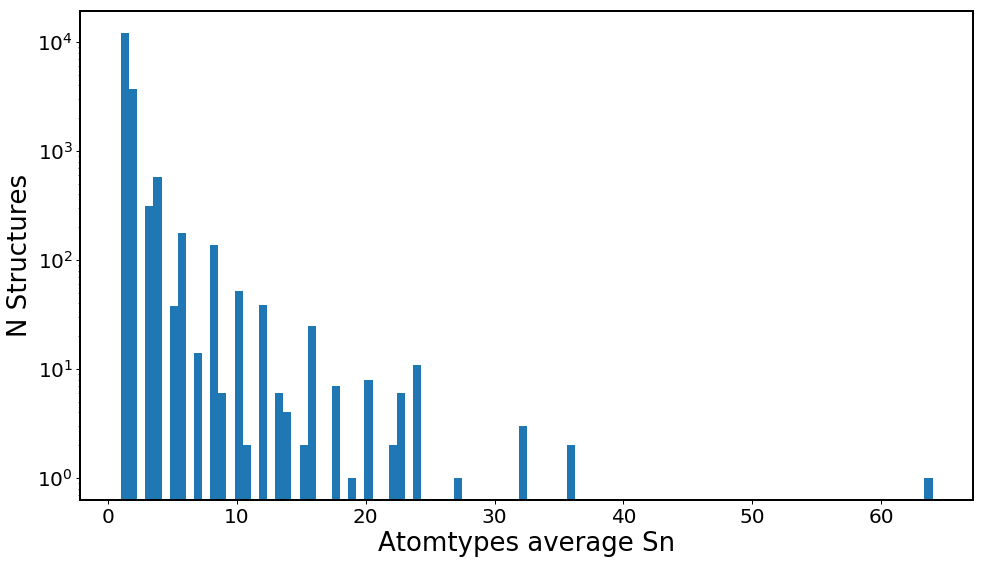

(69.89297347603537, 30.10702652396463)


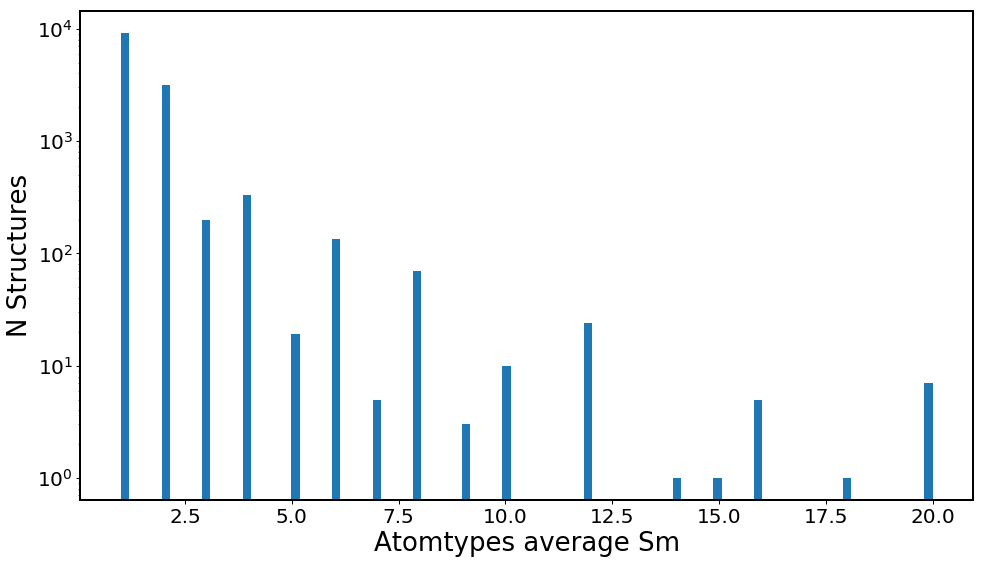

(69.71507352941177, 30.284926470588236)


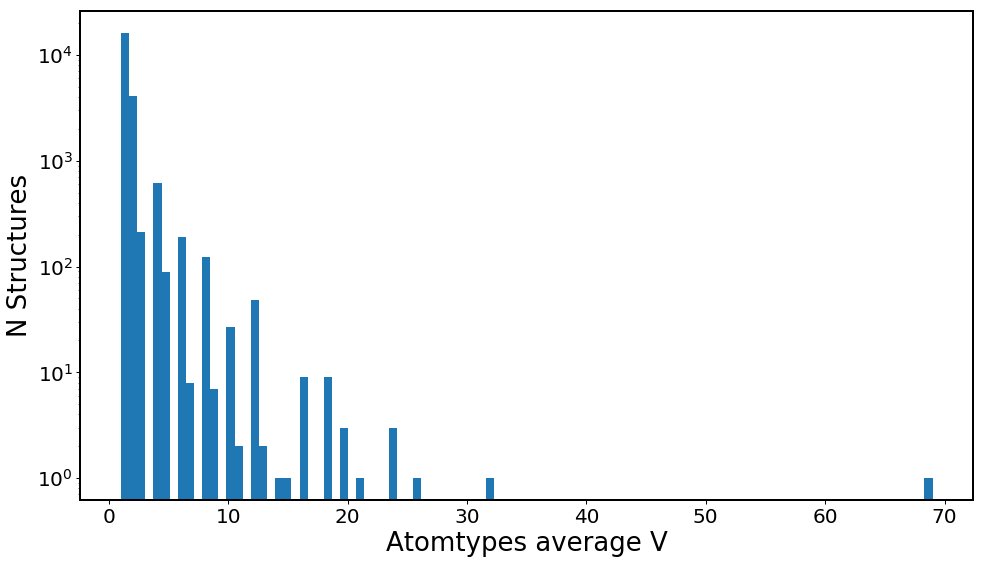

(74.53488372093024, 25.465116279069765)


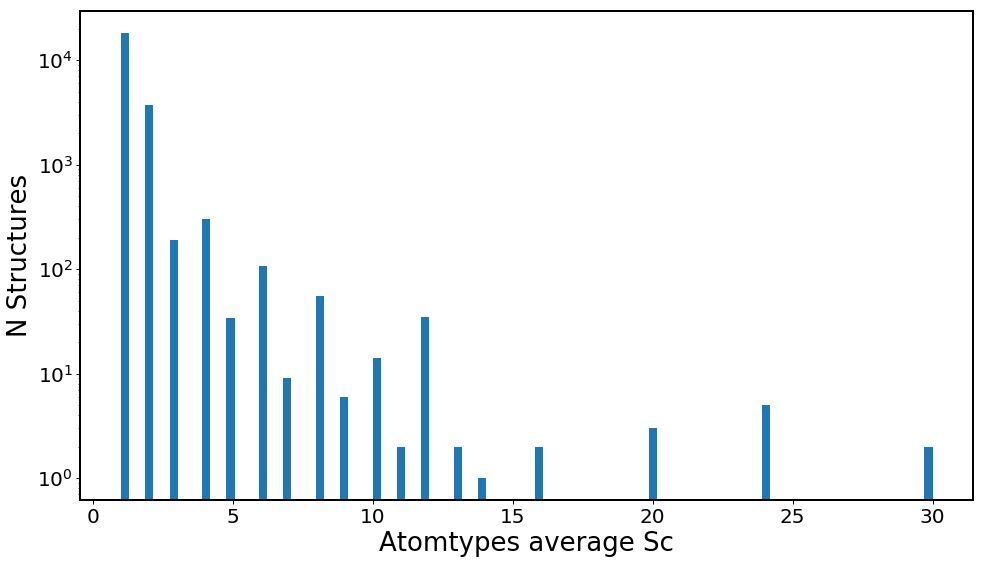

(80.10927019944032, 19.890729800559683)


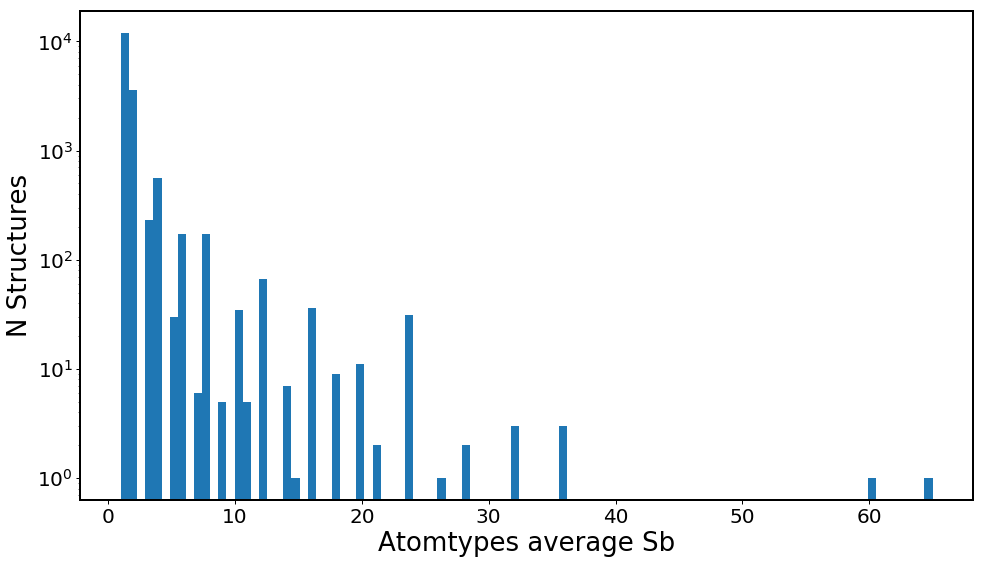

(70.57108863771565, 29.42891136228435)


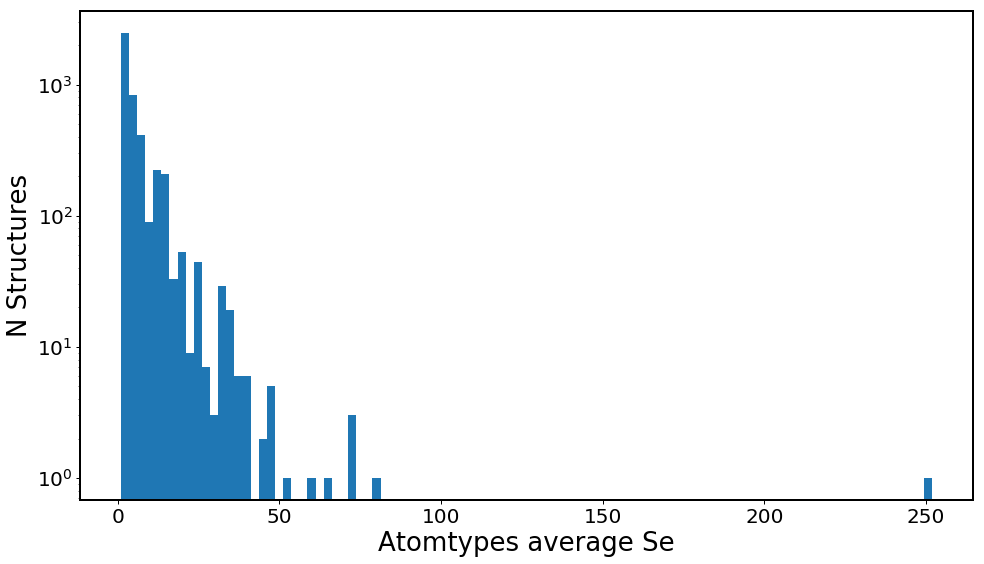

(31.387516838796586, 68.61248316120341)


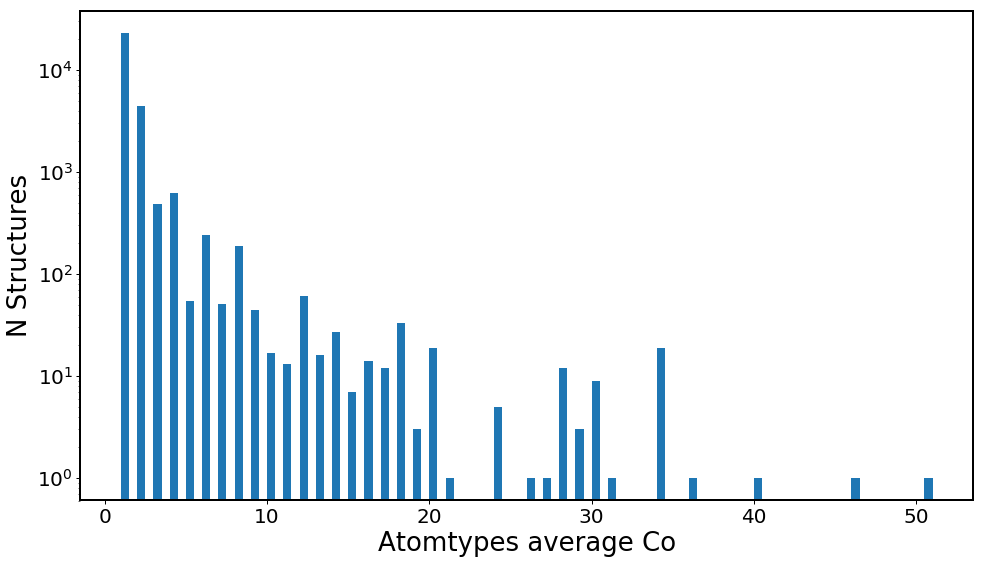

(78.23690516946252, 21.76309483053749)


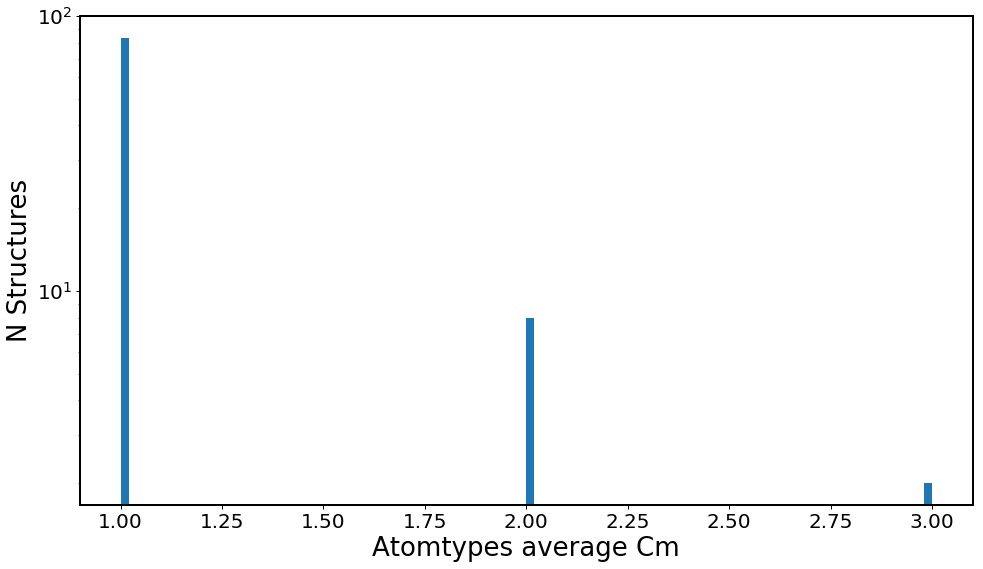

(89.24731182795699, 10.752688172043012)


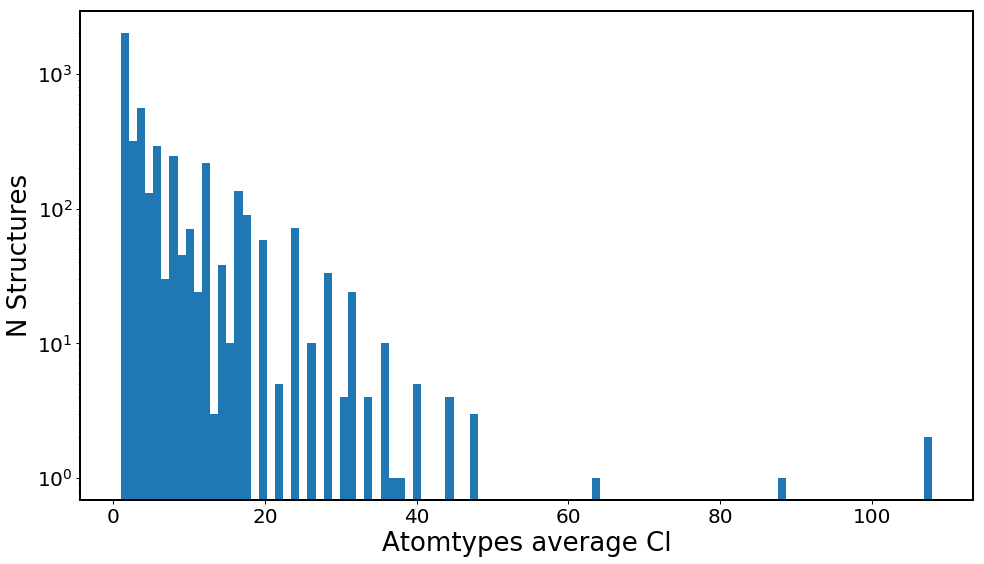

(25.646794150731157, 74.35320584926885)


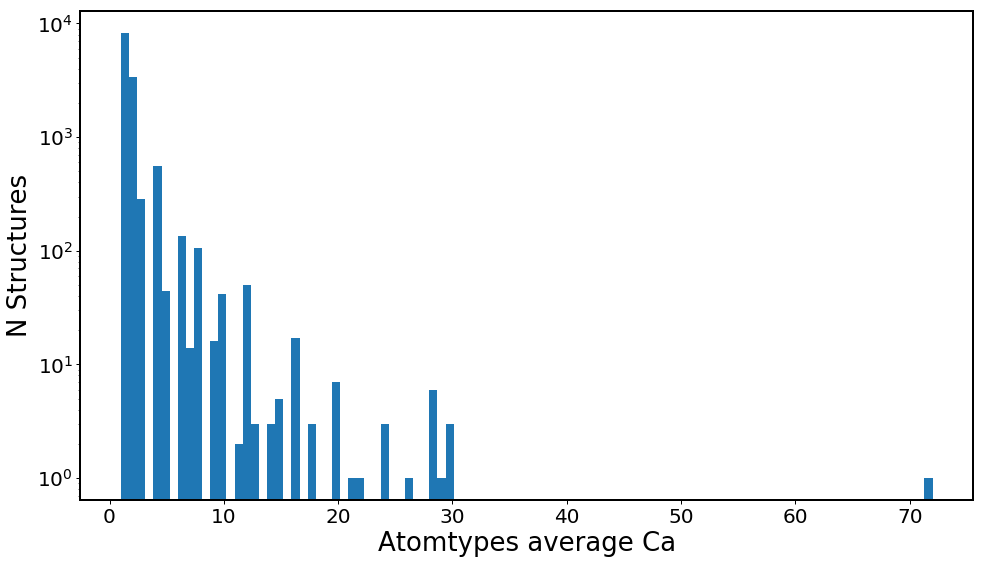

(63.47657762291908, 36.52342237708092)


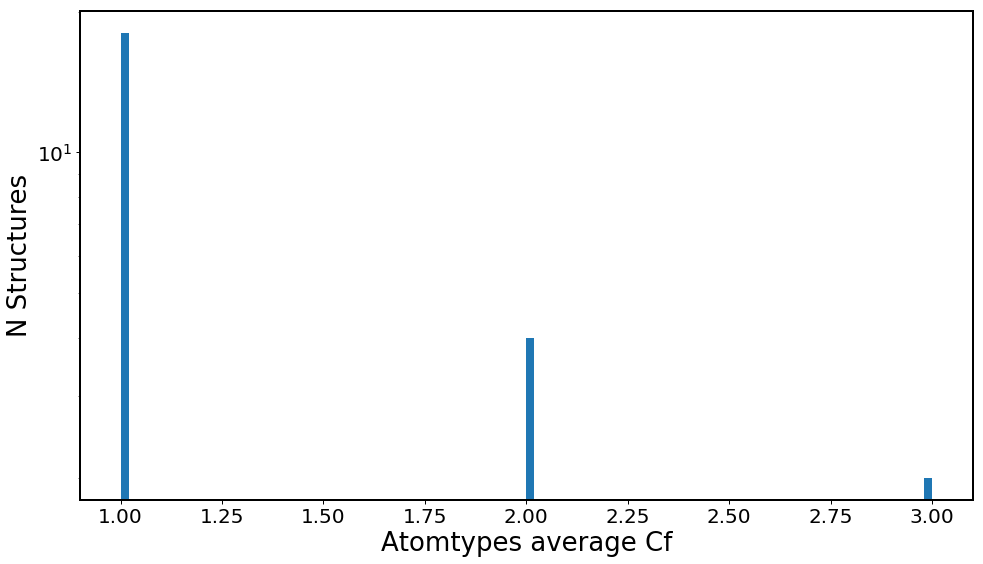

(75.0, 25.0)


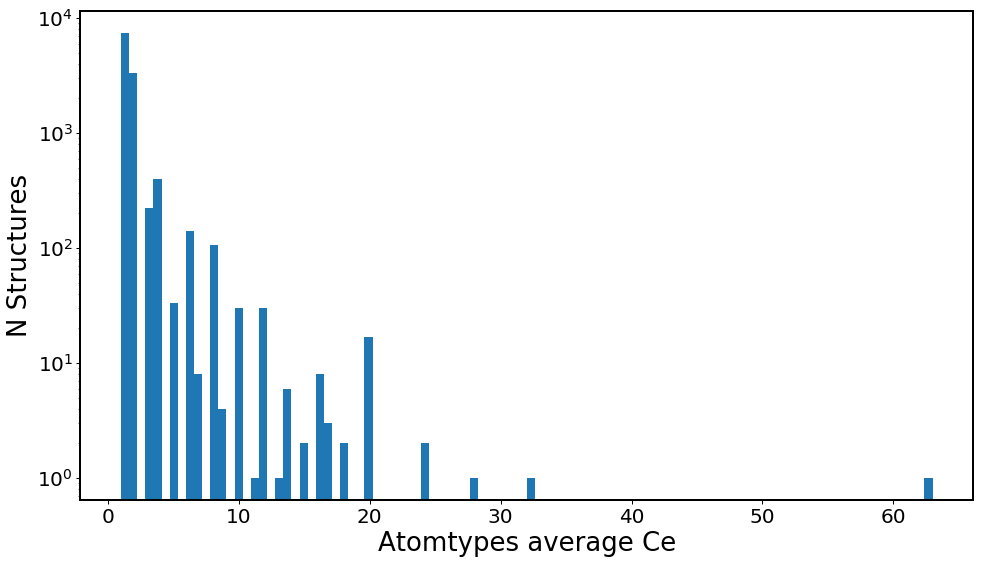

(62.83864372124724, 37.16135627875276)


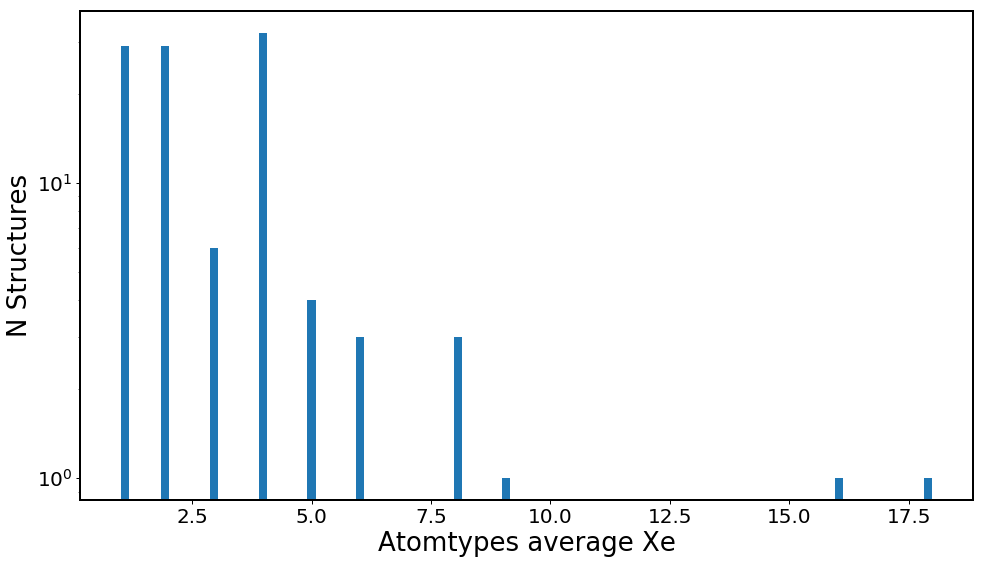

(26.605504587155966, 73.39449541284404)


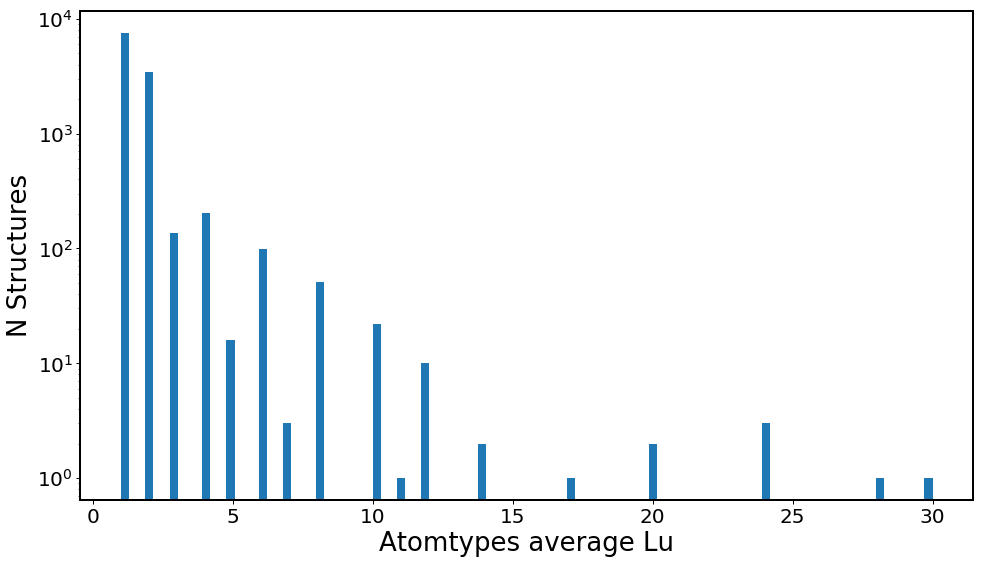

(65.23635095063666, 34.76364904936333)


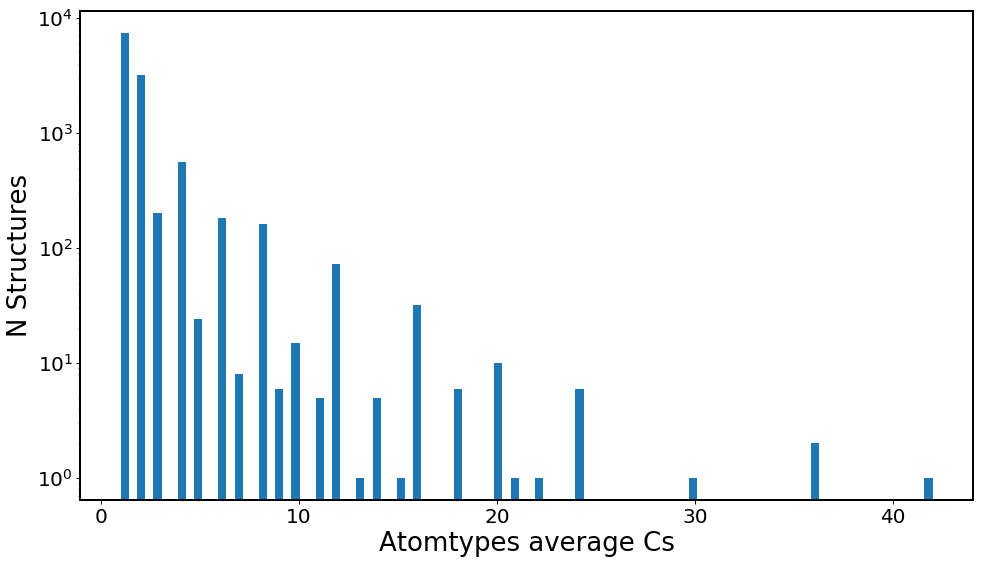

(62.153689739896635, 37.846310260103365)


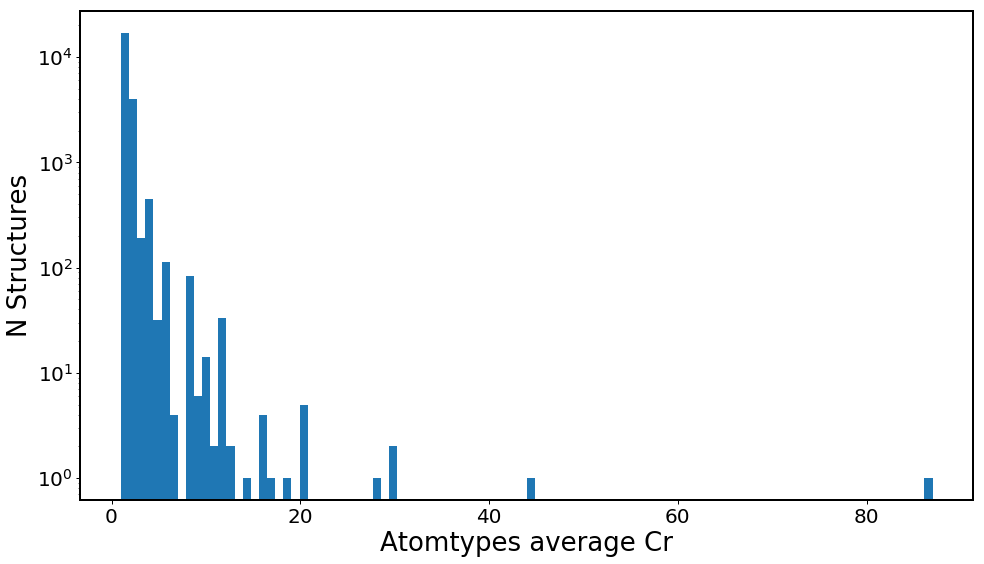

(77.42202214157747, 22.57797785842253)


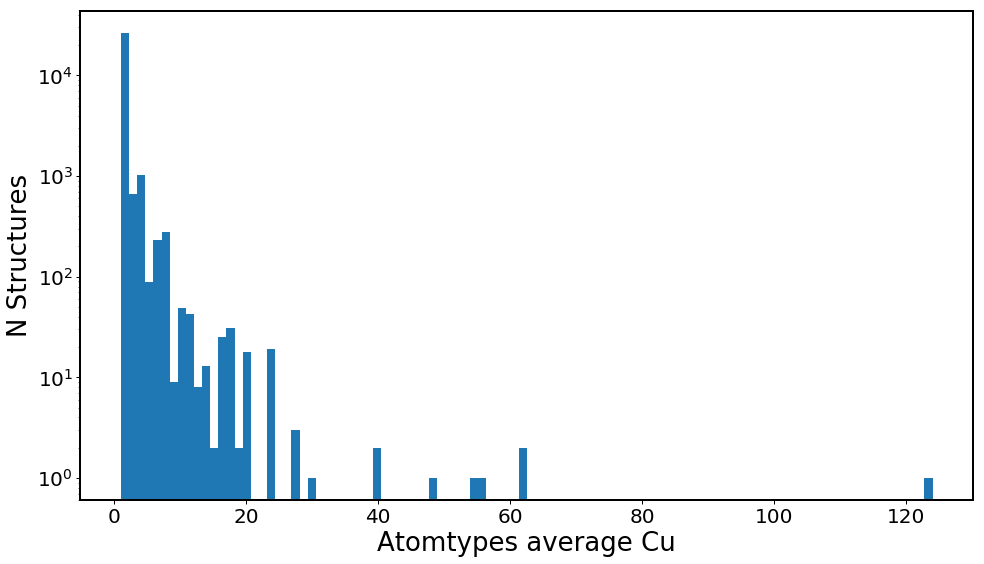

(69.09444714712627, 30.90555285287372)


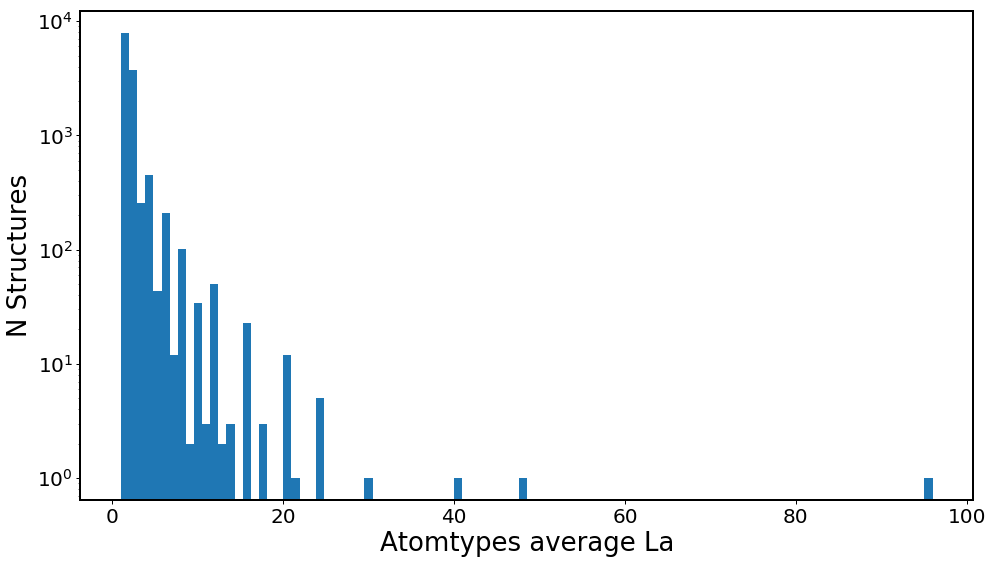

(61.246379080873716, 38.753620919126284)


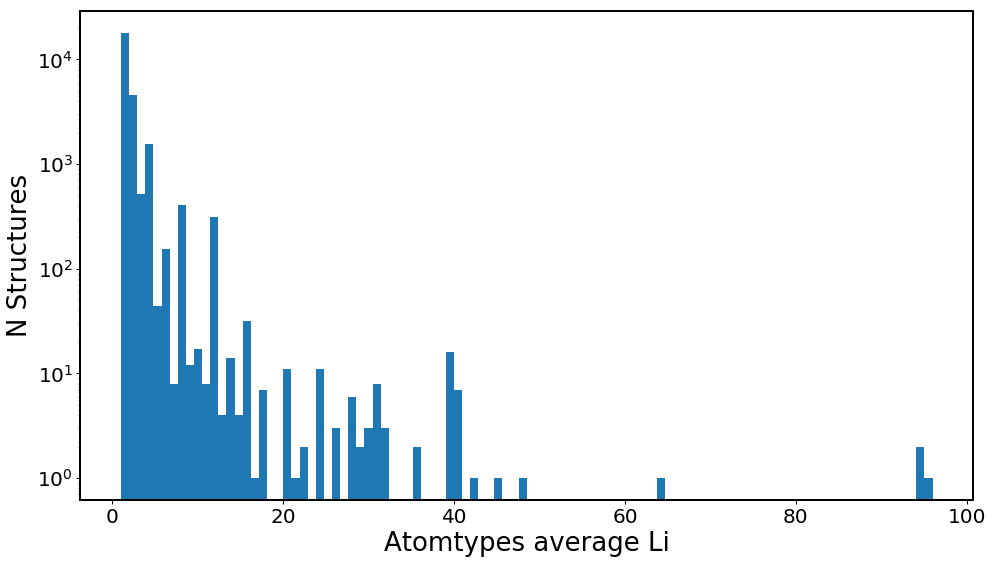

(69.50041078205078, 30.499589217949218)


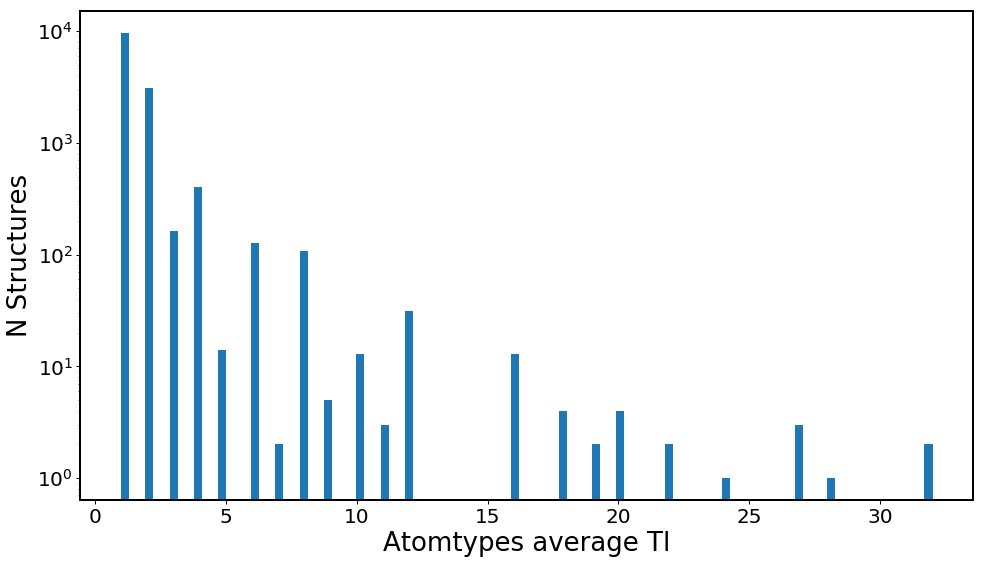

(70.44316843345112, 29.55683156654888)


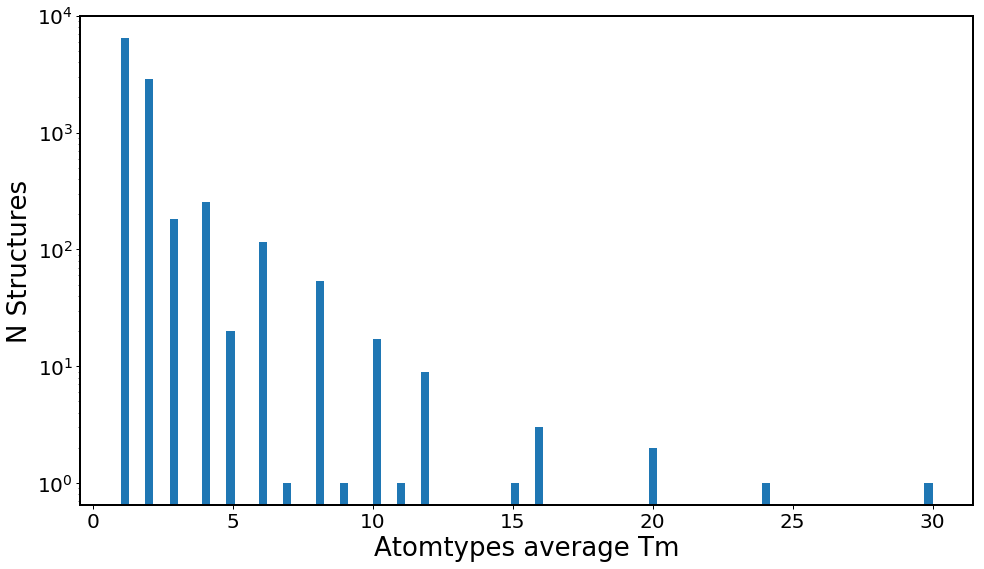

(64.46853357422462, 35.53146642577537)


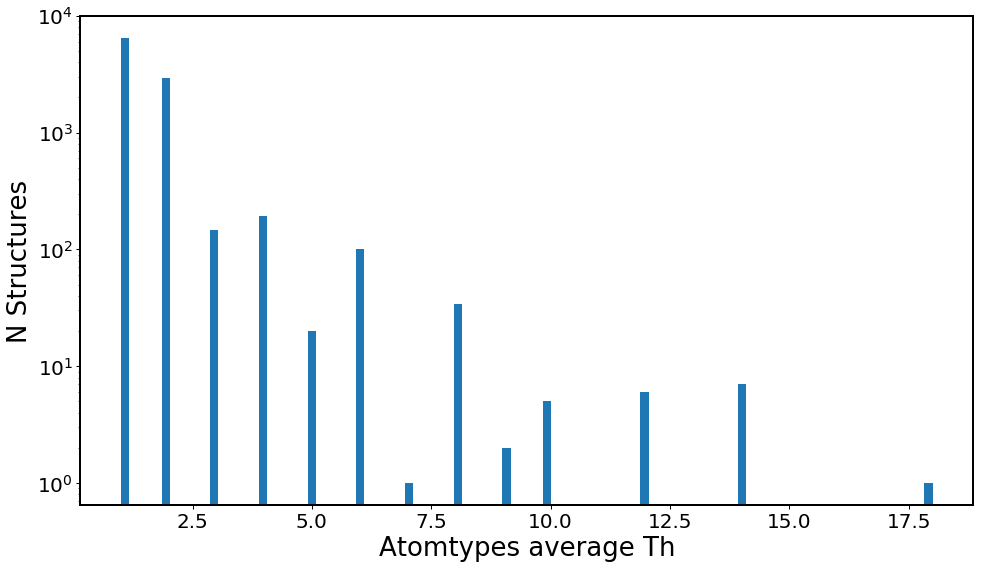

(64.8268179056107, 35.17318209438931)


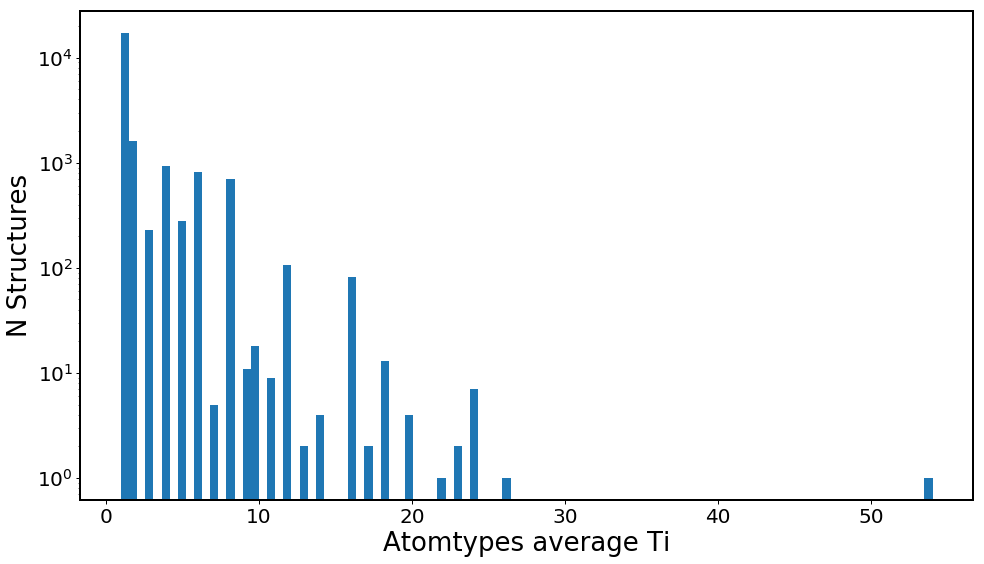

(77.87934186471664, 22.120658135283367)


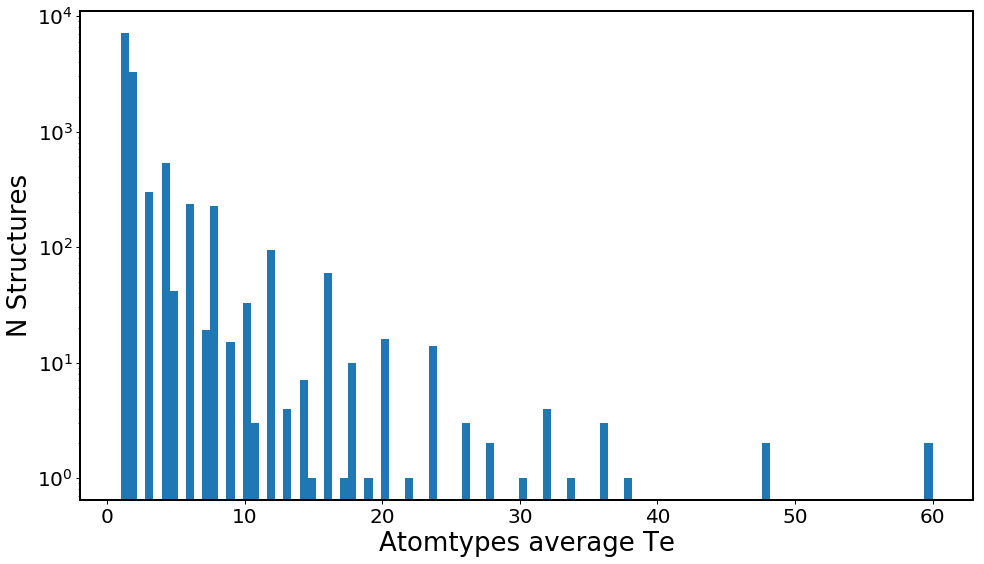

(58.95814263127236, 41.04185736872764)


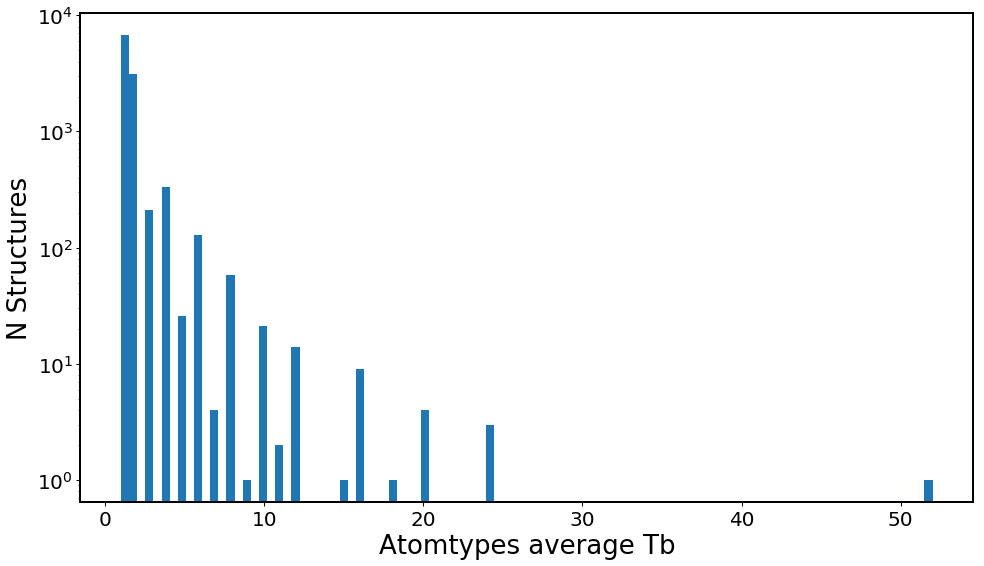

(63.14406381980291, 36.85593618019709)


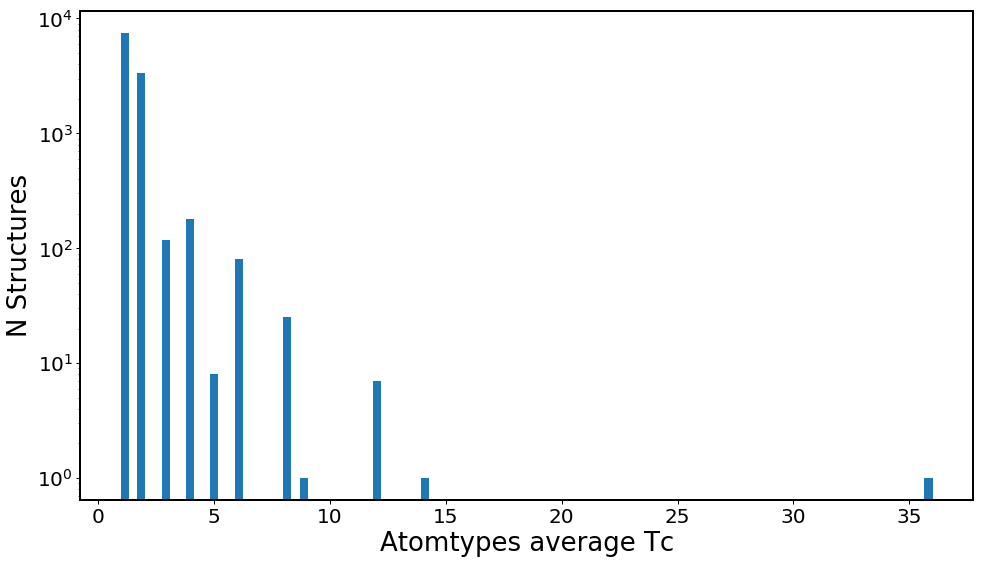

(66.30376583972871, 33.69623416027129)


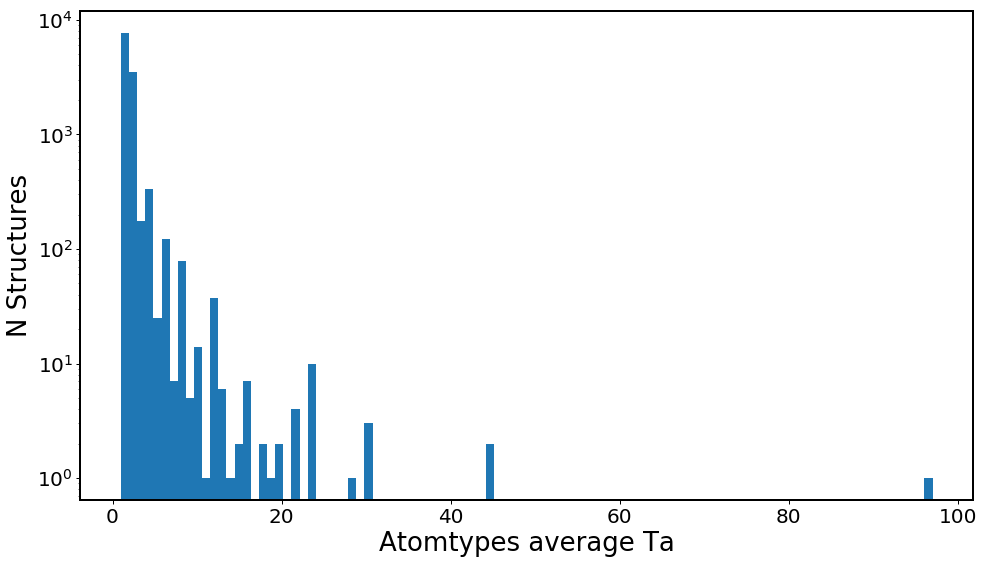

(63.547904191616766, 36.452095808383234)


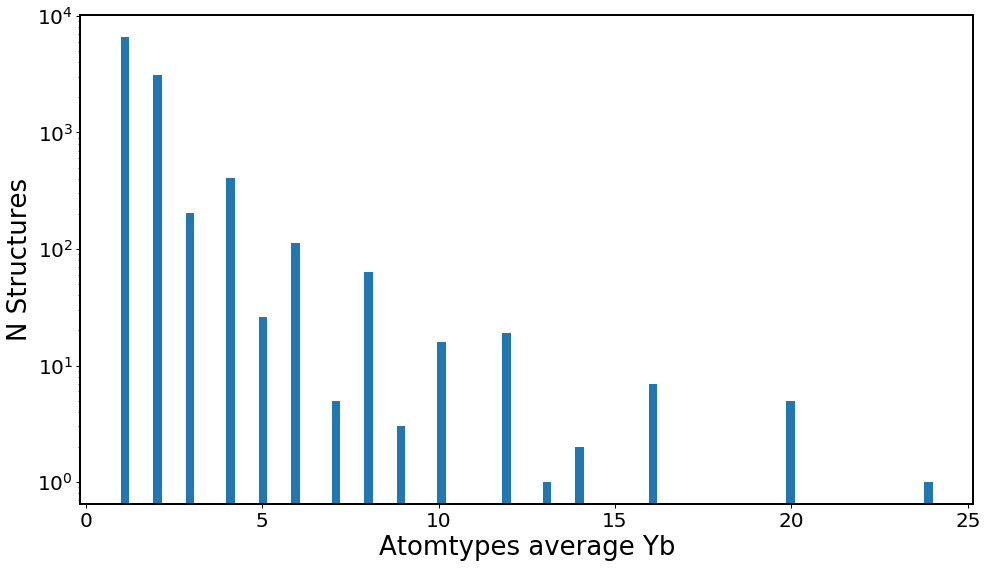

(62.10486466023093, 37.89513533976907)


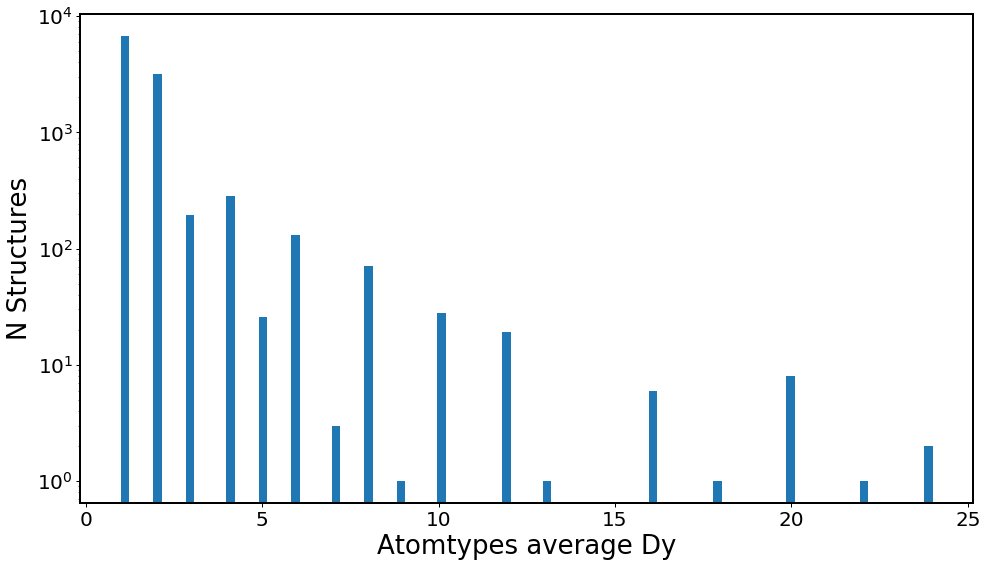

(62.95774647887325, 37.04225352112675)


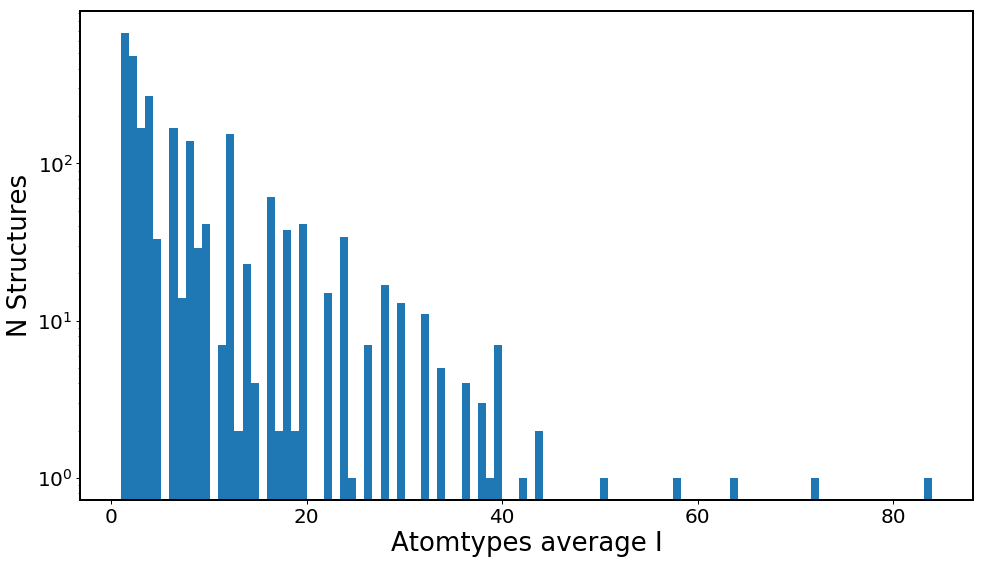

(27.10770471964502, 72.89229528035499)


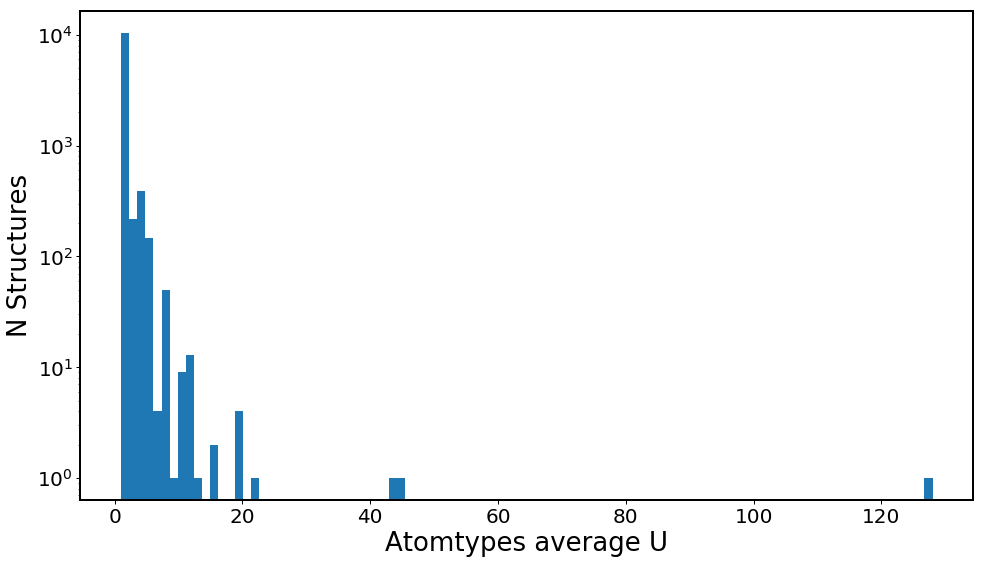

(66.92899302450367, 33.07100697549633)


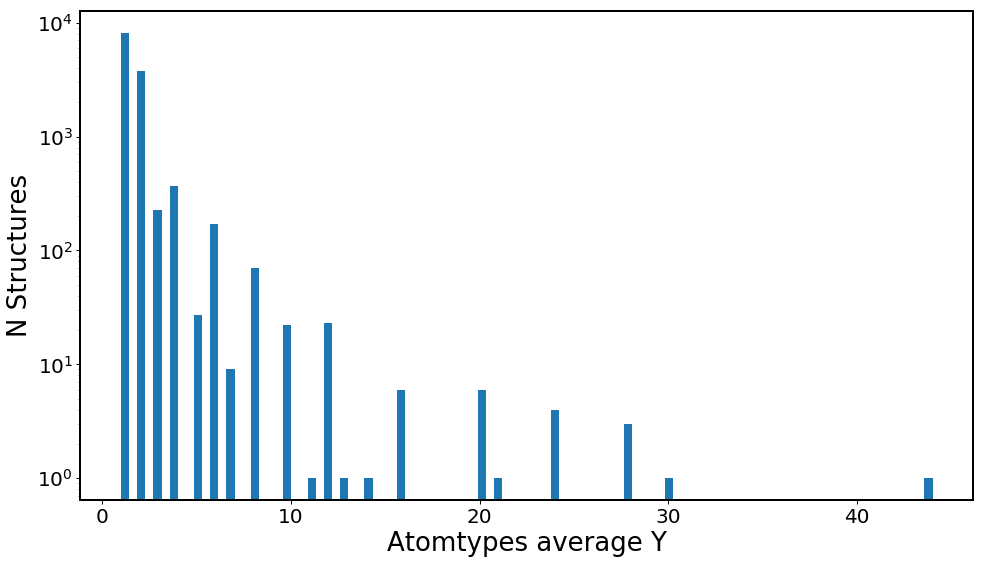

(63.11277375107163, 36.88722624892837)


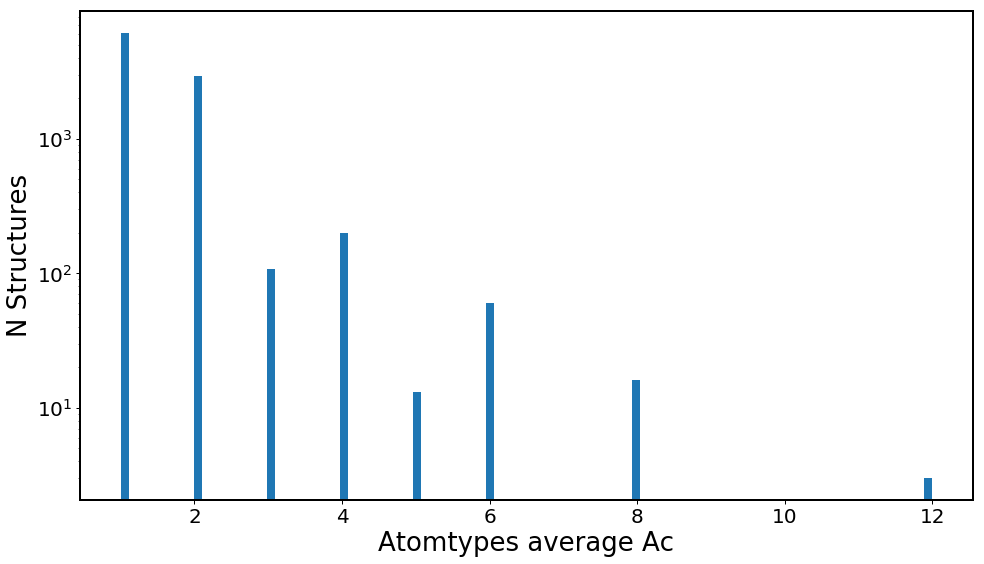

(64.59726201846546, 35.402737981534536)


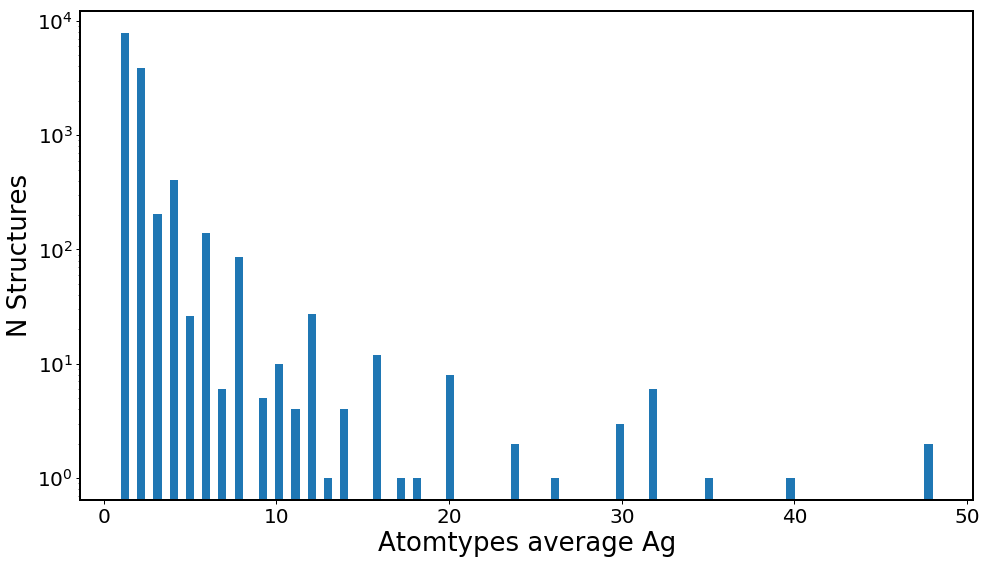

(61.806492578776094, 38.193507421223906)


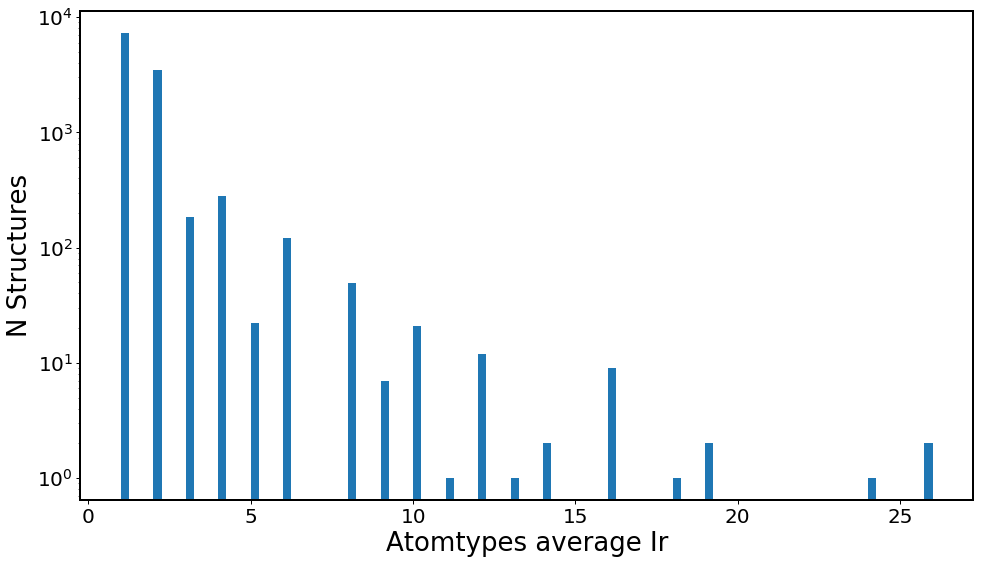

(63.313247751288095, 36.686752248711905)


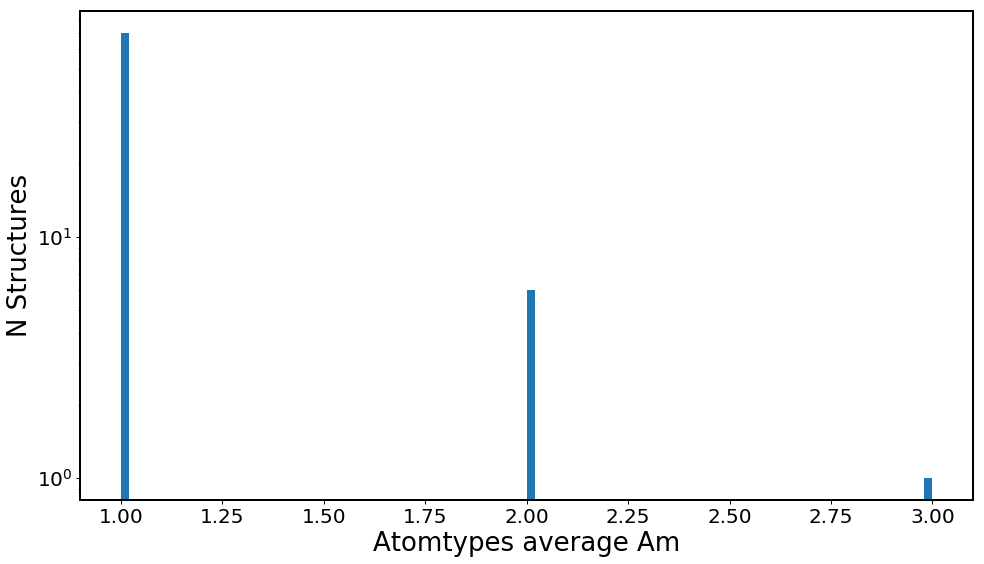

(90.9090909090909, 9.090909090909093)


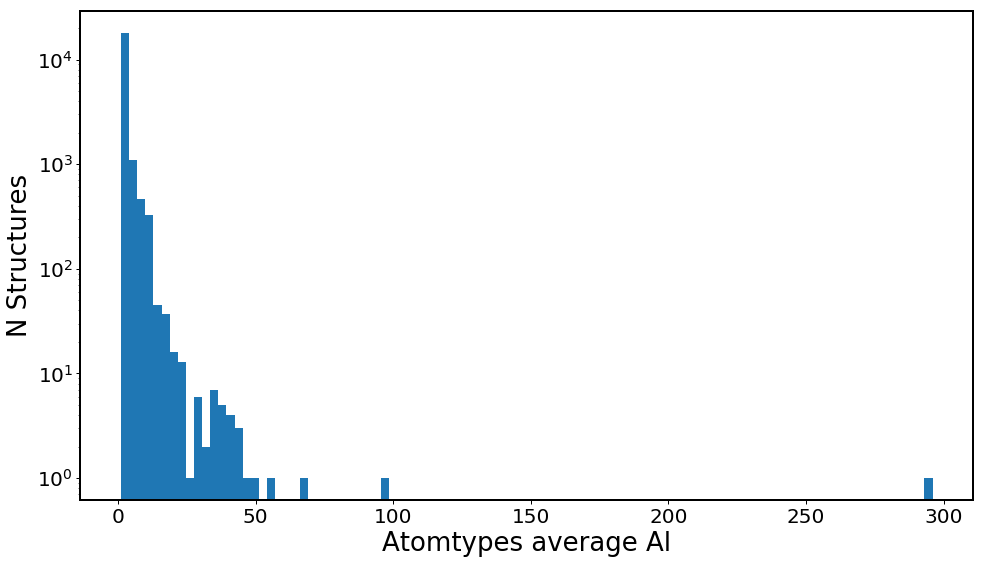

(65.99506371832973, 34.004936281670275)


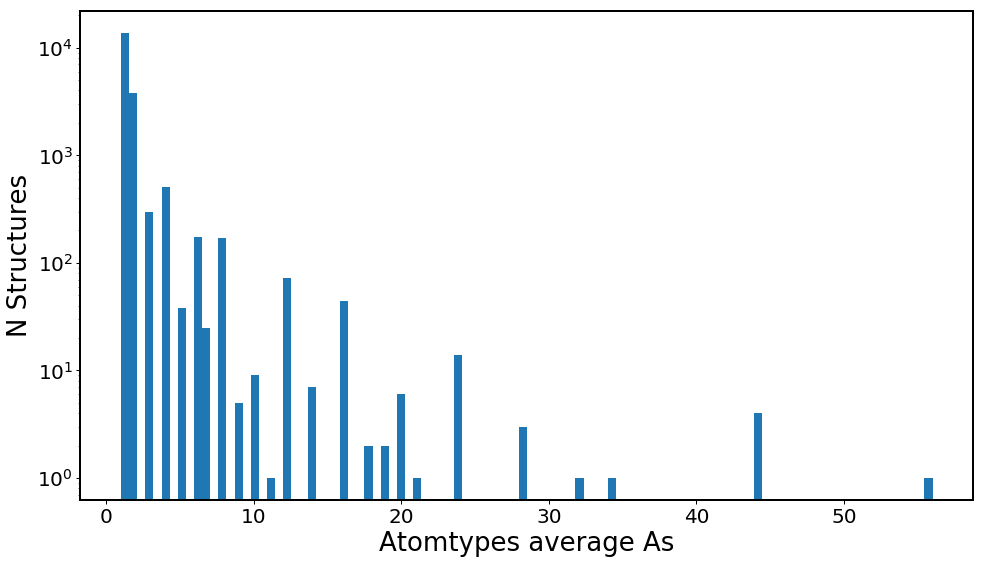

(72.38257535413783, 27.617424645862176)


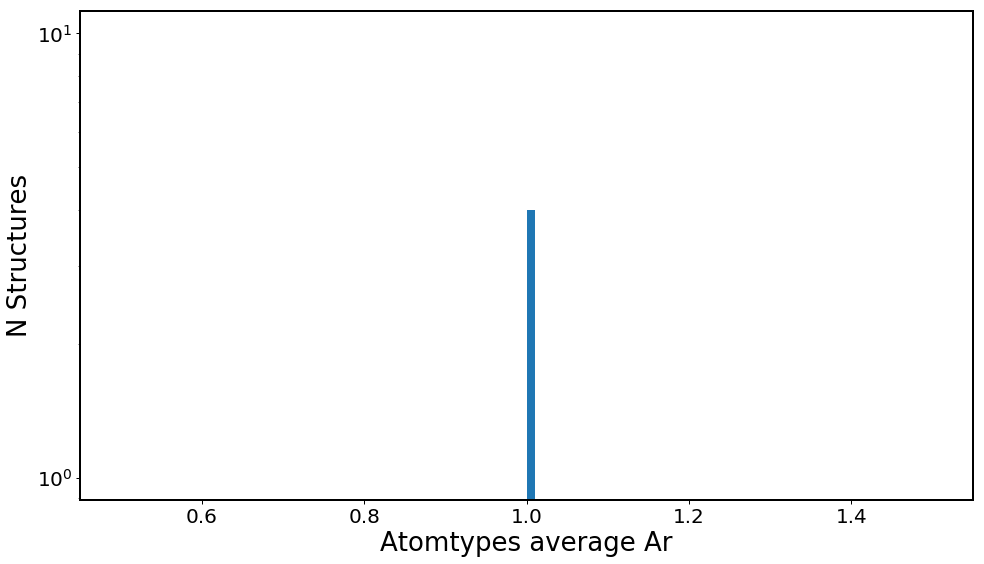

(100.0, 0.0)


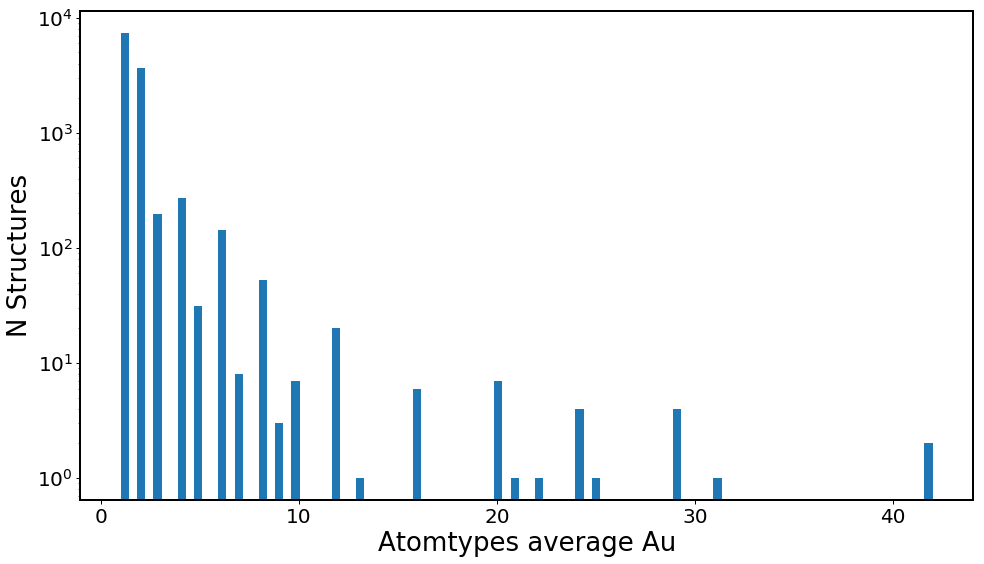

(62.47867621972023, 37.52132378027977)


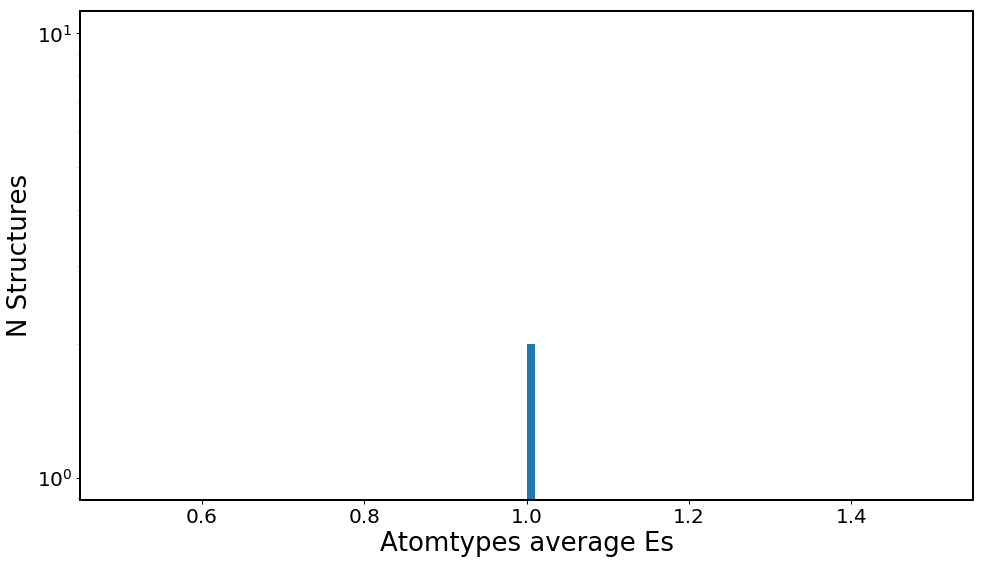

(100.0, 0.0)


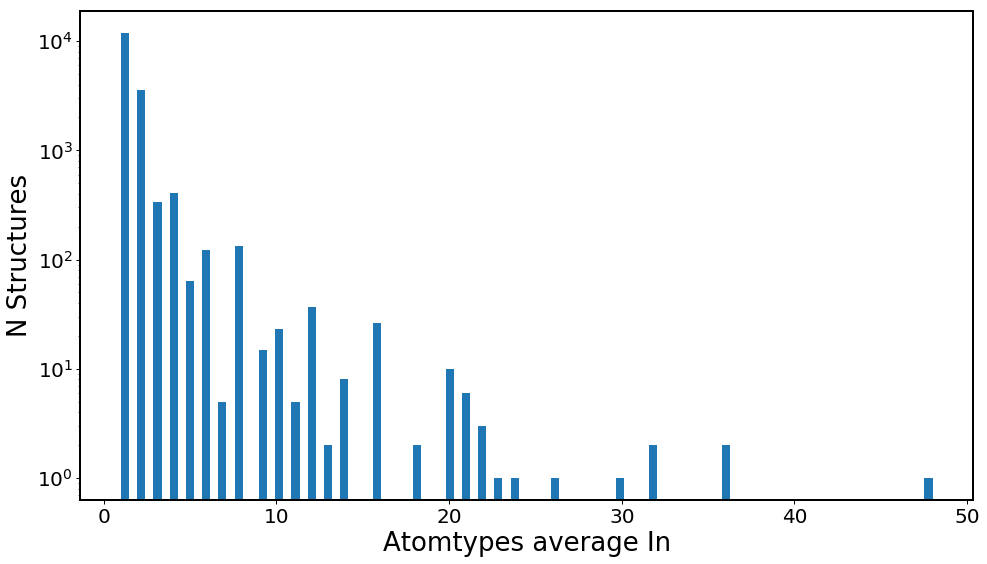

(71.16220130340332, 28.83779869659667)


In [43]:
for key, val in atomtyp_element_ditc.iteritems():
    fig = pp.figure(num=None, figsize=(16,9))
    ax1 = fig.add_subplot(111)
    bins = [i for i in np.linspace(0.5, 40.5, num=41)]
    count1 = 0
    for va in val:
        if va == 1:
            count1 = count1 + 1
    total = float(len(val))
    ones = count1 / total
    nonones = 1-ones
    ax1 = histogram(val, 
                bins=100,#bins, #legend=True, 
                label=[],
                #range=[0.5,40.5],#range=[0.5,200.5],
                log=True, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                xlabel='Atomtypes average {}'.format(key), #limits=[[0, 40],[0, 800000]], #0.3,3.1]
                ylabel=u'N Structures',
                legend_option={'bbox_to_anchor' : (0.05, 0.97), 'fontsize' : 18, 'borderaxespad' : 1 , 'loc' : 2, 'fancybox' : True} #'linewidth' : 1.5,, 'title' : 'Legend',
                , density=False, saveas='All_natoms_oqmd', axis=ax1)# type=bar_stack
    print(ones*100, nonones*100)
  
    

In [18]:
total_natomtypes.keys()

[1, 2, 3, 4, 5, 6, 7, 8, 9]

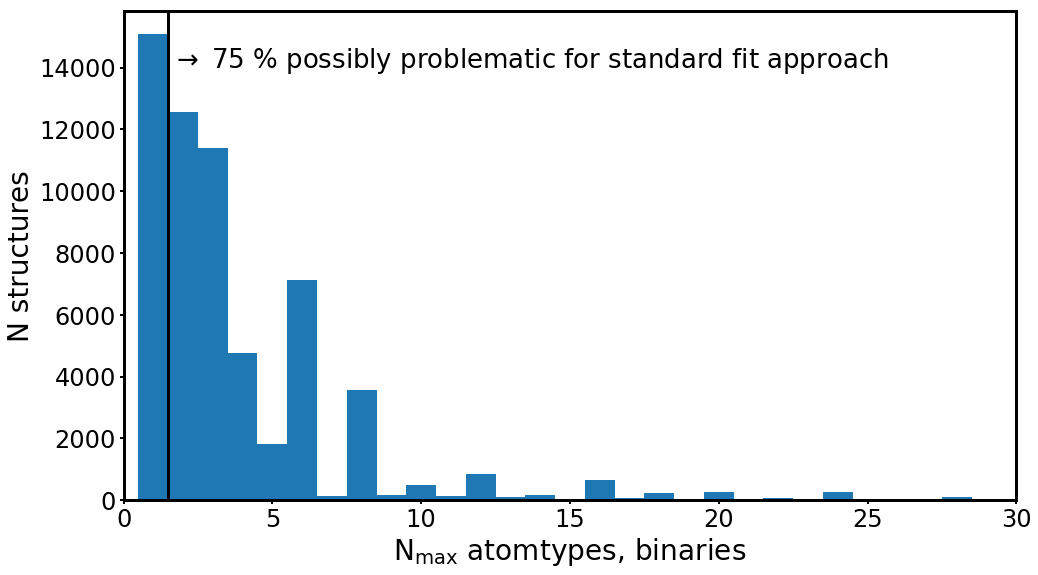

(24.801789650294438, 75.19821034970556)


In [41]:
# FUCK this is inpgen, not spglib.... inpgen is to bad...
# atomtype org failed, not parsed.... do so only for icsd.
set_plot_defaults(labelfonstsize=28, ticklabelsize=24, axis_linewidth=3.0, tick_paramsx = {'size' : 4.0, 'width' : 2.0,'labelsize' : 24,
                                     'length' : 5}, tick_paramsy = {'size' : 4.0, 'width' : 2.0,
                                     'labelsize' : 24,
                                     'length' : 5}, use_axis_fromatter=False)
key = 2
val =  total_natomtypes[key]
fig = pp.figure(num=None, figsize=(16,9))
ax1 = fig.add_subplot(111)
rlim = 30
bins = [i for i in np.linspace(0.5, rlim + 0.5, num=rlim+1)]
count1 = 0
for va in val:
    if va == 1:
        count1 = count1 + 1
total = float(len(val))
ones = count1 / total
nonones = 1-ones
text_size = 26
ax1.axvline(ymin=0, ymax=10000, x=1.5, linewidth=3.0, color='k')
#ax1.axvline(ymin=0, ymax=0.1, x=1.0/10.93, linewidth=1.0, color='b')
ax1.text(1.6, 14000, r'$\rightarrow$ 75 % possibly problematic for standard fit approach', fontsize=text_size)    
ax1 = histogram(val, 
                bins=bins, #legend=True, 
                label=[],
                range=[0.5,40.5],#range=[0.5,200.5],
                log=False, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                xlabel='N$_{\mathrm{max}}$ atomtypes, binaries', limits=[[0, rlim],[None,None]],#[0, 800000]], #0.3,3.1]
                ylabel=u'N structures',
                legend_option={'bbox_to_anchor' : (0.05, 0.97), 'fontsize' : 18, 'borderaxespad' : 1 , 'loc' : 2, 'fancybox' : True} #'linewidth' : 1.5,, 'title' : 'Legend',
                , density=False, saveas='All_natoms_oqmd_2', axis=ax1)# type=bar_stack
print(ones*100, nonones*100)


#pp.savefig('All_natoms_oqmd_2.pdf', transparent=True)#, layout='tight')
fig.savefig('All_natoms_oqmd_2.pdf', transparent=True)


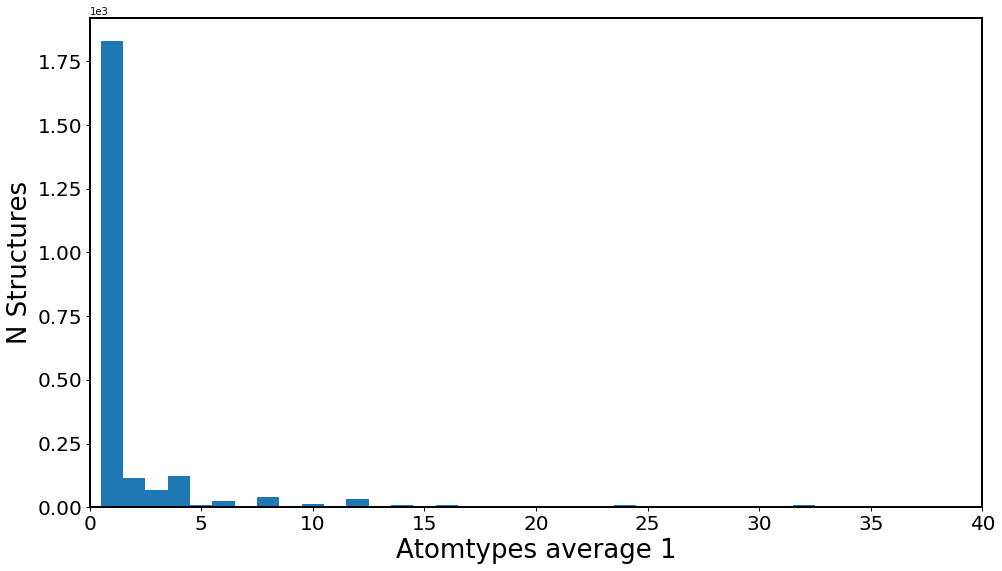

(77.91986359761296, 22.08013640238704)


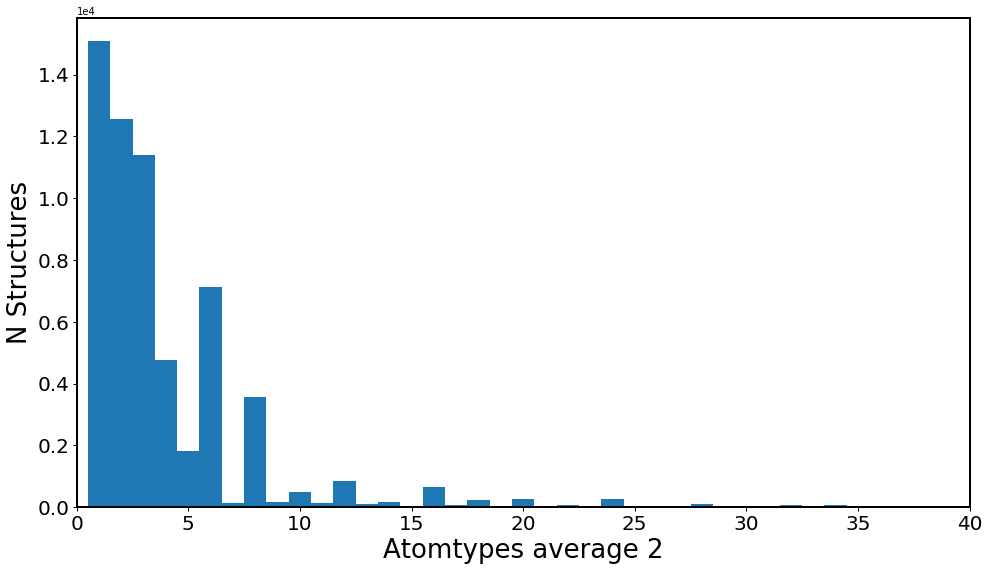

(24.801789650294438, 75.19821034970556)


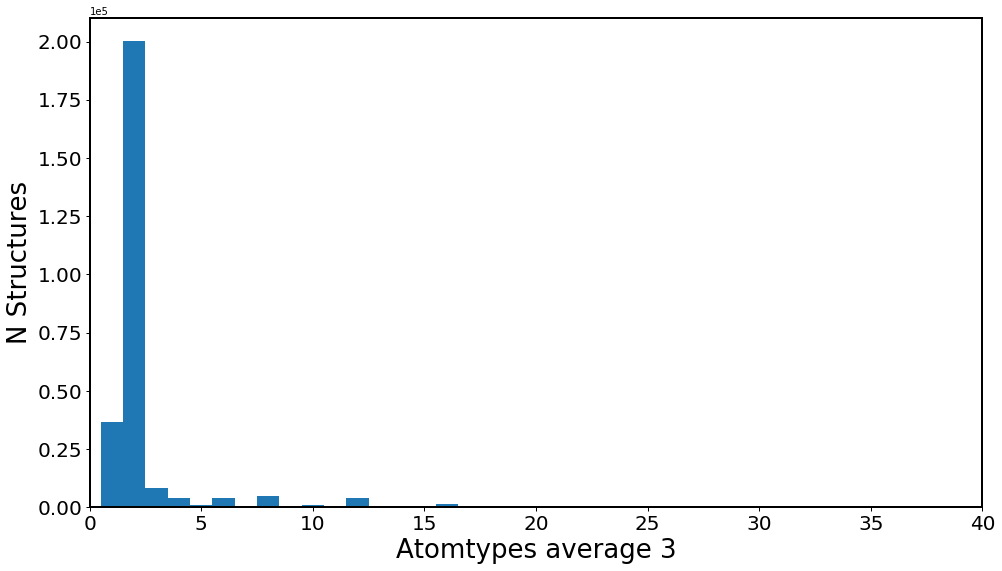

(13.478908736363804, 86.5210912636362)


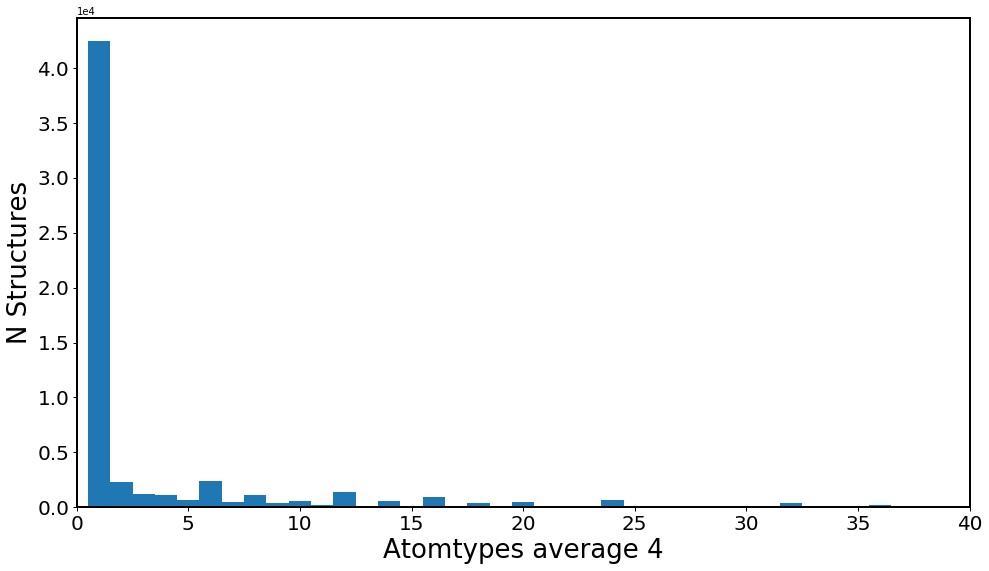

(71.42568557143578, 28.574314428564218)


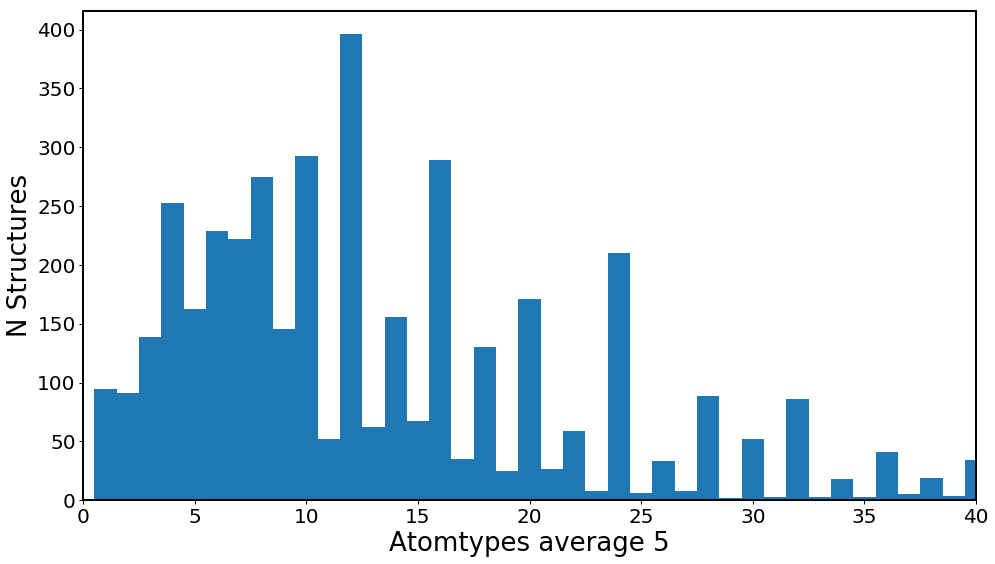

(2.2946859903381642, 97.70531400966183)


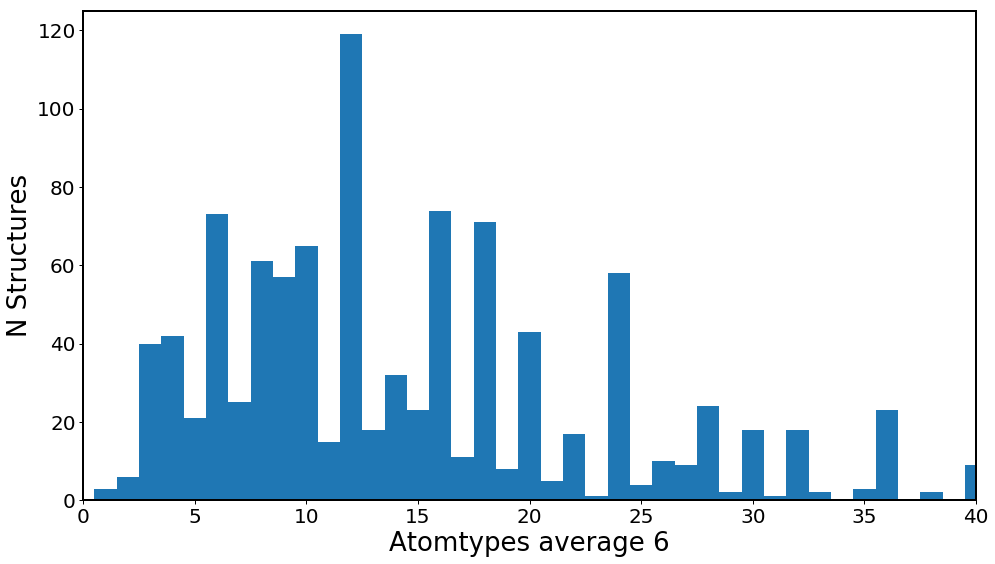

(0.27472527472527475, 99.72527472527473)


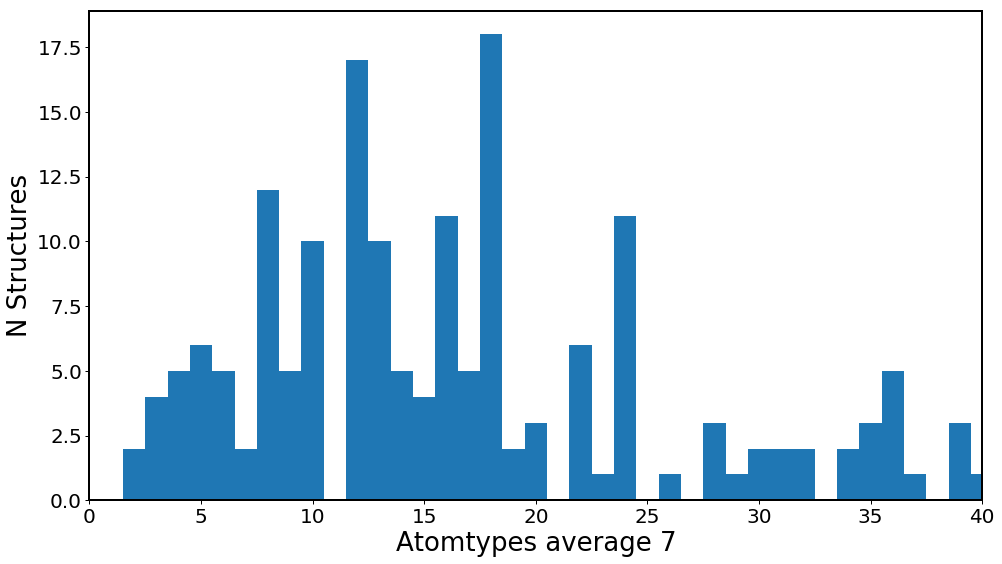

(0.0, 100.0)


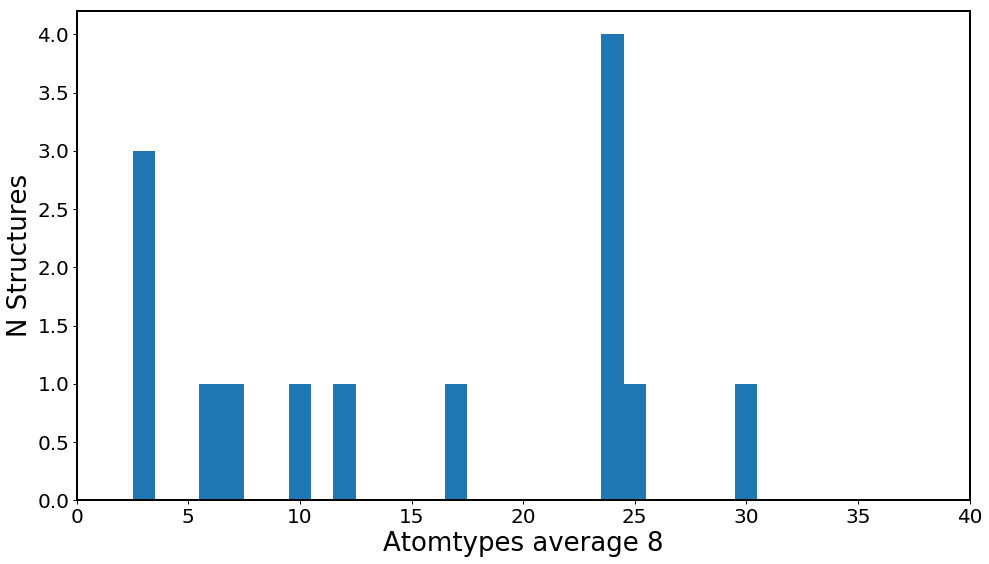

(0.0, 100.0)


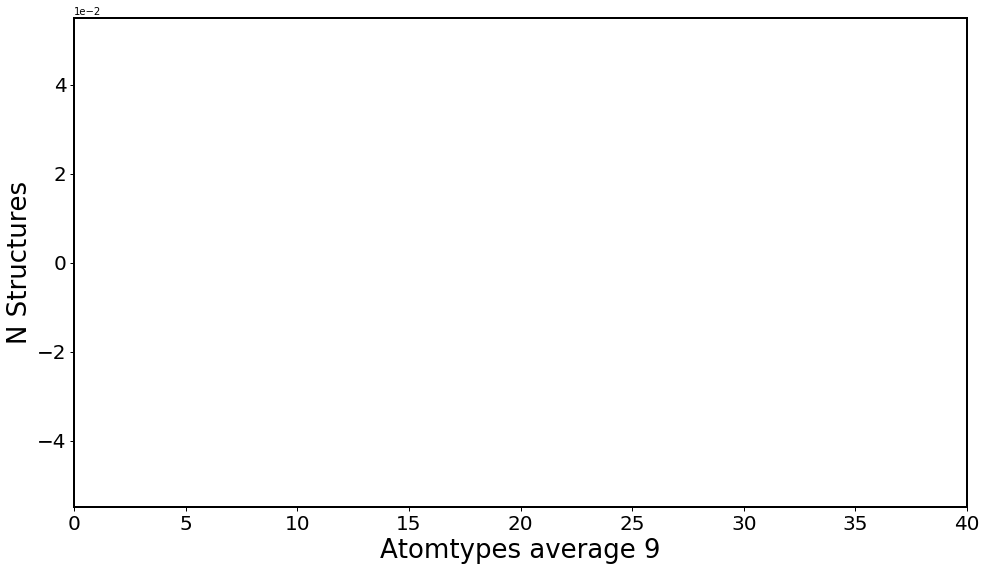

(0.0, 100.0)


In [44]:
for key, val in total_natomtypes.iteritems():
    fig = pp.figure(num=None, figsize=(16,9))
    ax1 = fig.add_subplot(111)
    bins = [i for i in np.linspace(0.5, 40.5, num=41)]
    count1 = 0
    for va in val:
        if va == 1:
            count1 = count1 + 1
    total = float(len(val))
    ones = count1 / total
    nonones = 1-ones
    
    ax1 = histogram(val, 
                bins=bins, #legend=True, 
                label=[],
                range=[0.5,40.5],#range=[0.5,200.5],
                log=False, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                xlabel='Atomtypes average {}'.format(key), limits=[[0, 40],[None,None]],#[0, 800000]], #0.3,3.1]
                ylabel=u'N Structures',
                legend_option={'bbox_to_anchor' : (0.05, 0.97), 'fontsize' : 18, 'borderaxespad' : 1 , 'loc' : 2, 'fancybox' : True} #'linewidth' : 1.5,, 'title' : 'Legend',
                , density=False, saveas='All_natoms_oqmd', axis=ax1)# type=bar_stack
    print(ones*100, nonones*100)



In [45]:
natom_types_elm[:5]

[[[u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'La',
   u'La',
   u'La',
   u'La',
   u'La',
   u'La']],
 [[u'Ce',
   u'Ce',
   u'Ce',
   u'Ce',
   u'Ce',
   u'Ce',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F']],
 [[u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'La',
   u'La',
   u'La',
   u'La',
   u'La',
   u'La']],
 [[u'Ce',
   u'Ce',
   u'Ce',
   u'Ce',
   u'Ce',
   u'Ce',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F']],
 [[u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'F',
   u'

In [46]:
# First evaluation property dict, without element information

In [47]:
[u'strucvol', u'jri', u'struc_uuid', u'oqmd_label', u'struc_symg', u'uuid', u'inpgen_symg', u'nsym_inpgen', u'nspecies', u'los', u'natomtypes', u'rmts', u'formula', u'vasp_magmom', u'natomtypes_org', u'natoms', u'elements', u'gmaxxc', u'gmax', u'nkpt', u'jspins', u'vasp_delta_e', u'struc_symsm', u'process_id', u'dx', u'nlines_inpxml', u'nsym', u'lnonsph', u'inpxml_size', u'lmax', u'kmax', u'pbc', u'runtime', u'oqmd_id']

[u'strucvol',
 u'jri',
 u'struc_uuid',
 u'oqmd_label',
 u'struc_symg',
 u'uuid',
 u'inpgen_symg',
 u'nsym_inpgen',
 u'nspecies',
 u'los',
 u'natomtypes',
 u'rmts',
 u'formula',
 u'vasp_magmom',
 u'natomtypes_org',
 u'natoms',
 u'elements',
 u'gmaxxc',
 u'gmax',
 u'nkpt',
 u'jspins',
 u'vasp_delta_e',
 u'struc_symsm',
 u'process_id',
 u'dx',
 u'nlines_inpxml',
 u'nsym',
 u'lnonsph',
 u'inpxml_size',
 u'lmax',
 u'kmax',
 u'pbc',
 u'runtime',
 u'oqmd_id']

In [12]:
natom_types = property_dict[u'natomtypes']
nspecies = property_dict[u'nspecies']
print(len(natom_types), len(nspecies))
natom_per_species = [val/float(nspecies[i]) for i, val in enumerate(natom_types)]

(824388, 824388)


/Users/broeder/aiida/github/envs/env_aiida_new/lib/python2.7/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


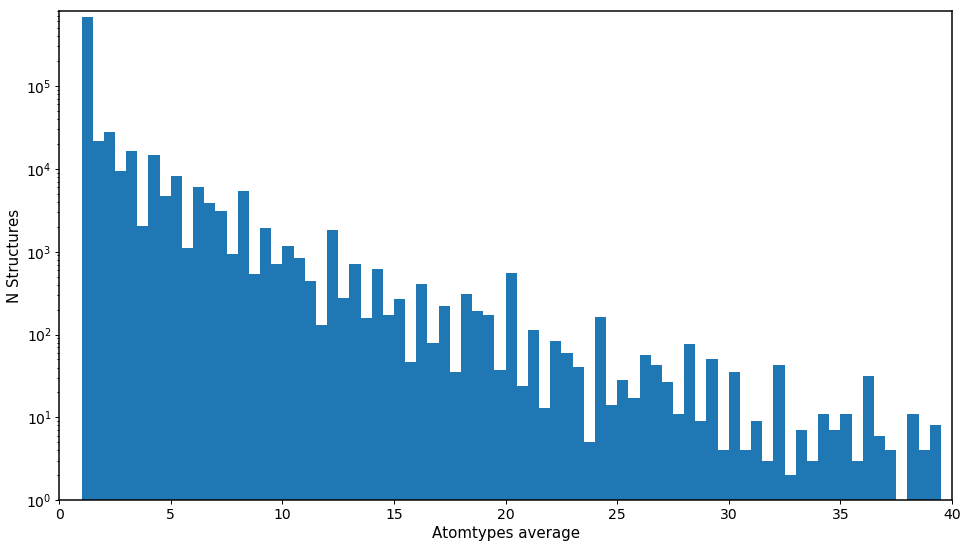

In [13]:
fig = pp.figure(num=None, figsize=(16,9))
ax1 = fig.add_subplot(111)
bins = [i for i in np.linspace(0.5, 40.5, num=81)]

ax1 = histogram(natom_per_species, 
                bins=bins, #legend=True, 
                label=[],
                range=[0.5,40.5],#range=[0.5,200.5],
                log=True, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                xlabel='Atomtypes average', limits=[[0, 40],[0, 800000]], #0.3,3.1]
                ylabel=u'N Structures',
                legend_option={'bbox_to_anchor' : (0.05, 0.97), 'fontsize' : 18, 'borderaxespad' : 1 , 'loc' : 2, 'fancybox' : True} #'linewidth' : 1.5,, 'title' : 'Legend',
, density=False, saveas='All_natoms_oqmd', axis=ax1)# type=bar_stack



## Plot kpoint density histogram with type (metal, ...) information 

In [ ]:
natomt = property_dict['natomtypes']

In [ ]:
nkpt = property_dict['nkpt']
volume = property_dict['strucvol']
nsym = property_dict['nsym_inpgen']
natomt = property_dict['natomtypes']
kdensities = []
for i,kpt in enumerate(nkpt):
    sym = nsym[i]
    if sym == 3:
        sym=1
    rep_vol = 8*(np.pi**3)/volume[i]
    #kdensities.append(kpt/sym/rep_vol)
    kdensities.append(kpt/float(natomt[i]))

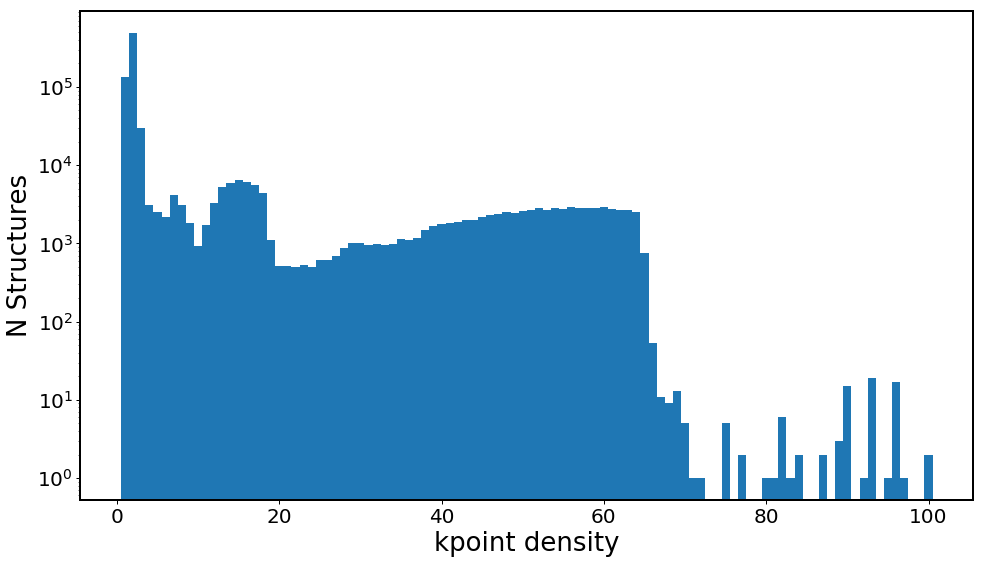

In [51]:
fig = pp.figure(num=None, figsize=(16,9))
ax1 = fig.add_subplot(111)
bins = [i for i in np.linspace(0.5, 100.5, num=101)]
#bins = 100
ax1 = histogram(kdensities, 
                bins=bins, #legend=True, 
                label=[],
               # range=[0.5,40.5],#range=[0.5,200.5],
                log=True, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                xlabel='kpoint density', #limits=[[0, 40],[0, 800000]], #0.3,3.1]
                ylabel=u'N Structures',
                legend_option={'bbox_to_anchor' : (0.05, 0.97), 'fontsize' : 18, 'borderaxespad' : 1 , 'loc' : 2, 'fancybox' : True} #'linewidth' : 1.5,, 'title' : 'Legend',
, density=False, saveas='All_natoms_oqmd', axis=ax1)# type=bar_stack




## Plot Space group content

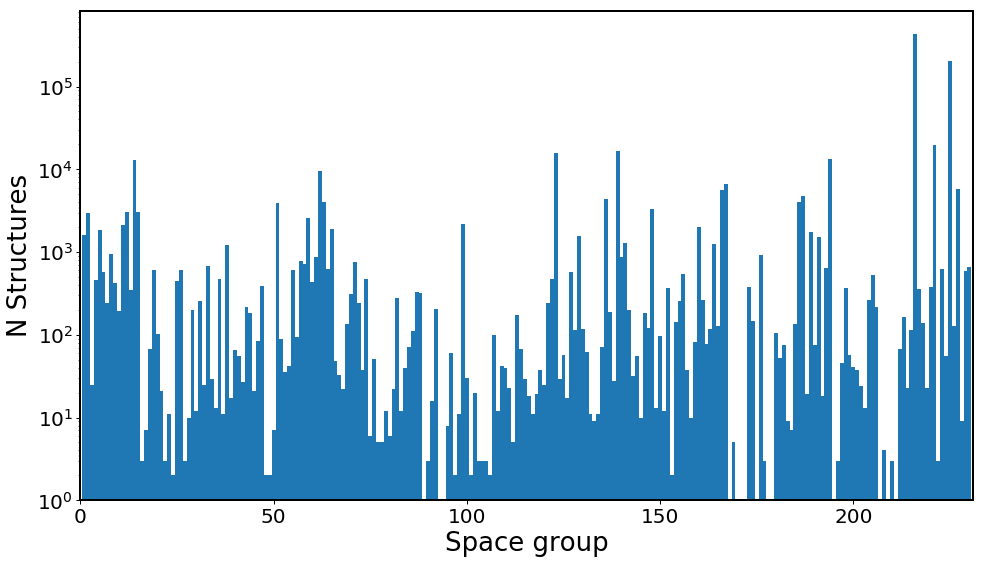

In [52]:
fig = pp.figure(num=None, figsize=(16,9))
ax1 = fig.add_subplot(111)
bins = [i for i in np.linspace(0.5, 230.5, num=231)]
#bins = [i for i in np.linspace(0.5, 11.5, num=12)] + [i for i in np.linspace(12.5, 400.5, num=21)]
#print(bins)
ax1 = histogram(property_dict['struc_symg'],#symmetry_group_types.values(),#property_dict['struc_symg'], 
                bins=bins, legend=False, 
                label=[],#'unary', 'binary', 'ternary', 'quaternary', 'pentenary +'],#symmetry_group_types.keys(),
                range=[0.5,230.5],#range=[0.5,200.5],
                log=True, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                xlabel='Space group', limits=[[0, 231],[0, None]], #0.3,3.1]
                ylabel=u'N Structures',
                legend_option={'bbox_to_anchor' : (0.05, 0.97), 'fontsize' : 18, 'borderaxespad' : 1 , 'loc' : 2, 'fancybox' : True} #'linewidth' : 1.5,, 'title' : 'Legend',
, density=False, saveas='All_natoms_oqmd', axis=ax1)# type=bar_stack

# TODO: add cubisch, hexagonal, 
# 1-15 Monoclinic, 16-74 Orthorhombic, 75-142, Tetragonal, 143-167 Trigonal, 168-194 Hexagonal, 195-230 Cubic

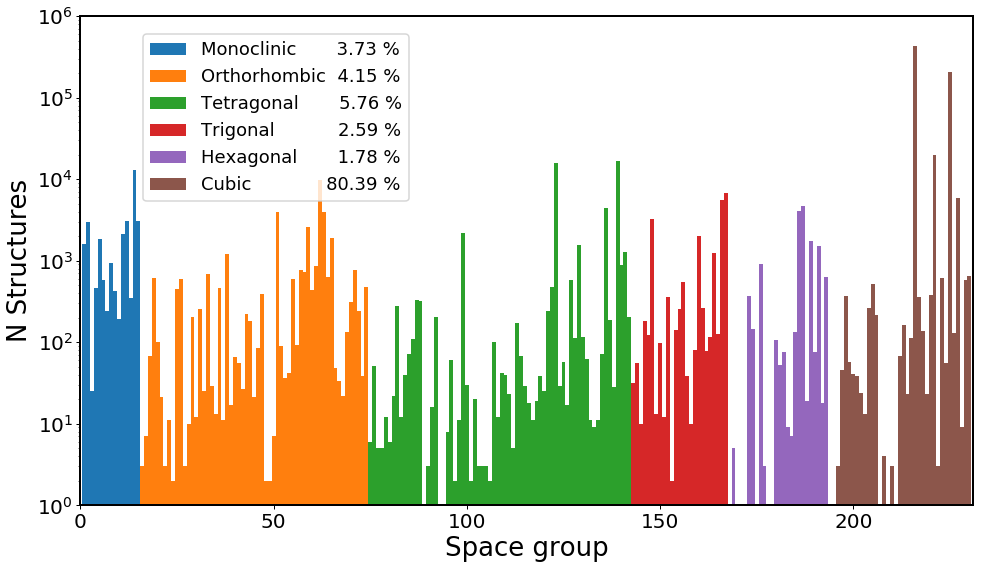

In [53]:

fig = pp.figure(num=None, figsize=(16,9))
ax1 = fig.add_subplot(111)
bins = [i for i in np.linspace(0.5, 230.5, num=231)]
#bins = [i for i in np.linspace(0.5, 11.5, num=12)] + [i for i in np.linspace(12.5, 400.5, num=21)]
#print(bins)
#labels = symmetry_group_types_percent.keys()
labels = ['Monoclinic     ', 'Orthorhombic', 'Tetragonal     ', 'Trigonal         ', 'Hexagonal     ', 'Cubic           ']


for i, label in enumerate(labels):
    labels[i] = label + '  {0:.2f} %'.format(symmetry_group_types_percent[label]*100)
    
ax1 = histogram(#symmetry_group_types.values(),#property_dict['struc_symg'], 
                [symmetry_group_types['Monoclinic'], symmetry_group_types['Orthorhombic'], symmetry_group_types['Tetragonal'], symmetry_group_types['Trigonal'], symmetry_group_types['Hexagonal'], symmetry_group_types['Cubic']],
                bins=bins, legend=True, 
                label=labels,#'unary', 'binary', 'ternary', 'quaternary', 'pentenary +'],#symmetry_group_types.keys(),
                range=[0.5,230.5],#range=[0.5,200.5],
                log=True, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                xlabel='Space group', limits=[[0, 231],[0, 1000002]], #0.3,3.1]
                ylabel=u'N Structures',
                legend_option={'bbox_to_anchor' : (0.05, 1.00), 'fontsize' : 18, 'borderaxespad' : 1 , 'loc' : 2, 'fancybox' : True} #'linewidth' : 1.5,, 'title' : 'Legend',
, density=False, saveas='All_natoms_oqmd', axis=ax1)# type=bar_stack

# https://stackoverflow.com/questions/25830780/tabular-legend-layout-for-matplotlib
# peaks = 216, 225

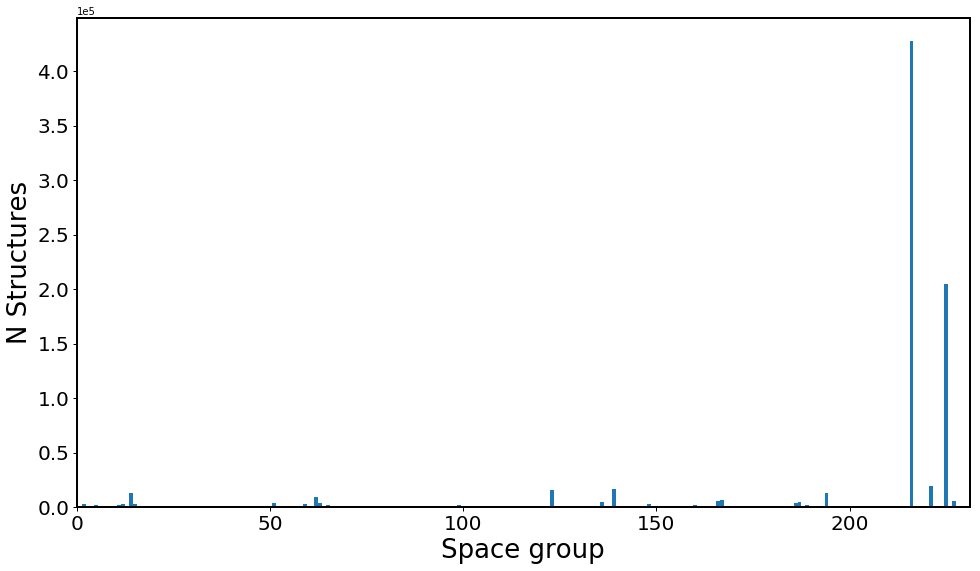

In [54]:
fig = pp.figure(num=None, figsize=(16,9))
ax1 = fig.add_subplot(111)
bins = [i for i in np.linspace(0.5, 230.5, num=231)]
#bins = [i for i in np.linspace(0.5, 11.5, num=12)] + [i for i in np.linspace(12.5, 400.5, num=21)]
#print(bins)
ax1 = histogram(property_dict['struc_symg'],#symmetry_group_types.values(),#property_dict['struc_symg'], 
                bins=bins, legend=False, 
                label=[],#'unary', 'binary', 'ternary', 'quaternary', 'pentenary +'],#symmetry_group_types.keys(),
                range=[0.5,230.5],#range=[0.5,200.5],
                log=False, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                xlabel='Space group', limits=[[0, 231],[0, None]], #0.3,3.1]
                ylabel=u'N Structures',
                legend_option={'bbox_to_anchor' : (0.05, 0.97), 'fontsize' : 18, 'borderaxespad' : 1 , 'loc' : 2, 'fancybox' : True} #'linewidth' : 1.5,, 'title' : 'Legend',
, density=False, saveas='All_natoms_oqmd', axis=ax1)# type=bar_stack



## Plot Nelements histogramm

In [55]:
element_type2 = {1: 'H', 2: 'Nobel gas', 3: 'Alkali & Alkaline earth metal', 4: 'Alkali & Alkaline earth metal', 5: 'Metalloid', 6: 'Reactive nonmetal', 7: 'Reactive nonmetal', 8: 'Reactive nonmetal', 9: 'Reactive nonmetal', 10: 'Nobel gas', 11: 'Alkali & Alkaline earth metal', 12: 'Alkali & Alkaline earth metal', 13: 'Post-transition metal', 14: 'Metalloid', 15: 'Reactive nonmetal', 16: 'Reactive nonmetal', 17: 'Reactive nonmetal', 18: 'Nobel gas', 19: 'Alkali & Alkaline earth metal', 20: 'Alkali & Alkaline earth metal', 21: 'Transition metal', 22: 'Transition metal', 23: 'Transition metal', 24: 'Transition metal', 25: 'Transition metal', 26: 'Transition metal', 27: 'Transition metal', 28: 'Transition metal', 29: 'Transition metal', 30: 'Post-transition metal', 31: 'Post-transition metal', 32: 'Metalloid', 33: 'Metalloid', 34: 'Reactive nonmetal', 35: 'Reactive nonmetal', 36: 'Nobel gas', 37: 'Alkali & Alkaline earth metal', 38: 'Alkali & Alkaline earth metal', 39: 'Transition metal', 40: 'Transition metal', 41: 'Transition metal', 42: 'Transition metal', 43: 'Transition metal', 44: 'Transition metal', 45: 'Transition metal', 46: 'Transition metal', 47: 'Transition metal', 48: 'Post-transition metal', 49: 'Post-transition metal', 50: 'Post-transition metal', 51: 'Metalloid', 52: 'Metalloid', 53: 'Reactive nonmetal', 54: 'Nobel gas', 55: 'Alkali & Alkaline earth metal', 56: 'Alkali & Alkaline earth metal', 57: 'Lanthanide & Actinide', 58: 'Lanthanide & Actinide', 59: 'Lanthanide & Actinide', 60: 'Lanthanide & Actinide', 61: 'Lanthanide & Actinide', 62: 'Lanthanide & Actinide', 63: 'Lanthanide & Actinide', 64: 'Lanthanide & Actinide', 65: 'Lanthanide & Actinide', 66: 'Lanthanide & Actinide', 67: 'Lanthanide & Actinide', 68: 'Lanthanide & Actinide', 69: 'Lanthanide & Actinide', 70: 'Lanthanide & Actinide', 71: 'Lanthanide & Actinide', 72: 'Transition metal', 73: 'Transition metal', 74: 'Transition metal', 75: 'Transition metal', 76: 'Transition metal', 77: 'Transition metal', 78: 'Transition metal', 79: 'Transition metal', 80: 'Post-transition metal', 81: 'Post-transition metal', 82: 'Post-transition metal', 83: 'Post-transition metal', 84: 'Post-transition metal', 85: 'Metalloid', 86: 'Nobel gas', 87: 'Alkali & Alkaline earth metal', 88: 'Alkali & Alkaline earth metal', 89: 'Lanthanide & Actinide', 90: 'Lanthanide & Actinide', 91: 'Lanthanide & Actinide', 92: 'Lanthanide & Actinide', 93: 'Lanthanide & Actinide', 94: 'Lanthanide & Actinide', 95: 'Lanthanide & Actinide', 96: 'Lanthanide & Actinide', 97: 'Lanthanide & Actinide', 98: 'Lanthanide & Actinide', 99: 'Lanthanide & Actinide', 100: 'Lanthanide & Actinide', 101: 'Lanthanide & Actinide', 102: 'Lanthanide & Actinide', 103: 'Lanthanide & Actinide', 104: 'Transition metal', 105: 'Transition metal', 106: 'Transition metal', 107: 'Transition metal', 108: 'Transition metal', 109: 'Transition metal', 110: 'Transition metal', 111: 'Transition metal', 112: 'Post-transition metal', 114: 'Transition metal', 116: 'Transition metal'}

In [56]:
elements = property_dict['elements']
all_elements = []
all_elements_types = {}
for ele in elements:
    for elm in ele:
        elemnumber = _atomic_numbers.get(elm, 0)
        all_elements.append(elemnumber)
        etype = element_type2[elemnumber]
        etypet = all_elements_types.get(etype, [])
        etypet.append(elemnumber)
        all_elements_types[etype] = etypet


In [57]:
len(all_elements)

2527205

In [58]:
all_elements[0]

57

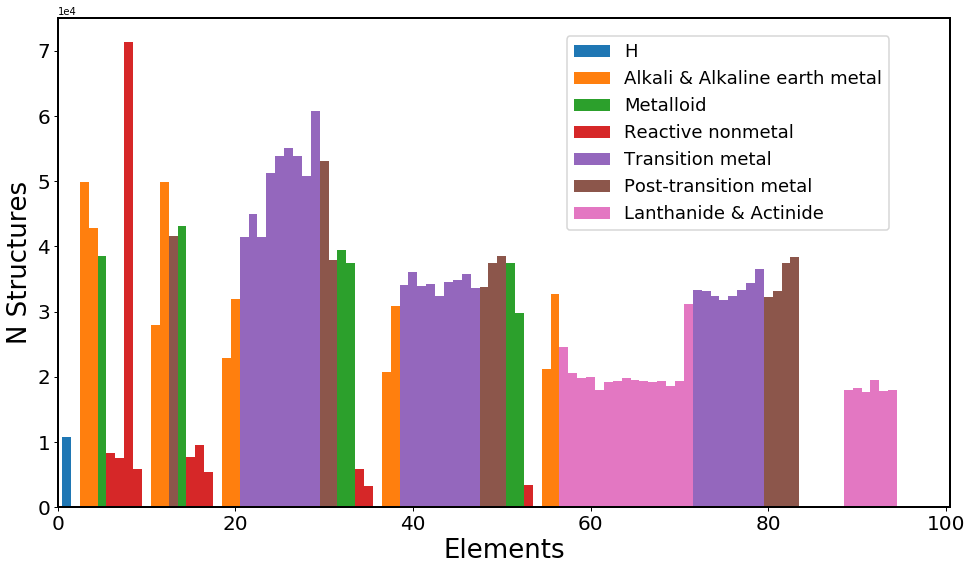

In [59]:
fig, ax1 = pp.subplots(num=None, figsize=(16,9))

# TODO make the color same as for rmts.
bins = [i for i in np.linspace(0.5, 100.5, num=101)]
#bins = [i for i in np.linspace(0.5, 11.5, num=12)] + [i for i in np.linspace(12.5, 200.5, num=21)]
#print(bins)
ax1 = histogram([all_elements_types['H'],all_elements_types['Alkali & Alkaline earth metal'],all_elements_types['Metalloid'],
                 all_elements_types['Reactive nonmetal'],all_elements_types['Transition metal'],
                all_elements_types['Post-transition metal'],all_elements_types['Lanthanide & Actinide']],#all_elements, 
                bins=bins, legend=True, cumulative=0,
                label=['H', 'Alkali & Alkaline earth metal', 'Metalloid', 'Reactive nonmetal', 
                       'Transition metal', 'Post-transition metal', 'Lanthanide & Actinide'],#, 'Nobel gas'], 

                range=[0.5,100.5],#range=[0.5,200.5],
                log=False, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                xlabel='Elements', limits=[[0, 100.5],[0,75000]], #0.3,3.1]
                ylabel=u'N Structures',
                legend_option={'bbox_to_anchor' : (0.55, 1.00), 'fontsize' : 18, 'borderaxespad' : 1 , 'loc' : 2, 'fancybox' : True} #'linewidth' : 1.5,, 'title' : 'Legend',
, density=False, saveas='All_nelements_oqmd', axis=ax1)# type=bar_stack



In [60]:
single_scatterplot(xdata=elements,ydata=nelemets_single, 
                      title='elements', 
                      ylabel='elements occurece', xlabel='element')

NameError: name 'nelemets_single' is not defined

## Plot Nsymmetries found versus Nsymmeties

In [ ]:
# plot the color of the dot should be how many cases this is

In [63]:
nsym_inp = [int(i) for i in property_dict2['nsym_inpgen']] # In the first paring there was an error, one symmetry became 3.

In [64]:
 property_dict2.keys()

[u'strucvol',
 u'nsym_inpgen',
 u'jri',
 u'struc_uuid',
 u'oqmd_label',
 u'sym_op_inpgen',
 u'sym_op',
 u'uuid',
 u'los',
 u'sym_notfound',
 u'nspecies',
 u'inpgen_symg',
 u'atomtypes_elm',
 u'natomtypes',
 u'econfig',
 u'trans_not',
 u'vasp_magmom',
 u'natomtypes_org',
 u'natoms',
 u'elements',
 u'gmaxxc',
 u'gmax',
 u'nkpt',
 u'jspins',
 u'struc_symg',
 u'rmts',
 u'struc_symsm',
 u'process_id',
 u'dx',
 u'formula',
 u'nlines_inpxml',
 u'nsym',
 u'lnonsph',
 u'vasp_delta_e',
 u'inpxml_size',
 u'lmax',
 u'kmax',
 u'pbc',
 u'runtime',
 u'oqmd_id']

In [65]:
s1 = [i for i in property_dict[u'struc_uuid']][:len(nsym_inp)]
s2 = [i for i in property_dict2[u'struc_uuid']]
calcs = [i for i in property_dict['uuid']]
nsym = [int(i) for i in property_dict['nsym']]#[:len(nsym_inp)]
nsym_inp = [int(i) for i in property_dict['nsym_inpgen']]
print(len(nsym), len(nsym_inp))

(824388, 824388)


In [ ]:
count_total = 0
counteq = 0
for i, entr in enumerate(nsym_inp):
    if entr ==3:
        if nsym[i] == 3: # not many cases we asume inpgen got it right
            #print('here')
            pass
        else: # parsing error
            nsym_inp[i] = 1
    if entr == nsym_inp[i]:
        counteq = counteq + 1
    if entr <= 48:
        count_total = count_total + 1
    #print(entr, nsym_inp[i])
pro = counteq/float(count_total)
print(pro*100, (1-pro)*100)

In [ ]:
to_large = []
to_small = []
count = 0
for i, entry in enumerate(nsym):
    if entry < nsym_inp[i]:
        print(entry, nsym_inp[i], i, nsym_inp[i-1], nsym_inp[i+1], s1[i], s2[i-1])
        to_large.append([calcs[i], entry, nsym_inp[i]])
    if entry > nsym_inp[i]*10:
        count=count + 1
        #if count < 20:
        to_small.append([calcs[i], entry, nsym_inp[i]])
        

In [ ]:
print(to_small[:3])

In [ ]:
len(to_small), len(to_large)

In [ ]:
print(to_large[:10])

In [ ]:
# Comment, parsing of one symmetry operation resulted in 3, ...

In [ ]:
x2 = [i for i in range(0,201)]

fig = pp.figure(num=None, figsize=(16,9))
ax1 = fig.add_subplot(111)
ax1 = single_scatterplot(xdata=nsym, ydata=nsym_inp, title='', xlabel='N sym ase', 
                         ylabel='N sym inpgen', axis=ax1, linestyle='', limits=[[0,200],[0,70]]) #limits=[[0,200],[0,75]])

ax1 = single_scatterplot(xdata=x2, ydata=x2, title='', xlabel='N sym ase', 
                         ylabel='N sym inpgen', axis=ax1, linestyle='-', marker='')

In [ ]:
fig

In [ ]:
# TODO plot Histrgram with procentage of the symmetries found with systems with less or equal to 48 symmetries versus number of structures

In [ ]:
x2 = [i for i in range(0,201)]

fig = pp.figure(num=None, figsize=(16,9))
ax1 = fig.add_subplot(111)
ax1 = single_scatterplot(xdata=nsym, ydata=nsym_inp, title='', xlabel='N sym ase', 
                         ylabel='N sym inpgen', axis=ax1, linestyle='', limits=[[0,25],[0,25]])

ax1 = single_scatterplot(xdata=x2, ydata=x2, title='', xlabel='N sym ase', 
                         ylabel='N sym inpgen', axis=ax1, linestyle='-', marker='')

## Matching MT Criterion plot with Nspecies 

(because maybe there is a correlation towards bad crit more species)

In [53]:
delta_para = get_nodes_from_group('delta_parameters_gustav')
res = {}           
for uuid in delta_para:
    node = load_node(uuid)
    para_dict = node.get_dict()
    for key, val in para_dict.iteritems():
        if 'atom' in key:
            element = val.get('element' , 'X')
            elemnumber = _atomic_numbers.get(element, 0)
            res[elemnumber] = (val.get('lo', ''), val.get('rmt', ''), val.get('econfig', ''), val.get('jri', ''), val.get('dx', ''))
            #print(element, elemnumber, val.get('lo', ''), val.get('econfig', ''))
for key, val in res.iteritems():
    print(key, val)

NameError: name 'get_nodes_from_group' is not defined

In [73]:
for element in elements:
    liste = elemental_dict[str(element)]['lo']
    if len(liste) >=1:
        print(element, elemental_dict[str(element)]['lo'][0])

(1, u'')
(3, u'')
(4, u'')
(5, u'')
(6, u'')
(7, u'')
(8, u'')
(9, u'')
(11, u'2s 2p')
(12, u'2s 2p')
(13, u'')
(14, u'')
(15, u'')
(16, u'')
(17, u'')
(19, u'3s 3p')
(20, u'3s 3p')
(21, u'3s 3p')
(22, u'3s 3p')
(23, u'3s 3p')
(24, u'3s 3p')
(25, u'3s 3p')
(26, u'3s 3p')
(27, u'')
(28, u'')
(29, u'')
(30, u'')
(31, u'')
(32, u'')
(33, u'')
(34, u'')
(35, u'')
(37, u'4s 4p')
(38, u'4s 4p')
(39, u'4s 4p')
(40, u'4s 4p')
(41, u'4s 4p')
(42, u'4s 4p')
(43, u'4s 4p')
(44, u'')
(45, u'')
(46, u'')
(47, u'4s 4p')
(48, u'')
(49, u'')
(50, u'')
(51, u'')
(52, u'')
(53, u'')
(55, u'5s 5p')
(56, u'5s 5p')
(57, u'')
(58, u'')
(59, u'')
(60, u'')
(61, u'')
(62, u'')
(63, u'')
(64, u'')
(65, u'')
(66, u'')
(67, u'')
(68, u'')
(69, u'')
(70, u'')
(71, u'')
(72, u'5s 5p 4f')
(73, u'5s 5p 4f')
(74, u'5s 5p')
(75, u'5s 5p')
(76, u'')
(77, u'')
(78, u'')
(79, u'')
(80, u'')
(81, u'')
(82, u'')
(83, u'')
(89, u'')
(90, u'')
(91, u'')
(92, u'')
(93, u'')
(94, u'')


In [21]:
# plot structure analysis result
y = [atom_count_dict[natom] for natom in atom_count_dict.keys()]


# plot number of atoms histogramm
fig = plt.figure(figsize=figuresize) #
#print atom_count_dict.keys()
#print x
x = atom_count_dict.keys()
p1 = plot(x , y ,'bo')
xlabel("Number of atoms")
ylabel("Number of structures")

# plot periodic table barchart (histogramm like)
# splitted into 2 charts, otherwise x labels overlap.
fig = plt.figure(figsize=figuresize) #
N = len(element_count_list)
ind = np.arange(N)    # the x locations for the groups
width = 0.65       # the width of the bars: can also be len(x) sequence

x = [e[0] for e in element_count_list]
y = [c[1] for c in element_count_list]
p2 = plt.bar(ind[:50], y[:50], width, color='r')
# TODO xticks size smaller, full axis
xticks(ind[:50] + width/2., x[:50])
xlabel("Element")
ylabel("Number of structures")
#p2.tick_params(axis='both', which='minor', labelsize=8)

fig = plt.figure(figsize=figuresize) #
p3 = plt.bar(ind[50:], y[50:], width, color='r')
#xt = get(gca, 'XTick')
#set(gca, 'FontSize', 10)
xticks(ind[50:] + width/2., x[50:])
xlabel("Element")
ylabel("Number of structures")

NameError: name 'atom_count_dict' is not defined

# Plot element_dict data

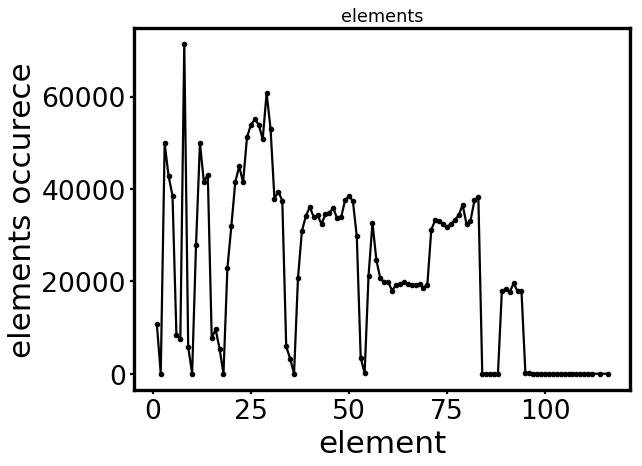

In [61]:
from masci_tools.vis.plot_methods import single_scatterplot
elements = [int(elem) for elem in elemental_dict.keys()]
elements.sort()
nelemets = []
for element in elements:
    nelemets.append(len(elemental_dict[str(element)]['jri']))
    
single_scatterplot(xdata=elements,ydata=nelemets, 
                      title='elements', 
                      ylabel='elements occurece', xlabel='element')

# Look at rmts

In [ ]:
element_type = {}
for element in elements:
    if element in [i for i in range(58,72,1)]:
        element_type[element] = 'f'
    elif element in [i for i in range(90,104,1)]:
        element_type[element] = 'f'
    elif element in [1,2]:
        element_type[element] = '1s'
    elif element in [3,4,11,12,19,20,37,38,55,56,87,88]:
        element_type[element] = 's'
    elif element in [i for i in range(5,11,1)]:
        element_type[element] = 'p'
    elif element in [i for i in range(13,19,1)]:
        element_type[element] = 'p'
    elif element in [i for i in range(31,37,1)]:
        element_type[element] = 'p'
    elif element in [i for i in range(49,55,1)]:
        element_type[element] = 'p'
    elif element in [i for i in range(81,87,1)]:
        element_type[element] = 'p'
    elif element in [i for i in range(113,119,1)]:
        element_type[element] = 'p'
    else:
        element_type[element] = 'd'
print element_type

# names of groups
#'H & He', 'Alkali & Alkaline earth metal', 'Metalloid', 'Reactive nonmetal & Nobel gas', 'Transition metal', 'Post-transition metal', 'Lanthanide & Actinide'], 
              
element_type2 = {}
for element in elements:
    if element in [i for i in range(57,72,1)]:
        element_type2[element] = 'Lanthanide & Actinide'
    elif element in [i for i in range(89,104,1)]:
        element_type2[element] = 'Lanthanide & Actinide'
    elif element in [1]:
        element_type2[element] = 'H'# & He'
    elif element in [3,4,11,12,19,20,37,38,55,56,87,88]:
        element_type2[element] = 'Alkali & Alkaline earth metal'
    elif element in [13,30,31,48,49,50,80,81,82,83,84,112]:
        element_type2[element] = 'Post-transition metal'
    elif element in [5,14,32,33,51,52,85]:
        element_type2[element] = 'Metalloid'
    elif element in [6,7,8,9,15,16,17,34,35,53]:
        element_type2[element] = 'Reactive nonmetal'
    elif element in [2,10,18,36,54,86]:
        element_type2[element] = 'Nobel gas'
    else:
        element_type2[element] = 'Transition metal'
print element_type2

In [23]:
element_type = {1: '1s', 2: '1s', 3: 's', 4: 's', 5: 'p', 6: 'p', 7: 'p', 8: 'p', 9: 'p', 10: 'p', 11: 's', 12: 's', 13: 'p', 14: 'p', 15: 'p', 16: 'p', 17: 'p', 18: 'p', 19: 's', 20: 's', 21: 'd', 22: 'd', 23: 'd', 24: 'd', 25: 'd', 26: 'd', 27: 'd', 28: 'd', 29: 'd', 30: 'd', 31: 'p', 32: 'p', 33: 'p', 34: 'p', 35: 'p', 36: 'p', 37: 's', 38: 's', 39: 'd', 40: 'd', 41: 'd', 42: 'd', 43: 'd', 44: 'd', 45: 'd', 46: 'd', 47: 'd', 48: 'd', 49: 'p', 50: 'p', 51: 'p', 52: 'p', 53: 'p', 54: 'p', 55: 's', 56: 's', 57: 'd', 58: 'f', 59: 'f', 60: 'f', 61: 'f', 62: 'f', 63: 'f', 64: 'f', 65: 'f', 66: 'f', 67: 'f', 68: 'f', 69: 'f', 70: 'f', 71: 'f', 72: 'd', 73: 'd', 74: 'd', 75: 'd', 76: 'd', 77: 'd', 78: 'd', 79: 'd', 80: 'd', 81: 'p', 82: 'p', 83: 'p', 84: 'p', 85: 'p', 86: 'p', 87: 's', 88: 's', 89: 'd', 90: 'f', 91: 'f', 92: 'f', 93: 'f', 94: 'f', 95: 'f', 96: 'f', 97: 'f', 98: 'f', 99: 'f', 100: 'f', 101: 'f', 102: 'f', 103: 'f', 104: 'd', 105: 'd', 106: 'd', 107: 'd', 108: 'd', 109: 'd', 110: 'd', 111: 'd', 112: 'd', 114: 'p', 116: 'p'}
element_type2 = {1: 'H', 2: 'Nobel gas', 3: 'Alkali & Alkaline earth metal', 4: 'Alkali & Alkaline earth metal', 5: 'Metalloid', 6: 'Reactive nonmetal', 7: 'Reactive nonmetal', 8: 'Reactive nonmetal', 9: 'Reactive nonmetal', 10: 'Nobel gas', 11: 'Alkali & Alkaline earth metal', 12: 'Alkali & Alkaline earth metal', 13: 'Post-transition metal', 14: 'Metalloid', 15: 'Reactive nonmetal', 16: 'Reactive nonmetal', 17: 'Reactive nonmetal', 18: 'Nobel gas', 19: 'Alkali & Alkaline earth metal', 20: 'Alkali & Alkaline earth metal', 21: 'Transition metal', 22: 'Transition metal', 23: 'Transition metal', 24: 'Transition metal', 25: 'Transition metal', 26: 'Transition metal', 27: 'Transition metal', 28: 'Transition metal', 29: 'Transition metal', 30: 'Post-transition metal', 31: 'Post-transition metal', 32: 'Metalloid', 33: 'Metalloid', 34: 'Reactive nonmetal', 35: 'Reactive nonmetal', 36: 'Nobel gas', 37: 'Alkali & Alkaline earth metal', 38: 'Alkali & Alkaline earth metal', 39: 'Transition metal', 40: 'Transition metal', 41: 'Transition metal', 42: 'Transition metal', 43: 'Transition metal', 44: 'Transition metal', 45: 'Transition metal', 46: 'Transition metal', 47: 'Transition metal', 48: 'Post-transition metal', 49: 'Post-transition metal', 50: 'Post-transition metal', 51: 'Metalloid', 52: 'Metalloid', 53: 'Reactive nonmetal', 54: 'Nobel gas', 55: 'Alkali & Alkaline earth metal', 56: 'Alkali & Alkaline earth metal', 57: 'Lanthanide & Actinide', 58: 'Lanthanide & Actinide', 59: 'Lanthanide & Actinide', 60: 'Lanthanide & Actinide', 61: 'Lanthanide & Actinide', 62: 'Lanthanide & Actinide', 63: 'Lanthanide & Actinide', 64: 'Lanthanide & Actinide', 65: 'Lanthanide & Actinide', 66: 'Lanthanide & Actinide', 67: 'Lanthanide & Actinide', 68: 'Lanthanide & Actinide', 69: 'Lanthanide & Actinide', 70: 'Lanthanide & Actinide', 71: 'Lanthanide & Actinide', 72: 'Transition metal', 73: 'Transition metal', 74: 'Transition metal', 75: 'Transition metal', 76: 'Transition metal', 77: 'Transition metal', 78: 'Transition metal', 79: 'Transition metal', 80: 'Post-transition metal', 81: 'Post-transition metal', 82: 'Post-transition metal', 83: 'Post-transition metal', 84: 'Post-transition metal', 85: 'Metalloid', 86: 'Nobel gas', 87: 'Alkali & Alkaline earth metal', 88: 'Alkali & Alkaline earth metal', 89: 'Lanthanide & Actinide', 90: 'Lanthanide & Actinide', 91: 'Lanthanide & Actinide', 92: 'Lanthanide & Actinide', 93: 'Lanthanide & Actinide', 94: 'Lanthanide & Actinide', 95: 'Lanthanide & Actinide', 96: 'Lanthanide & Actinide', 97: 'Lanthanide & Actinide', 98: 'Lanthanide & Actinide', 99: 'Lanthanide & Actinide', 100: 'Lanthanide & Actinide', 101: 'Lanthanide & Actinide', 102: 'Lanthanide & Actinide', 103: 'Lanthanide & Actinide', 104: 'Transition metal', 105: 'Transition metal', 106: 'Transition metal', 107: 'Transition metal', 108: 'Transition metal', 109: 'Transition metal', 110: 'Transition metal', 111: 'Transition metal', 112: 'Post-transition metal', 114: 'Transition metal', 116: 'Transition metal'}

In [ ]:
total_rmts = []
total_rmts3 = []
total_rmt_types = {}
total_combined = []
total_combined2_types = {}
total_combined_types = {}
total_rmt_types2 = {}
total_combined2_types2 = {}
total_combined_types2 = {}
for element in elements:
    total_rmts = total_rmts + elemental_dict[str(element)]['rmt']
    total_rmts3.append(elemental_dict[str(element)]['rmt'])
    total_combined = total_combined + elemental_dict[str(element)]['combined']
    
    edtype = element_type[element]
    rmt_typelist = total_rmt_types.get(edtype, [])
    rmt_typelist = rmt_typelist + elemental_dict[str(element)]['rmt']
    total_rmt_types[edtype] = rmt_typelist
    
    comp_typelist = total_combined2_types.get(edtype, [])
    comp_typelist = comp_typelist + list(np.array(elemental_dict[str(element)]['combined'])*np.array(elemental_dict[str(element)]['lmax']))
    total_combined2_types[edtype] = comp_typelist
    
    comp_typelist = total_combined_types.get(edtype, [])
    comp_typelist = comp_typelist + elemental_dict[str(element)]['combined']
    total_combined_types[edtype] = comp_typelist    
    
    # second classification
    edtype = element_type2[element]
    rmt_typelist = total_rmt_types2.get(edtype, [])
    rmt_typelist = rmt_typelist + elemental_dict[str(element)]['rmt']
    total_rmt_types2[edtype] = rmt_typelist
    
    comp_typelist = total_combined2_types2.get(edtype, [])
    comp_typelist = comp_typelist + list(np.array(elemental_dict[str(element)]['combined'])*np.array(elemental_dict[str(element)]['lmax']))
    total_combined2_types2[edtype] = comp_typelist
    
    comp_typelist = total_combined_types2.get(edtype, [])
    comp_typelist = comp_typelist + elemental_dict[str(element)]['combined']
    total_combined_types2[edtype] = comp_typelist 
    
    #print(len(elemental_dict[str(element)]['combined']), len(elemental_dict[str(element)]['lmax']), len(elemental_dict[str(element)]['rmt']))
    histogram(elemental_dict[str(element)]['rmt'], bins=100, 
                      log=False, title='{} , {} rmt'.format(PeriodicTableElements[int(element)]['symbol'], element), 
                      xlabel='Muffin tin radius [bohr]')
    if elemental_dict[str(element)]['rmt']:
        print(min(elemental_dict[str(element)]['rmt']))
        print(elemental_dict[str(element)]['lo'][0])

In [ ]:
len(total_rmts)

In [ ]:
histogram(total_rmts3, bins=130, 
                      log=False, title='all rmt', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                      xlabel='Muffin tin radius [bohr]', limits=[[0.3,2.9],[None, None]])#, density=True)# type=bar_stack

In [ ]:
histogram(total_rmt_types['1s'], bins=260, range=[0.3,2.9],
                      log=False, title='all rmt 1s', #histtype='bar',# 'bar', 'barstacked', 'step', 'stepfilled'
                      xlabel='Muffin tin radius [bohr]')#, limits=[[0.3,2.9],[0, 1]], density=True)# type=bar_stack
histogram(total_rmt_types['s'],  bins=260, range=[0.3,2.9],
                      log=False, title='all rmt s', #histtype='bar',# 'bar', 'barstacked', 'step', 'stepfilled'
                      xlabel='Muffin tin radius [bohr]')#, limits=[[0.3,2.9],[0, 1]], density=True)# type=bar_stack
histogram(total_rmt_types['p'],  bins=260, range=[0.3,2.9], 
                      log=False, title='all rmt p', #histtype='bar',# 'bar', 'barstacked', 'step', 'stepfilled'
                      xlabel='Muffin tin radius [bohr]')#, limits=[[0.3,2.9],[0, 1]], density=True)# type=bar_stack
histogram(total_rmt_types['d'],  bins=260, range=[0.3,2.9],
                      log=False, title='all rmt d', #histtype='bar',# 'bar', 'barstacked', 'step', 'stepfilled'
                      xlabel='Muffin tin radius [bohr]')#, limits=[[0.3,2.9],[0, 1]], density=True)# type=bar_stack
histogram(total_rmt_types['f'],  bins=260, range=[0.3,2.9],
                      log=False, title='all rmt f', #histtype='bar',# 'bar', 'barstacked', 'step', 'stepfilled'
                      xlabel='Muffin tin radius [bohr]')#, limits=[[0.3,2.9],[0, 1]], density=True)# type=bar_stack

In [ ]:
histogram(total_rmt_types.values(), bins=100, legend=True, label=total_rmt_types.keys(),
          log=False, title='all rmt', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
         xlabel='Muffin tin radius [bohr]', limits=[[0.3,2.9],[0, 1]], density=True)# type=bar_stack

In [ ]:
total_rmt_types2.keys()

In [ ]:
histogram(total_rmt_types2.values(), bins=160, legend=True, label=total_rmt_types2.keys(),
          log=False, title='all rmt', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
         xlabel='Muffin tin radius [bohr]', limits=[[0.3,2.9],[0, 1]], density=True)# type=bar_stack

In [ ]:
ax = histogram([total_rmt_types['1s'], total_rmt_types['s'], total_rmt_types['p'], total_rmt_types['d'], total_rmt_types['f']], 
               bins=1000, legend=True, label=['1s', 's', 'p', 'd', 'f'],
          log=False, title='all rmt', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
         xlabel='Muffin tin radius [bohr]', limits=[[0.3,2.9],[0, 3000]])#, density=True)# type=bar_stack
#ax.text(-0.01, 0.01, '', fontsize=text_size)



In [ ]:
bins = [i for i in np.linspace(0.3, 2.9, num=130)]
ax = histogram([total_rmt_types['1s'], total_rmt_types['s'], total_rmt_types['p'], total_rmt_types['d'], total_rmt_types['f']], 
               bins=bins, legend=True, 
               #label=['H & He', 'Alkali & Alkaline earth metal', 'Metalloid', 'Reactive nonmetal & Nobel gas', 'Transition metal', 'Post-transition metal', 'Lanthanide & Actinide'], 
               label=['1s', 's-block', 'p-block', 'd-block', 'f-block'], 
               range=[0.3,2.9],
          log=False, title='all rmt', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
         xlabel='Muffin tin radius [bohr]', limits=[[0.3,2.9],[0, 8000]])#, density=True)# type=bar_stack
#ax.text(-0.01, 0.01, '', fontsize=text_size)



In [ ]:
bins = [i for i in np.linspace(0.305, 2.905, num=261)]
print(bins)

In [ ]:
set_plot_defaults(use_axis_fromatter=False, labelfonstsize=26, ticklabelsize=20, tick_paramsx = {'size' : 4.0, 'width' : 1.0,'labelsize' : 20,
                                     'length' : 5}, tick_paramsy = {'size' : 4.0, 'width' : 1.0,
                                     'labelsize' : 20,
                                     'length' : 5})
fig = pp.figure(num=None, figsize=(16,8))
ax1 = fig.add_subplot(111)
bins = [i for i in np.linspace(0.305, 2.905, num=261)]
#print(bins)
ax1 = histogram([total_rmt_types2['H'], total_rmt_types2['Alkali & Alkaline earth metal'], total_rmt_types2['Metalloid'], 
                total_rmt_types2['Reactive nonmetal'], total_rmt_types2['Transition metal'], total_rmt_types2['Post-transition metal'], 
                total_rmt_types2['Lanthanide & Actinide'], total_rmt_types2['Nobel gas']], 
                bins=bins, legend=True, 
                label=['H', 'Alkali & Alkaline earth metal', 'Metalloid', 'Reactive nonmetal', 'Transition metal', 'Post-transition metal', 'Lanthanide & Actinide'],#, 'Nobel gas'], 
                #label=['1s', 's-block', 'p-block', 'd-block', 'f-block'], 
                range=[0.305,2.905],
                log=False, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                xlabel='Muffin tin radius [bohr]', limits=[[0.305, 3.1],[0, 36000]], #0.3,3.1]
                ylabel=u'N',
                legend_option={'bbox_to_anchor' : (0.05, 0.97), 'fontsize' :22, 'borderaxespad' : 1 , 'loc' : 2, 'fancybox' : True} #'linewidth' : 1.5,, 'title' : 'Legend',
, density=False, saveas='All_rmts_types_oqmd', axis=ax1)# type=bar_stack

text_size = 18
ax1.text(0.6, 10000, u"N$_{tot}$ = " + str(len(total_rmts)), fontsize=24)
ax1.text(2.3, 37000, u"2.08$\cdot10^5$", fontsize=text_size)#"208000", fontsize=text_size)
ax1.text(2.555, 37000, u"1.00$\cdot10^5$", fontsize=text_size)#"100000", fontsize=text_size)
ax1.text(2.8, 37000, r"7.56$\cdot 10^5$", fontsize=text_size)#"756000", fontsize=text_size)

#ax1.arrow(2.45, 32000, 0, 3000, width=0.006, overhang=1.0, facecolor='k')#,head_width=head_width, head_length=head_length)
#ax1.arrow(2.59, 33500, 0, 1000, width=0.006, head_length=8,head_width=0.01, facecolor='k')
#ax1.arrow(2.83, 33500, 0, 1000, width=0.006, head_length=8,head_width=0.01, facecolor='k')
ax1.annotate("", xy=(2.45, 36000), xytext=(2.45, 33500),
             arrowprops=dict(width=2, headlength=8, headwidth=6, facecolor='k'))
ax1.annotate("", xy=(2.59, 36000), xytext=(2.59, 33500),
             arrowprops=dict(width=2, headlength=8, headwidth=6, facecolor='k'))
ax1.annotate("", xy=(2.83, 36000), xytext=(2.83, 33500),
             arrowprops=dict(width=2, headlength=8, headwidth=6, facecolor='k'))#arrowstyle="->"), fontsize=16)

#bbox_props = dict(boxstyle="rarrow", fc=(0.8, 0.9, 0.9), ec="b", lw=2)
#t = ax.text(0, 3.0, "$10^{8}$", ha="center", va="center", rotation=90,
#            size=15,
#            bbox=bbox_props)
#ax.show()
#ax.set_xlim(0.3,3.1)
#ax.set_ylim(0,10000)
#ax1.annotate("Be 2.8", xy=(0.5, 0.5))
#pp.show()

In [ ]:
fig

In [ ]:
bins

In [ ]:
fig.savefig('OQMD_total_rmt_distrobution_histo5.pdf', transparent=True, format='pdf')

In [ ]:
fig.savefig?

In [ ]:
ax1.annotate?

In [ ]:
fig = pp.figure(num=None, figsize=(16,9))
ax1 = fig.add_subplot(111)
bins = [i for i in np.linspace(0.305, 2.905, num=261)]
#print(bins)
ax1, n, bins2, patches = histogram([total_rmts], 
                bins=bins, legend=True, 
                label=['H', 'Alkali & Alkaline earth metal', 'Metalloid', 'Reactive nonmetal', 'Transition metal', 'Post-transition metal', 'Lanthanide & Actinide'],#, 'Nobel gas'], 
                #label=['1s', 's-block', 'p-block', 'd-block', 'f-block'], 
                range=[0.305,2.905],
                log=False, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                xlabel='Muffin tin radius [bohr]', limits=[[0.305,2.905],[None, None]], #0.3,3.1]
                legend_option={'bbox_to_anchor' : (0.05, 0.97), 'fontsize' : 12, 'borderaxespad' : 1 , 'loc' : 2, 'fancybox' : True} #'linewidth' : 1.5,, 'title' : 'Legend',
, density=False, saveas='All_rmts_types_oqmd', axis=ax1, return_hist_output=True,)# type=bar_stack

In [ ]:
n

In [ ]:
def second_largest(numbers):
    count = 0
    m1 = m2 = float('-inf')
    for x in numbers:
        count += 1
        if x > m2:
            if x >= m1:
                m1, m2 = x, m1            
            else:
                m2 = x
    return m2 if count >= 2 else None

In [ ]:
bins = [i for i in np.linspace(0.3, 2.9, num=200)]
ax = histogram([total_rmt_types['1s'], total_rmt_types['s'], total_rmt_types['p'], total_rmt_types['d'], total_rmt_types['f']], 
               bins=bins, legend=True, label=['1s', 's', 'p', 'd', 'f'], range=[0.3,2.9],
          log=False, title='all rmt', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
         xlabel='Muffin tin radius [bohr]', limits=[[0.3,2.9],[0, 8000]])#, density=True)# type=bar_stack
#ax.text(-0.01, 0.01, '', fontsize=text_size)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

plt.close('all')

# Just a figure and one subplot
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

In [ ]:
ax = histogram([total_rmt_types['1s'], total_rmt_types['s'], total_rmt_types['p'], total_rmt_types['d'], total_rmt_types['f']], bins=100, legend=True, label=['1s', 's', 'p', 'd', 'f'],
          log=True, title='all rmt', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
         xlabel='Muffin tin radius [bohr]')#, limits=[[0.3,2.9],[0, 8000]])#, density=True)# type=bar_stack
#ax.text(-0.01, 0.01, '', fontsize=text_size)

In [ ]:
len(total_rmts3)

In [ ]:
df = pd.DataFrame(data=total_rmts3)

In [ ]:
df.head()

In [ ]:
df2 = df.transpose()

In [ ]:
mean = df2.mean()
sigma = df2.std()



In [ ]:
# last elements are missing
mean2 = mean.append(pd.Series({114: 0, 115: 0, 116:0, 117:0}))
sigma2 = sigma.append(pd.Series({114: 0, 115: 0, 116:0, 117:0}))
total_rmts3 = total_rmts3 + [[]]#,[],[],[]]

In [ ]:
len(total_rmts3), len(mean2), len(sigma2)

In [ ]:
# wiki data from https://en.wikipedia.org/wiki/Atomic_radii_of_the_elements_(data_page) and
# source https://aip.scitation.org/doi/pdf/10.1063/1.1725697?class=pdf
wiki_raidi_data = '''1	H	hydrogen	25	53	120	38	no data	
2	He	helium	120	31	140	32	no data	
3	Li	lithium	145	167	182	134	no data	152
4	Be	beryllium	105	112	153 a	90	85	112
5	B	boron	85	87	192 a	82	73	
6	C	carbon	70	67	170	77	60	
7	N	nitrogen	65	56	155	75	54	
8	O	oxygen	60	48	152	73	53	
9	F	fluorine	50	42	147	71	53	
10	Ne	neon	160	38	154	69	no data	
11	Na	sodium	180	190	227	154	no data	186
12	Mg	magnesium	150	145	173	130	127	160
13	Al	aluminium	125	118	184 a	118	111	143
14	Si	silicon	110	111	210	111	102	
15	P	phosphorus	100	98	180	106	94	
16	S	sulfur	100	88	180	102	95	
17	Cl	chlorine	100	79	175	99	93	
18	Ar	argon	71	71	188	97	96	
19	K	potassium	220	243	275	196	no data	227
20	Ca	calcium	180	194	231 a	174	133	197
21	Sc	scandium	160	184	211 a	144	114	162 b
22	Ti	titanium	140	176	no data	136	108	147
23	V	vanadium	135	171	no data	125	106	134 b
24	Cr	chromium	140	166	no data	127	103	128 b
25	Mn	manganese	140	161	no data	139	103	127 b
26	Fe	iron	140	156	no data	125	102	126 b
27	Co	cobalt	135	152	no data	126	96	125 b
28	Ni	nickel	135	149	163	121	101	124 b
29	Cu	copper	135	145	140	138	120	128 b
30	Zn	zinc	135	142	139	131	no data	134 b
31	Ga	gallium	130	136	187	126	121	135 c
32	Ge	germanium	125	125	211 a	122	114	
33	As	arsenic	115	114	185	119	106	
34	Se	selenium	115	103	190	116	107	
35	Br	bromine	115	94	185	114	110	
36	Kr	krypton	no data	88	202	110	108	
37	Rb	rubidium	235	265	303 a	211	no data	248
38	Sr	strontium	200	219	249 a	192	139	215
39	Y	yttrium	180	212	no data	162	124	180 b
40	Zr	zirconium	155	206	no data	148	121	160
41	Nb	niobium	145	198	no data	137	116	146 b
42	Mo	molybdenum	145	190	no data	145	113	139 b
43	Tc	technetium	135	183	no data	156	110	136 b
44	Ru	ruthenium	130	178	no data	126	103	134 b
45	Rh	rhodium	135	173	no data	135	106	134 b
46	Pd	palladium	140	169	163	131	112	137 b
47	Ag	silver	160	165	172	153	137	144 b
48	Cd	cadmium	155	161	158	148	no data	151 b
49	In	indium	155	156	193	144	146	167
50	Sn	tin	145	145	217	141	132	
51	Sb	antimony	145	133	206 a	138	127	
52	Te	tellurium	140	123	206	135	121	
53	I	iodine	140	115	198	133	125	
54	Xe	xenon	no data	108	216	130	122	
55	Cs	caesium	260	298	343 a	225	no data	265
56	Ba	barium	215	253	268 a	198	149	222
57	La	lanthanum	195	195	no data	169	139	187 b
58	Ce	cerium	185	158	no data	no data	131	181.8 c
59	Pr	praseodymium	185	247	no data	no data	128	182.4 c
60	Nd	neodymium	185	206	no data	no data	no data	181.4 c
61	Pm	promethium	185	205	no data	no data	no data	183.4 c
62	Sm	samarium	185	238	no data	no data	no data	180.4 c
63	Eu	europium	185	231	no data	no data	no data	180.4 c
64	Gd	gadolinium	180	233	no data	no data	132	180.4 c
65	Tb	terbium	175	225	no data	no data	no data	177.3 c
66	Dy	dysprosium	175	228	no data	no data	no data	178.1 c
67	Ho	holmium	175	226	no data	no data	no data	176.2 c
68	Er	erbium	175	226	no data	no data	no data	176.1 c
69	Tm	thulium	175	222	no data	no data	no data	175.9 c
70	Yb	ytterbium	175	222	no data	no data	no data	176 c
71	Lu	lutetium	175	217	no data	160	131	173.8 c
72	Hf	hafnium	155	208	no data	150	122	159
73	Ta	tantalum	145	200	no data	138	119	146 b
74	W	tungsten	135	193	no data	146	115	139 b
75	Re	rhenium	135	188	no data	159	110	137 b
76	Os	osmium	130	185	no data	128	109	135 b
77	Ir	iridium	135	180	no data	137	107	135.5 b
78	Pt	platinum	135	177	175	128	110	138.5 b
79	Au	gold	135	174	166	144	123	144 b
80	Hg	mercury	150	171	155	149	no data	151 b
81	Tl	thallium	190	156	196	148	150	170
82	Pb	lead	180	154	202	147	137	
83	Bi	bismuth	160	143	207 a	146	135	
84	Po	polonium	190	135	197 a	no data	129	
85	At	astatine	no data	127	202 a	no data	138	
86	Rn	radon	no data	120	220 a	145	133	
87	Fr	francium	no data	no data	348 a	no data	no data	no data
88	Ra	radium	215	no data	283 a	no data	159	no data
89	Ac	actinium	195	no data	no data	no data	140	
90	Th	thorium	180	no data	no data	no data	136	179 b
91	Pa	protactinium	180	no data	no data	no data	129	163 d
92	U	uranium	175	no data	186	no data	118	156 e
93	Np	neptunium	175	no data	no data	no data	116	155 e
94	Pu	plutonium	175	no data	no data	no data	no data	159 e
95	Am	americium	175	no data	no data	no data	no data	173 b
96	Cm	curium	no data	no data	no data	no data	no data	174 b
97	Bk	berkelium	no data	no data	no data	no data	no data	170 b
98	Cf	californium	no data	no data	no data	no data	no data	186+/- 2 b
99	Es	einsteinium	no data	no data	no data	no data	no data	186+/- 2 b
100	Fm	fermium	no data	no data	no data	no data	no data	no data
101	Md	mendelevium	no data	no data	no data	no data	no data	no data
102	No	nobelium	no data	no data	no data	no data	no data	no data
103	Lr	lawrencium	no data	no data	no data	no data	no data	no data
104	Rf	rutherfordium	no data	no data	no data	no data	131	no data
105	Db	dubnium	no data	no data	no data	no data	126	no data
106	Sg	seaborgium	no data	no data	no data	no data	121	no data
107	Bh	bohrium	no data	no data	no data	no data	119	no data
108	Hs	hassium	no data	no data	no data	no data	118	no data
109	Mt	meitnerium	no data	no data	no data	no data	113	no data
110	Ds	darmstadtium	no data	no data	no data	no data	112	no data
111	Rg	roentgenium	no data	no data	no data	no data	118	no data
112	Cn	copernicium	no data	no data	no data	no data	130	no data
113	Nh	nihonium	no data	no data	no data	no data	no data	no data
114	Fl	flerovium	no data	no data	no data	no data	no data	no data
115	Mc	moscovium	no data	no data	no data	no data	no data	no data
116	Lv	livermorium	no data	no data	no data	no data	no data	no data
117	Ts	tennessine	no data	no data	no data	no data	no data	no data
118	Og	oganesson	no data	no data	no data	no data	no data	no data'''.split('\n')

In [ ]:
# print table for latex element, nelement, mean rmt +-(signma), experiental radii
wiki_raidi_data_new = []
for i, data in enumerate(wiki_raidi_data):
    picom_to_bohr = 52.917721 #5.2917721067(12)×10−11 m
    datat = data.split()
    wiki_raidi_data_new.append(datat[:4])
    occurance = len(total_rmts3[i])
    if datat[3] == 'no':
        number = 'no data'
    else:
        number = '{0:.2f}'.format(float(datat[3])/picom_to_bohr)
    print(datat[0] + ' & ' + datat[1] +' & ' + str(occurance) +  ' & ' + '{0:.2f}'.format(mean[i]) + ' ({0:.2f})'.format(sigma[i]) + ' & ' + number + ' \\\\[-3pt]')
print(wiki_raidi_data_new)

In [ ]:
# write mean, std and number of structures into panda frame and dump it to file fore later plotting

In [ ]:
from bokeh.sampledata.periodic_table import elements

df_elm = elements.copy()



In [ ]:
occ = [len(i) for i in total_rmts3]

In [ ]:
df_elm['rmt_mean'] = mean2
df_elm['rmt_std'] = sigma2
df_elm['number_of_occ'] = occ

In [ ]:
df_elm.head()

In [87]:
df_elm.to_json('elemental_dict_rmt_stats_inpgenruns_oqmd.json')

In [88]:
df_elm.to_csv('elemental_dict_rmt_stats_inpgenruns_oqmd.csv')

In [ ]:
!ls

In [ ]:
# end

In [ ]:
default_histogram(total_rmts, bins=100, 
                      log=False, title='all rmt', 
                      xlabel='Muffin tin radius [bohr]')
print(min(total_rmts))
print(len(total_rmts))

In [ ]:
write_results_to_file?

In [ ]:
total_rmts = np.array([total_rmts, total_combined])

In [18]:
headstring = '#all rmt from fleur input data files of OQMD\n #rmt | combined \n'
destination = '/Users/broeder/work/data_phd/inpgen_on_oqmd/all_rmts.txt'
write_results_to_file(headstring, total_rmts, destination=destination)

In [ ]:
elemental_dict['24'].keys()

In [ ]:
 #589775

total_rmts2 = []
for rmt in total_rmts:
    if rmt <2.8:
        total_rmts2.append(rmt)

In [ ]:
default_histogram(total_rmts2, bins=100, 
                      log=False, title='all rmt', 
                      xlabel='Muffin tin radius [bohr]')
print(min(total_rmts2))
print(len(total_rmts2))

# Look at lmax

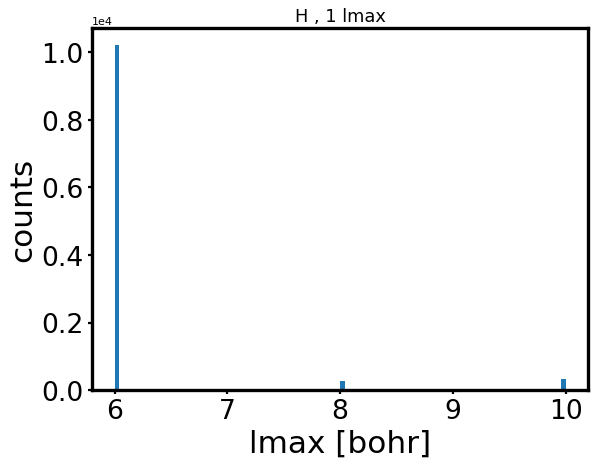

6


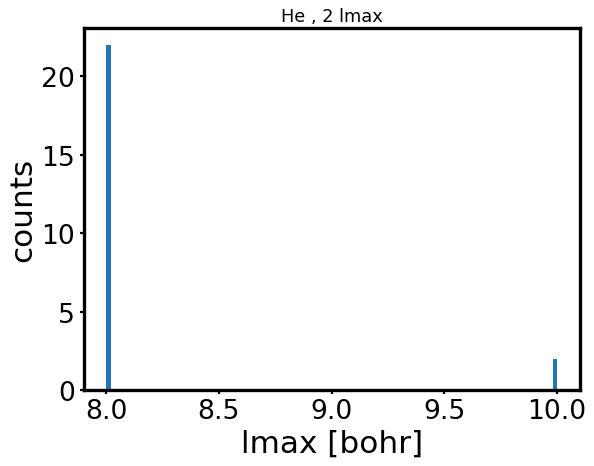

8


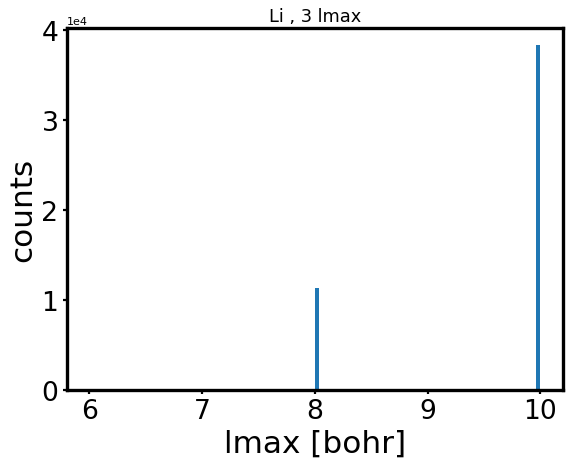

6


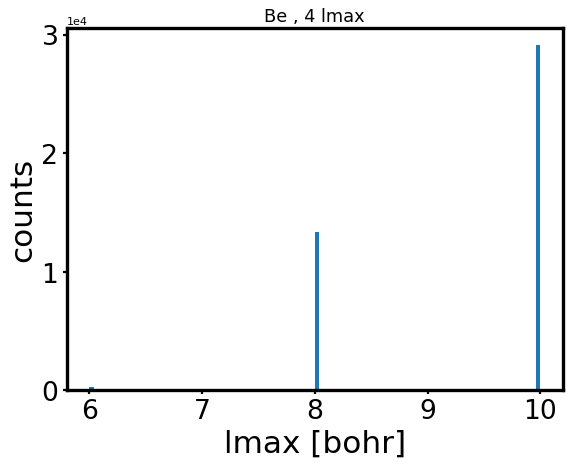

6


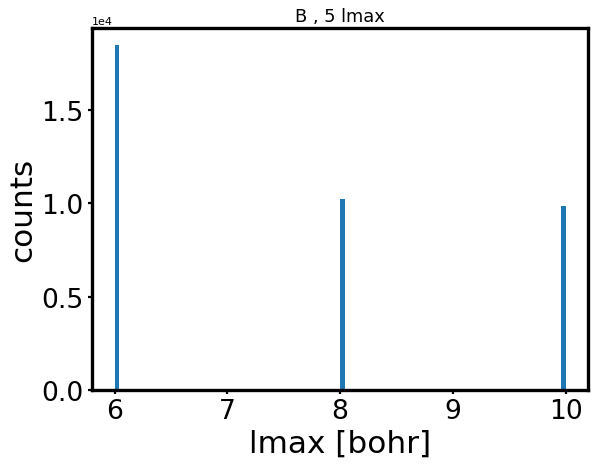

6


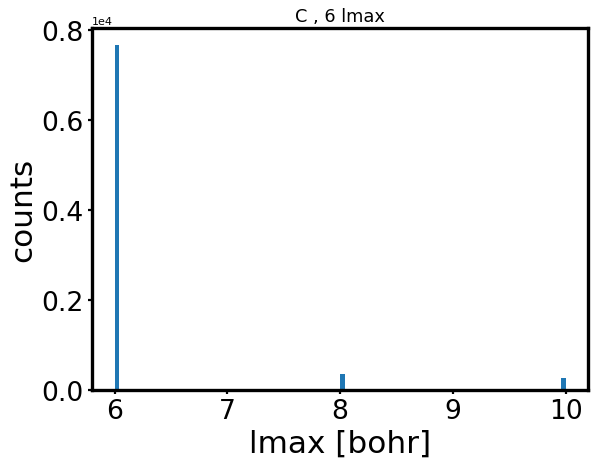

6


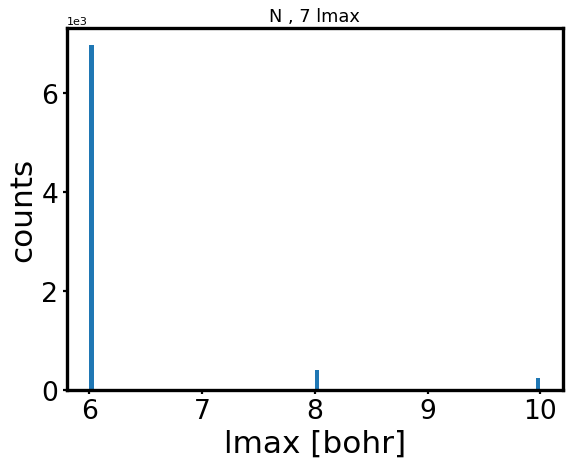

6


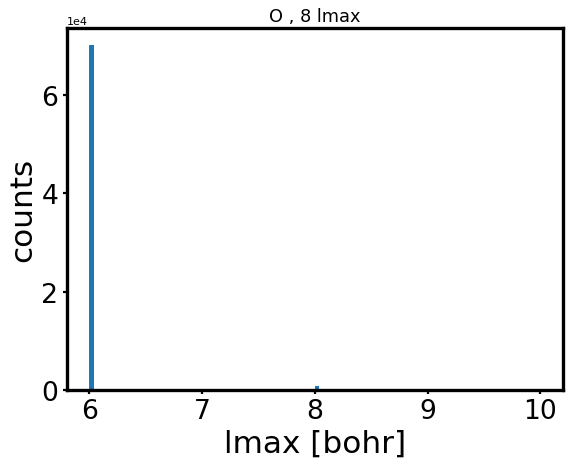

6


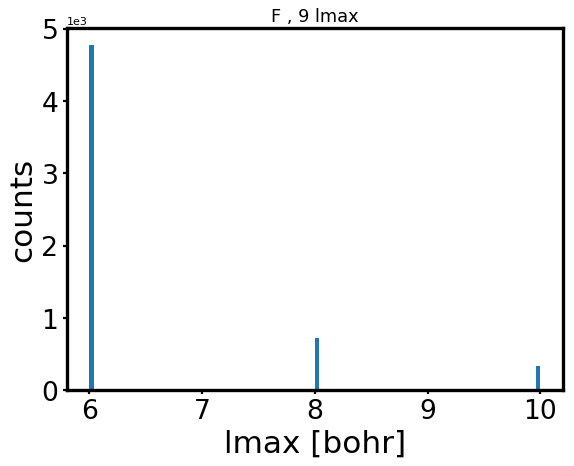

6


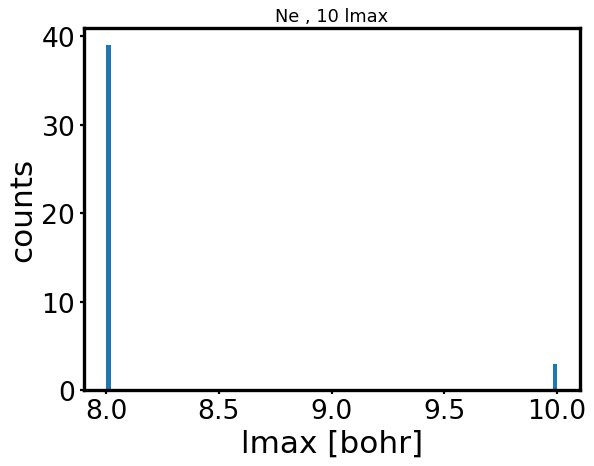

8


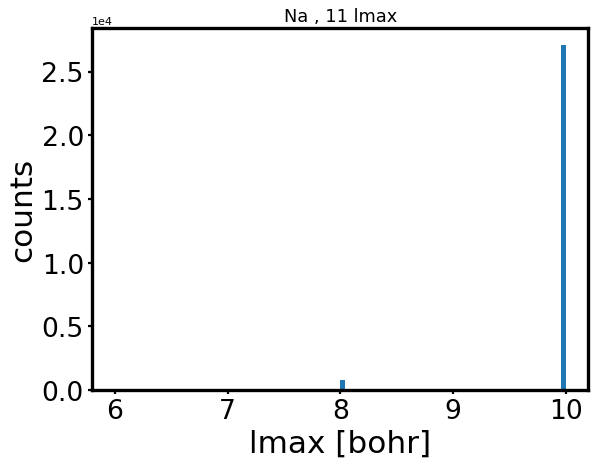

6


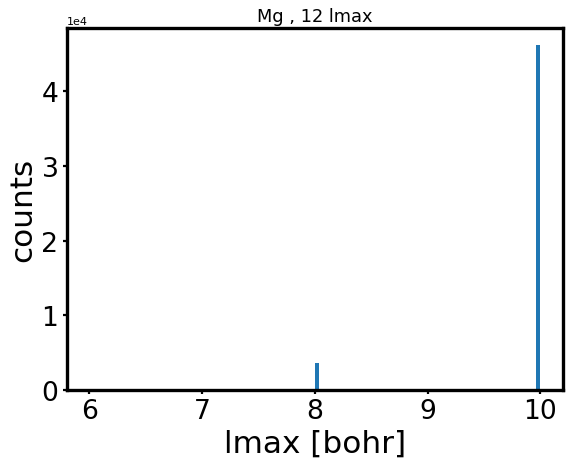

6


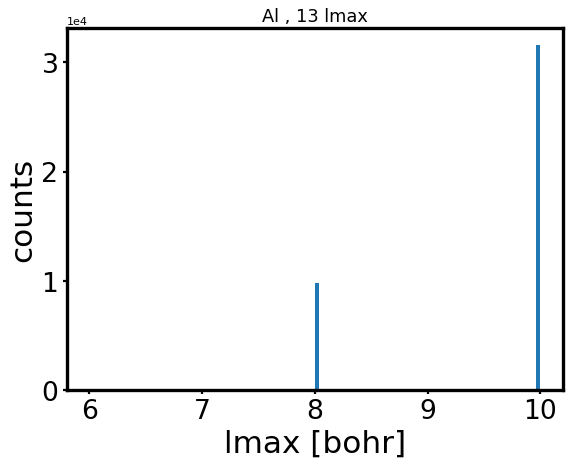

6


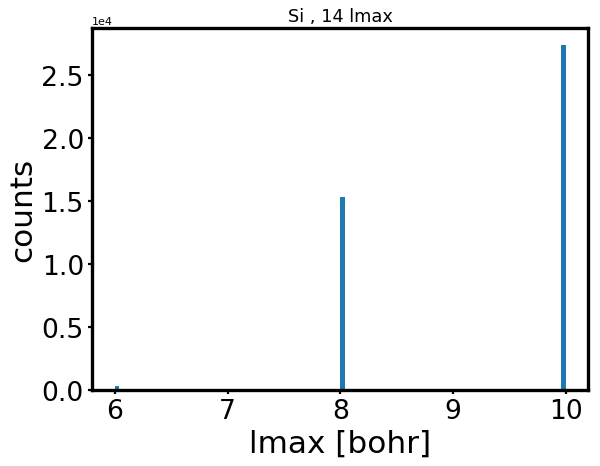

6


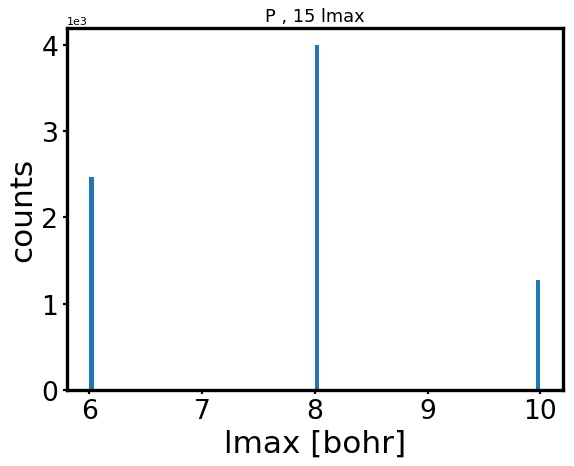

6


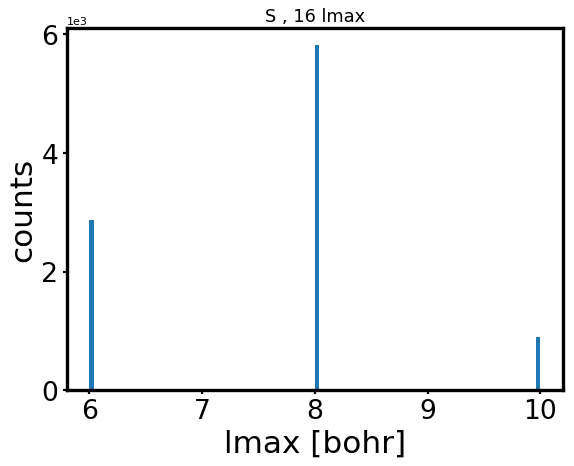

6


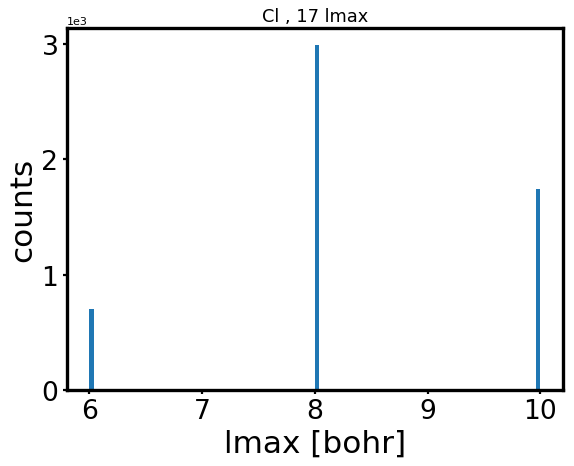

6


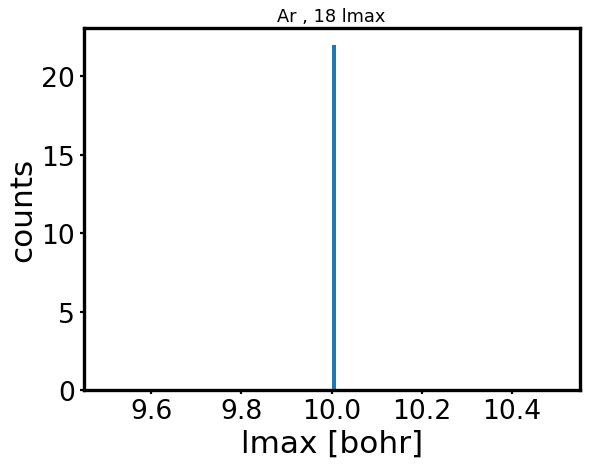

10


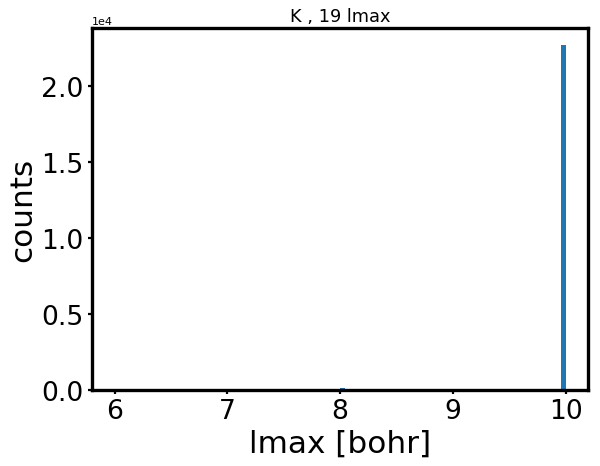

6


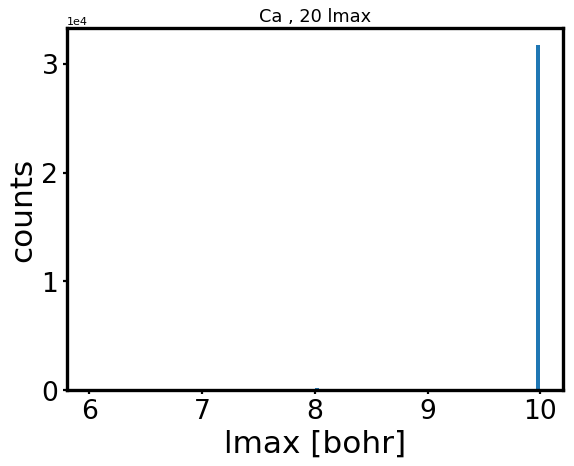

6


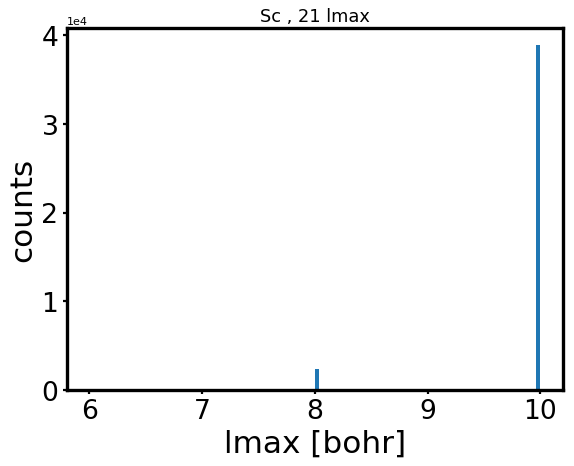

6


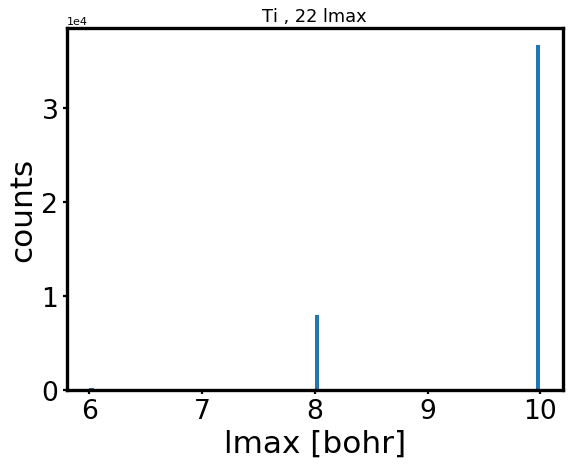

6


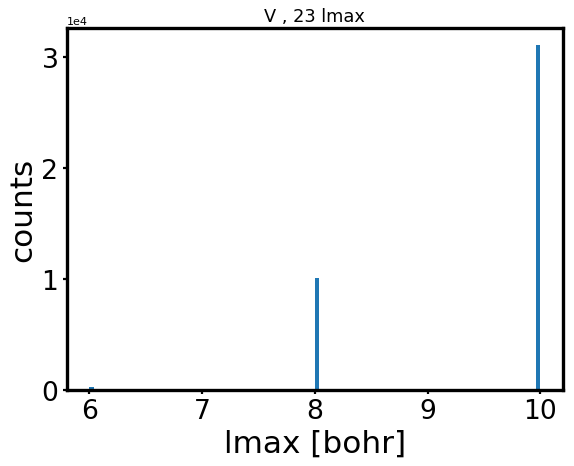

6


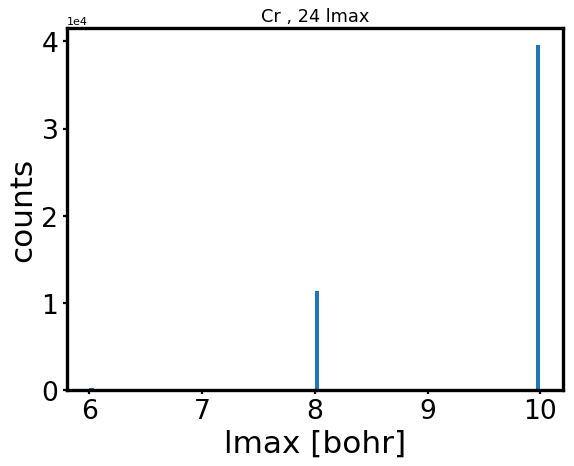

6


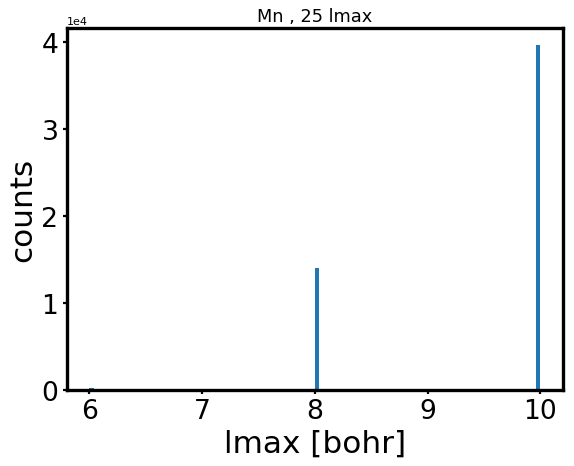

6


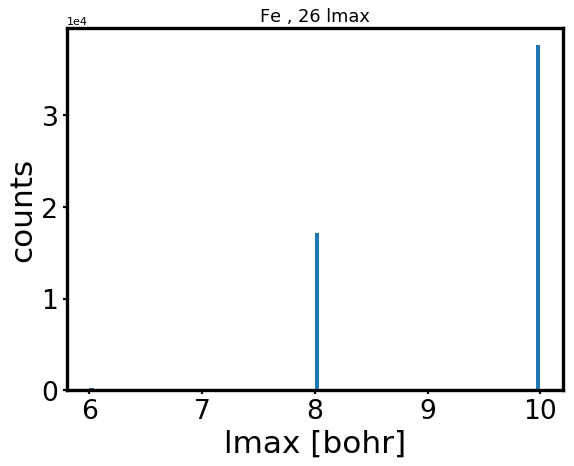

6


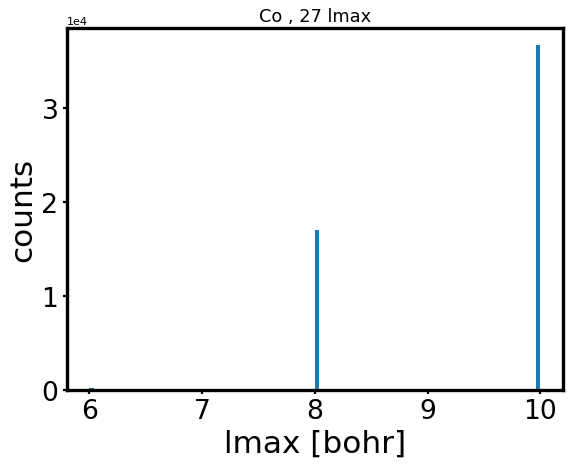

6


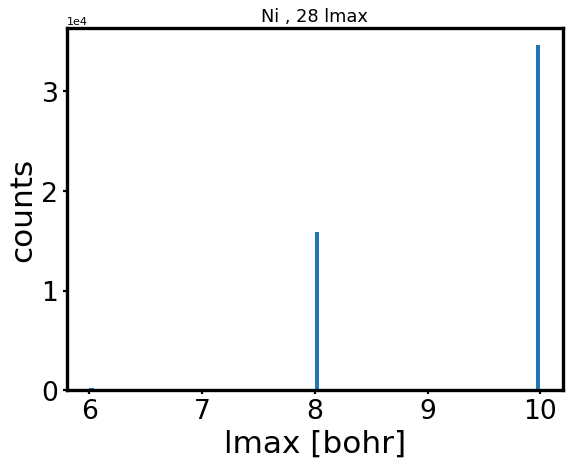

6


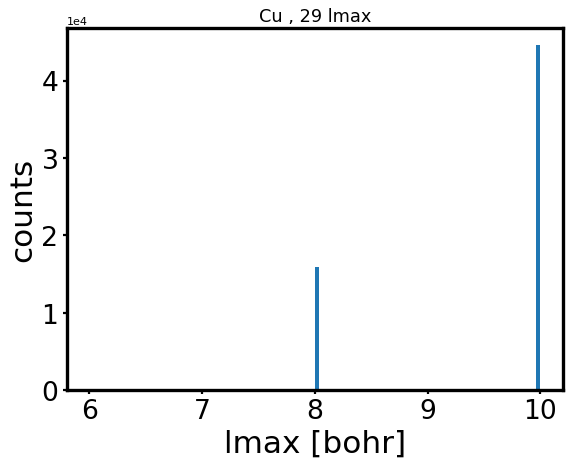

6


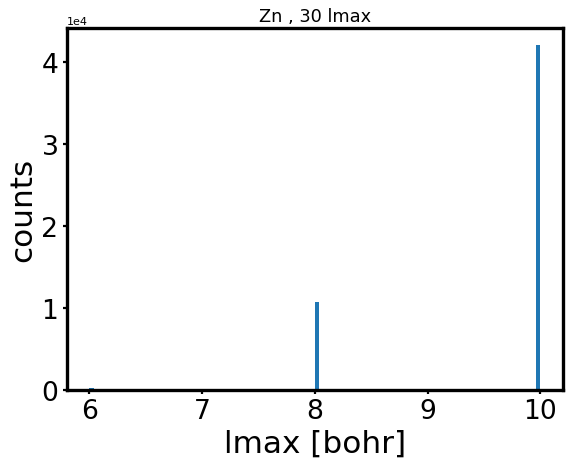

6


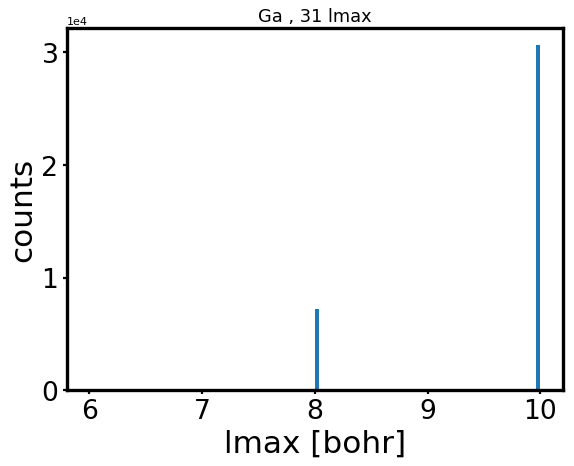

6


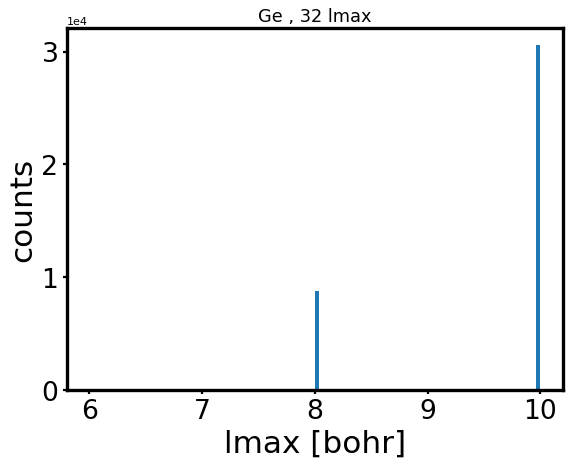

6


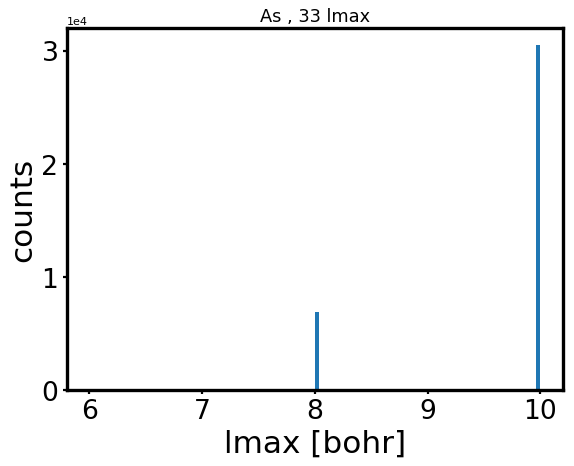

6


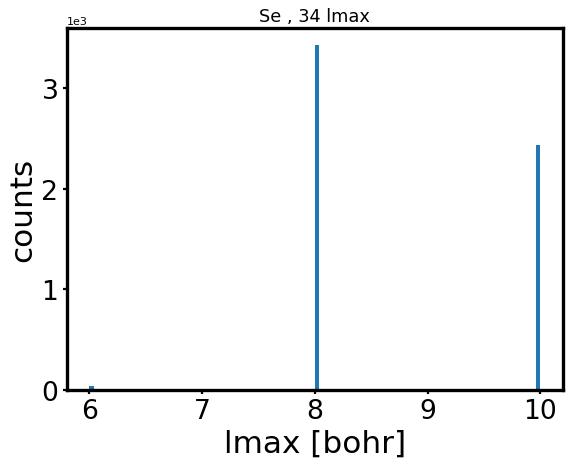

6


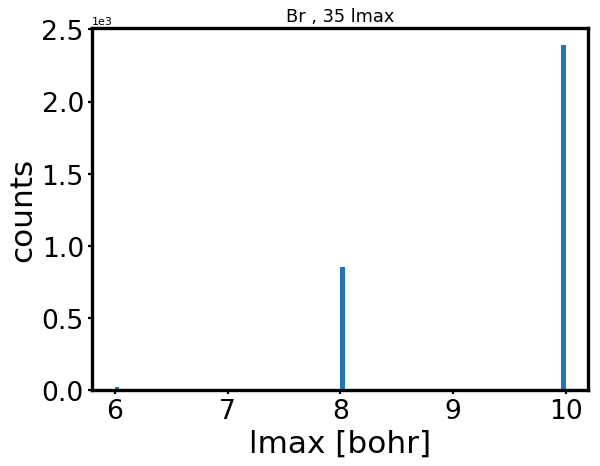

6


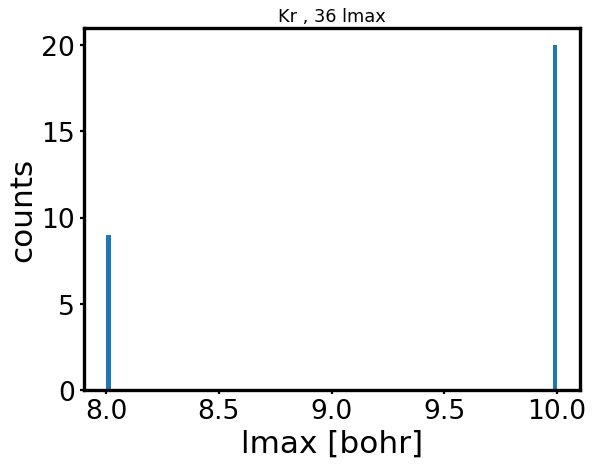

8


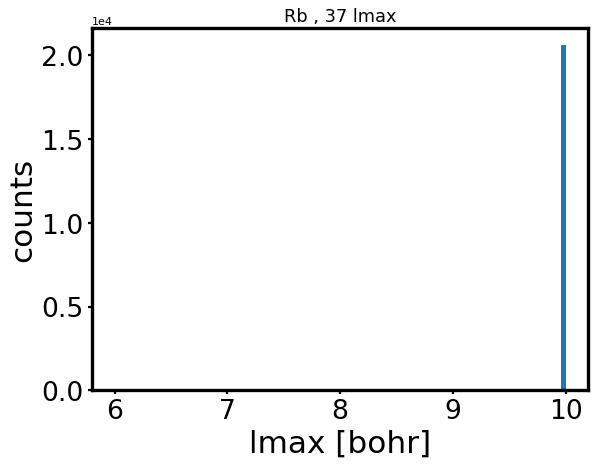

6


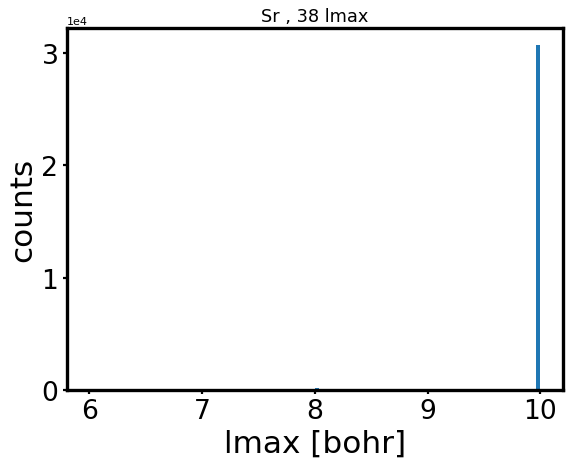

6


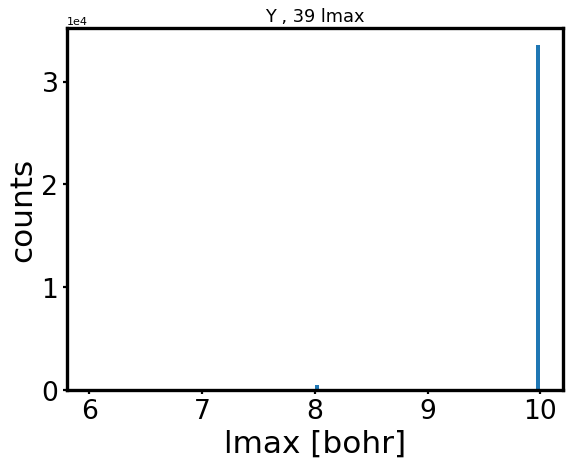

6


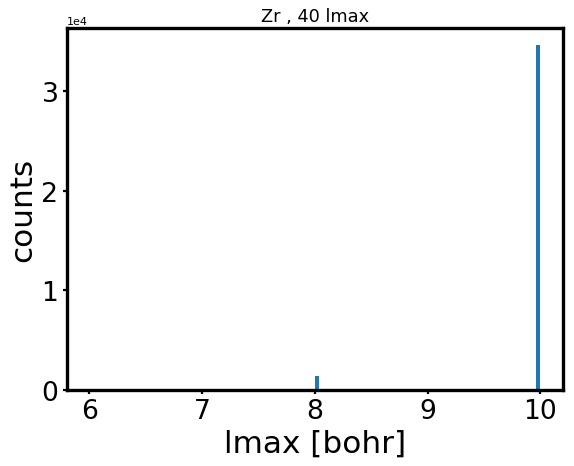

6


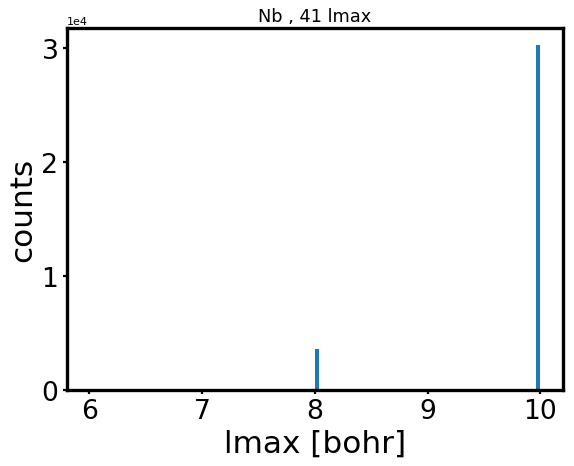

6


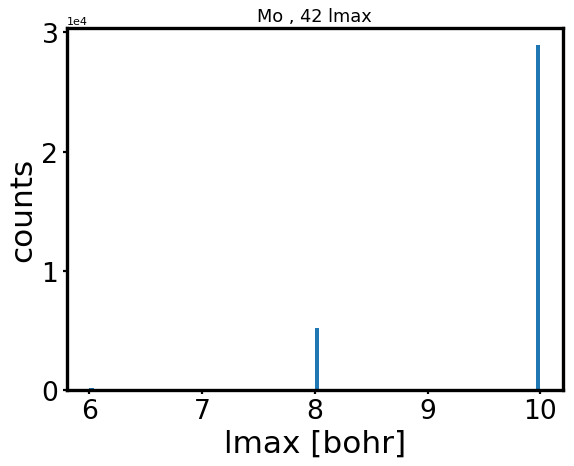

6


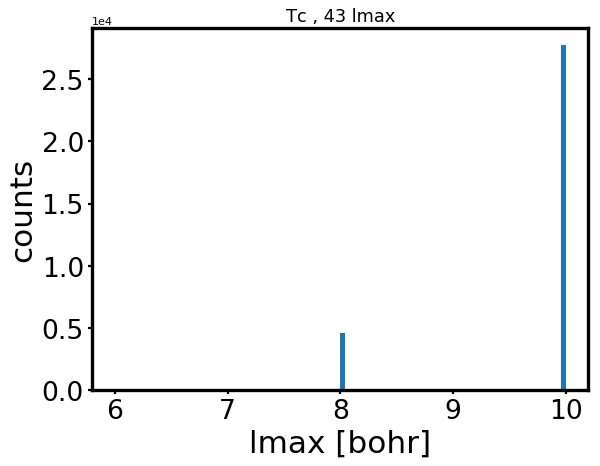

6


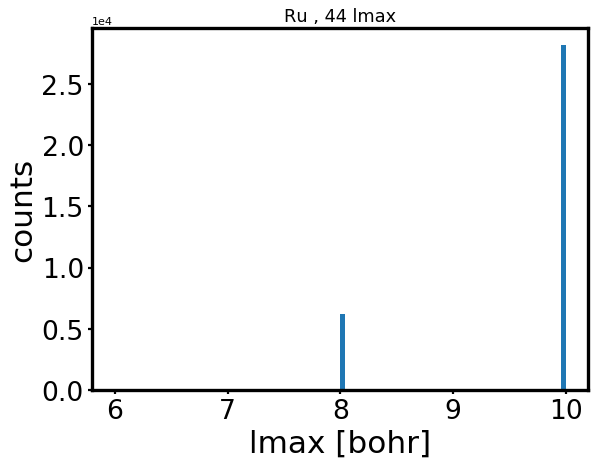

6


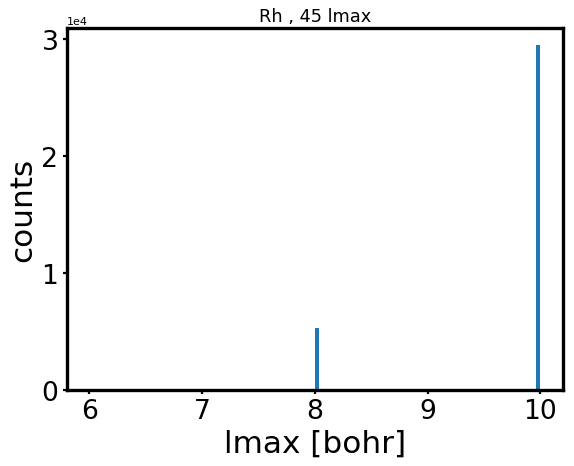

6


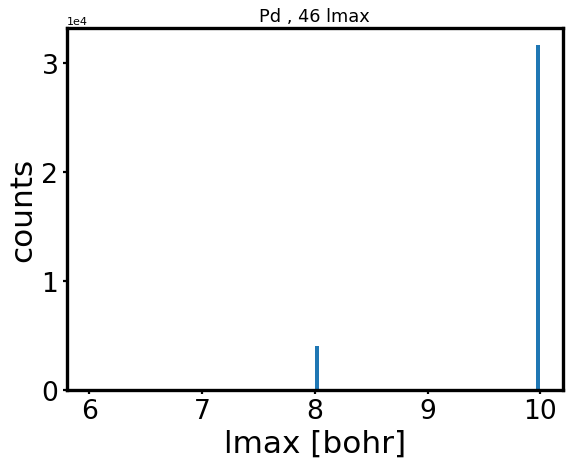

6


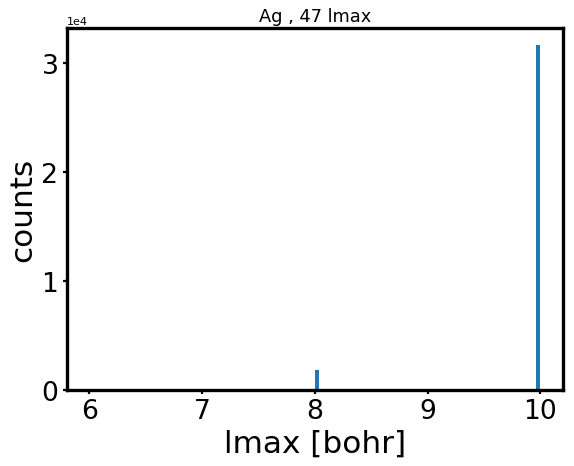

6


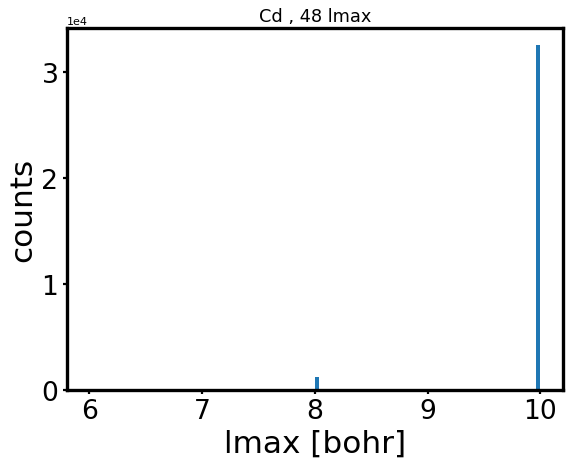

6


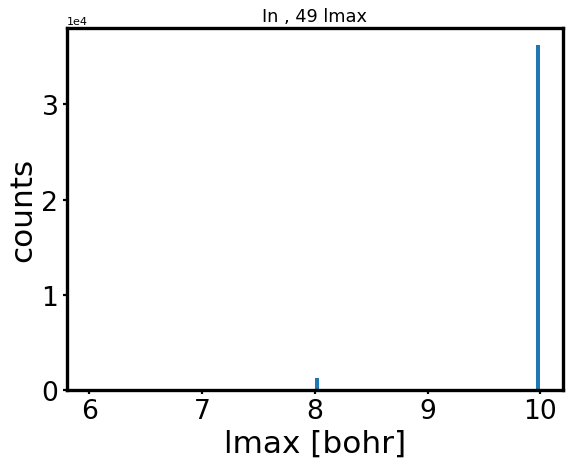

6


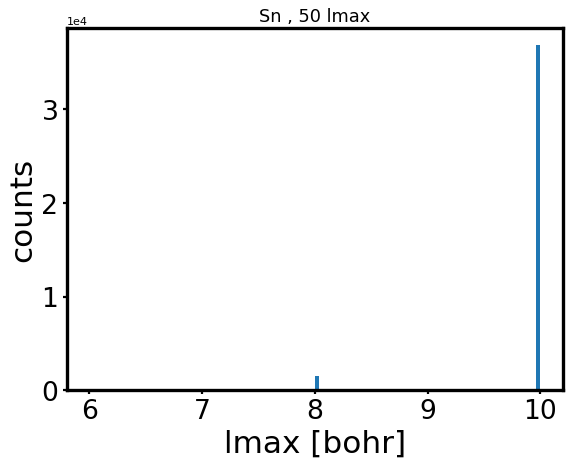

6


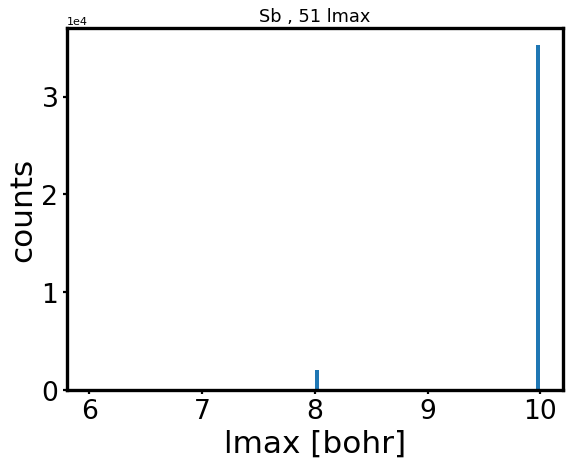

6


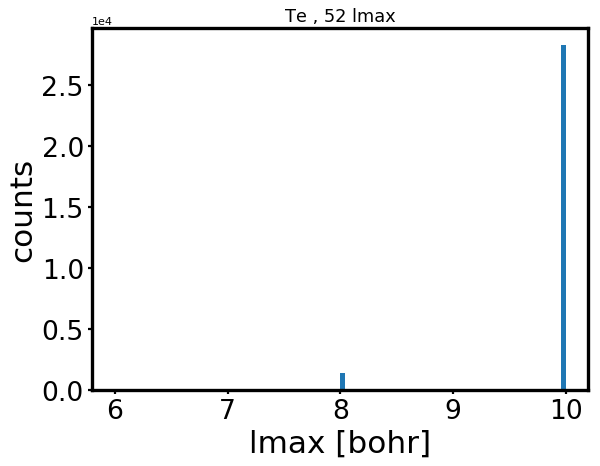

6


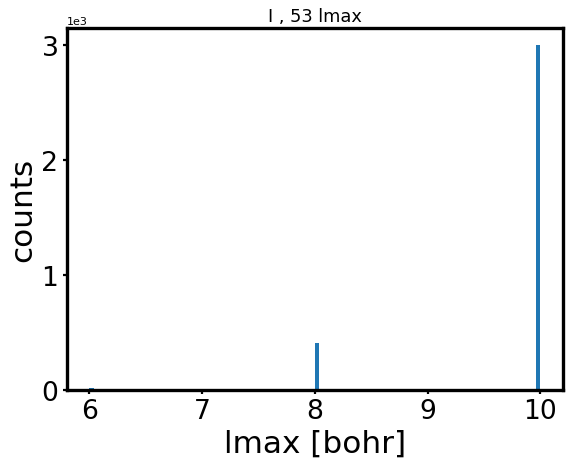

6


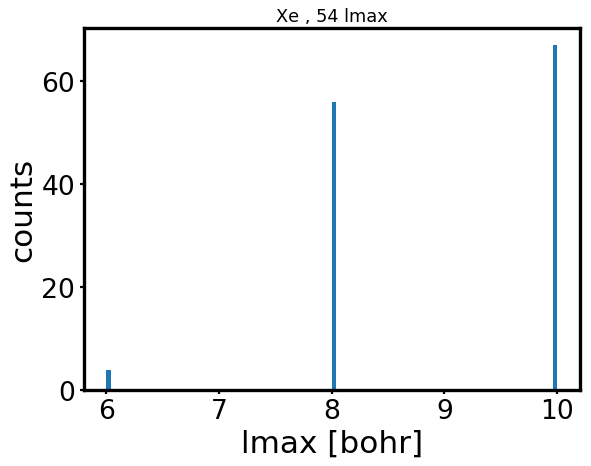

6


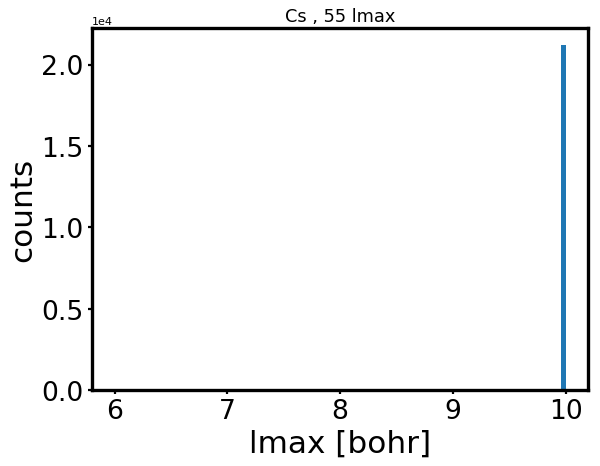

6


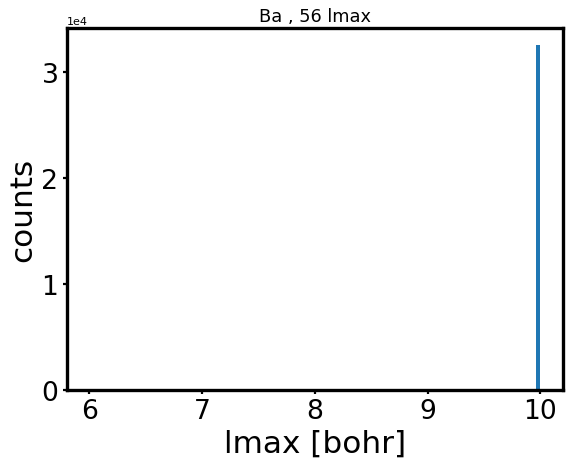

6


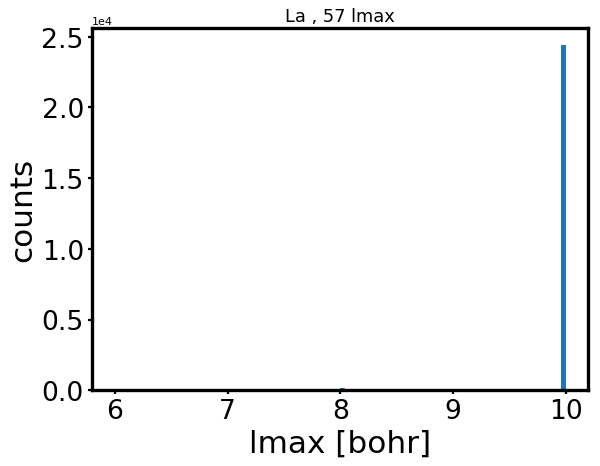

6


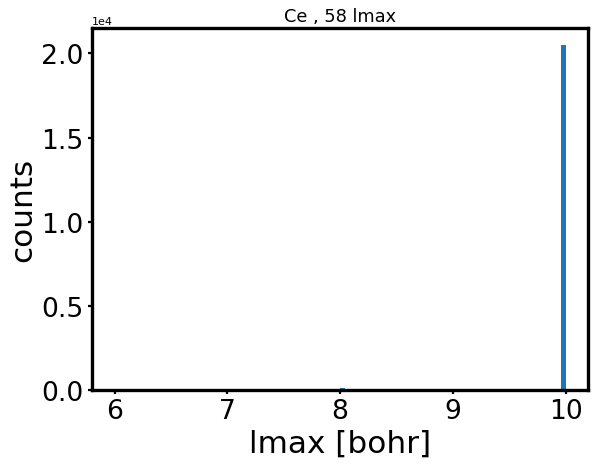

6


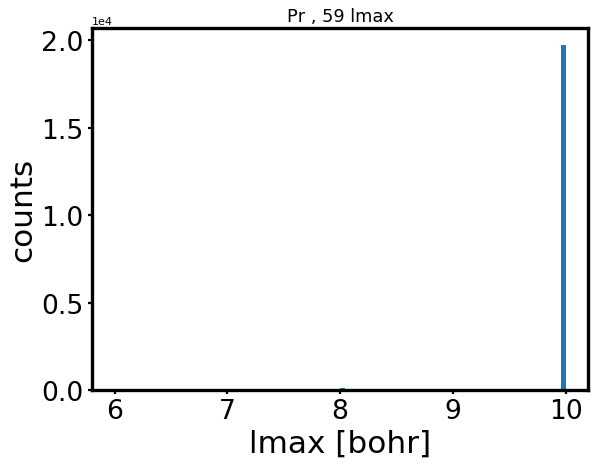

6


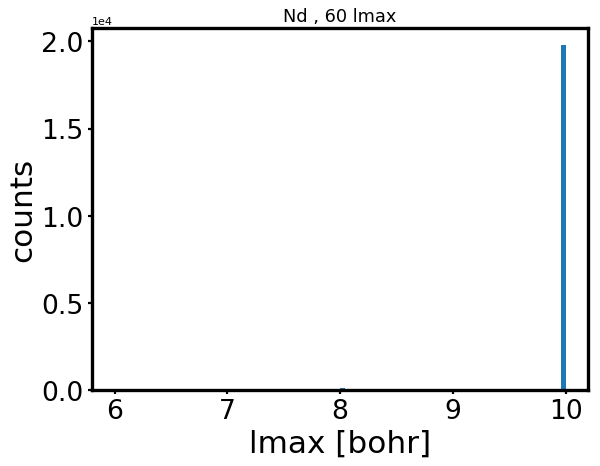

6


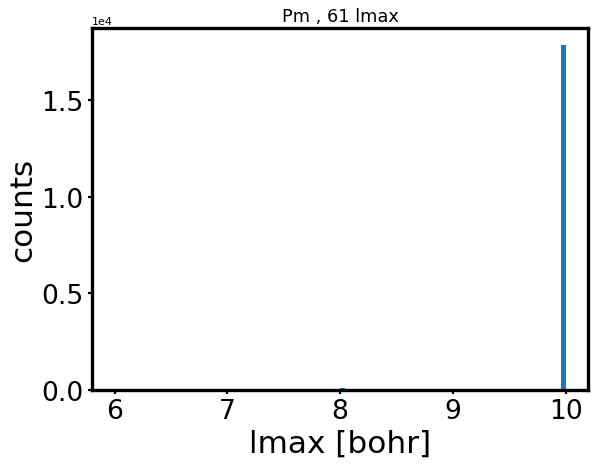

6


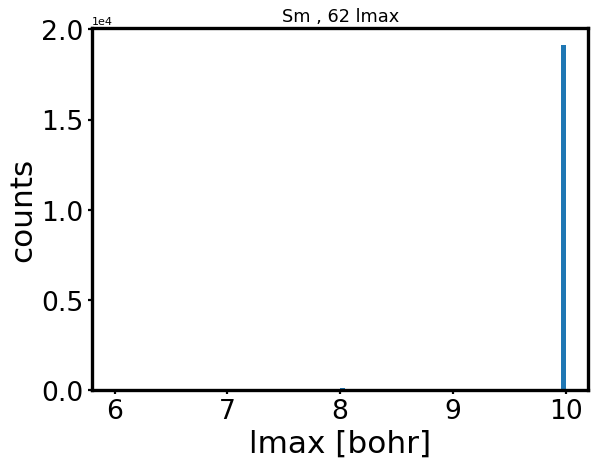

6


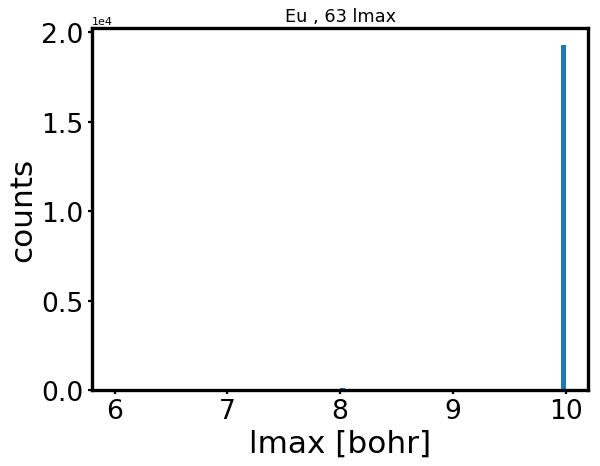

6


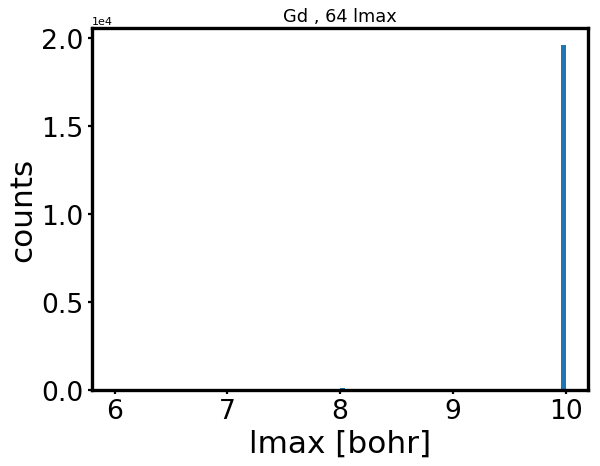

6


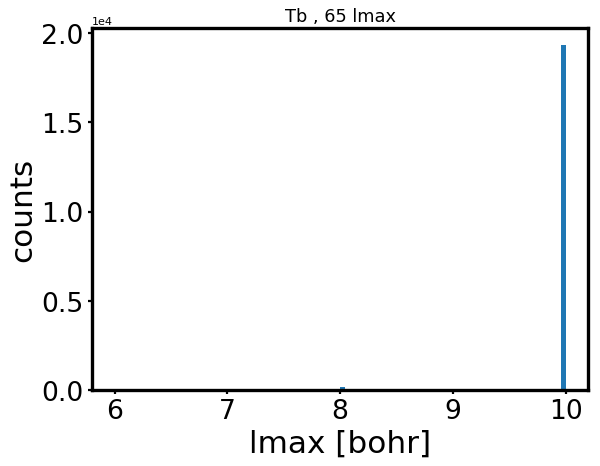

6


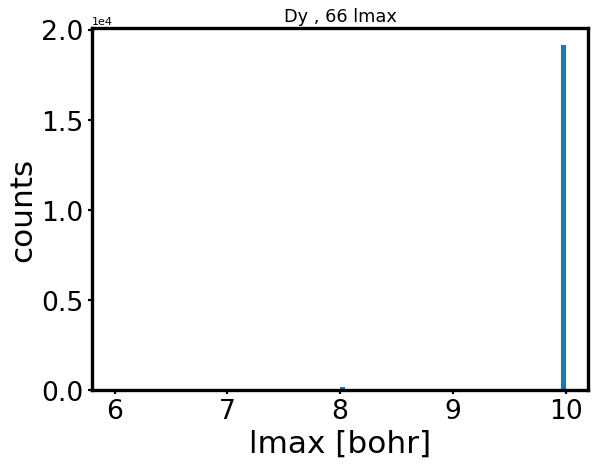

6


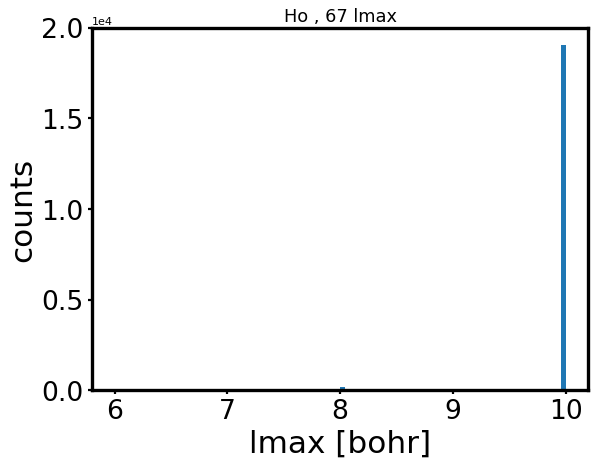

6


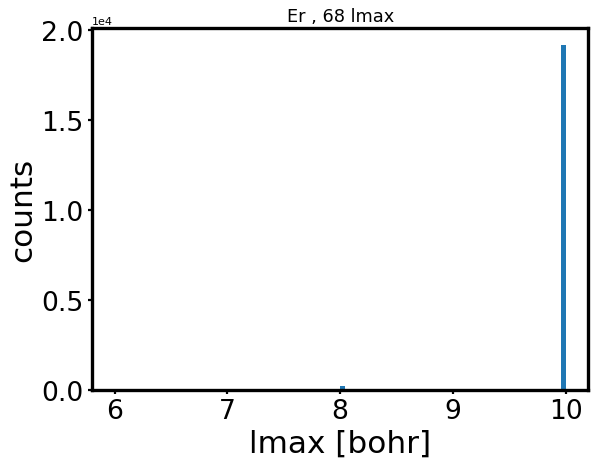

6


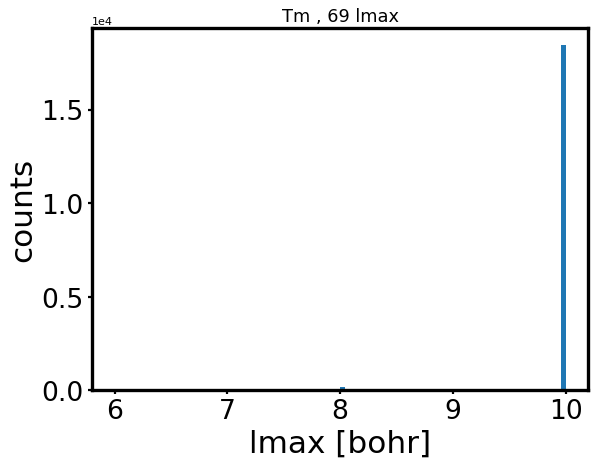

6


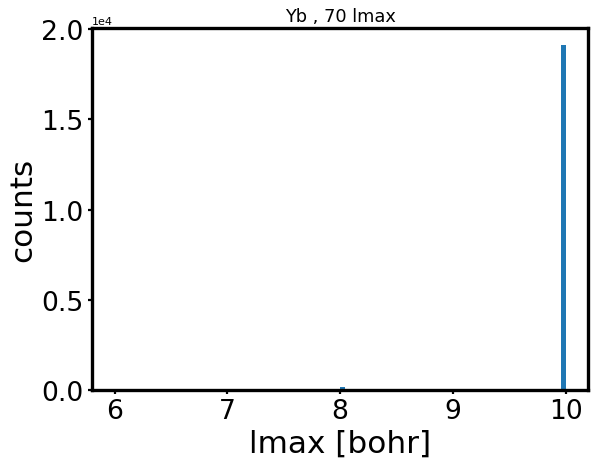

6


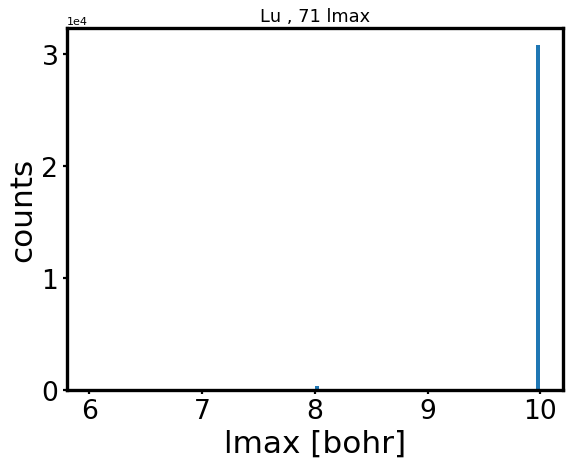

6


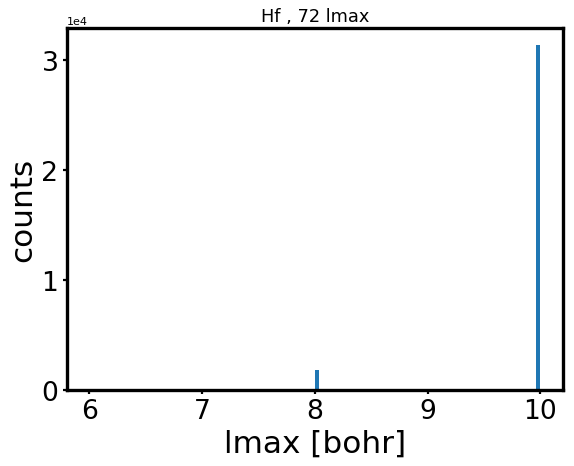

6


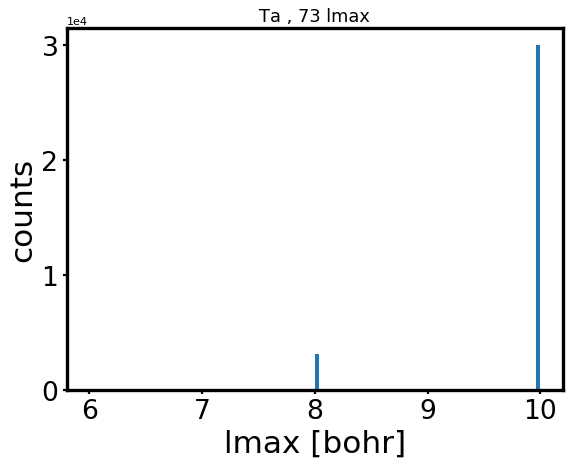

6


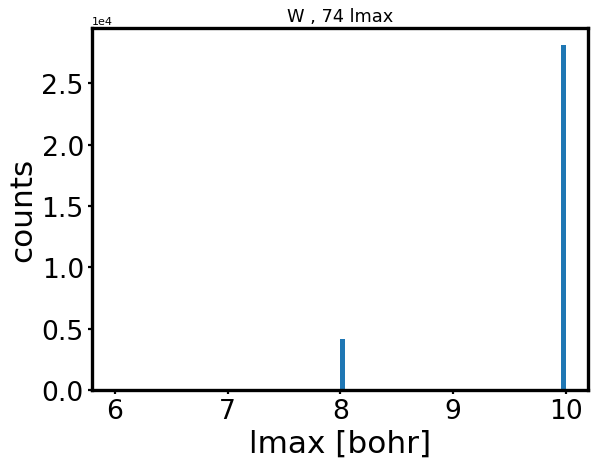

6


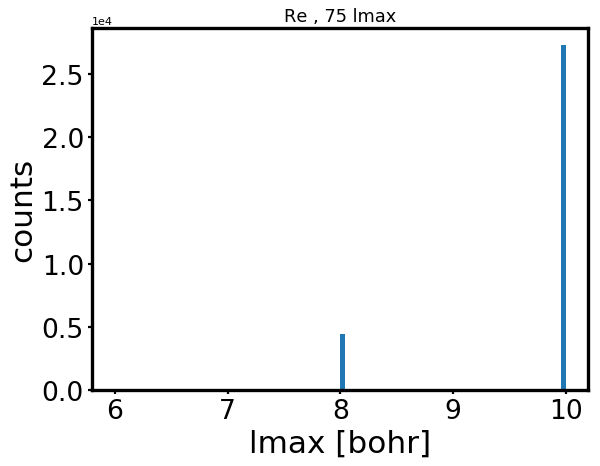

6


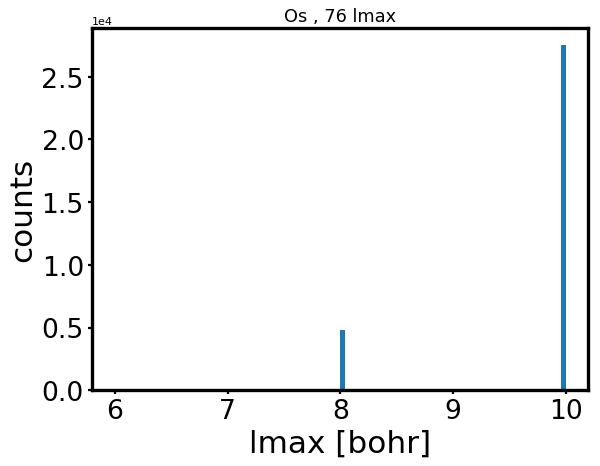

6


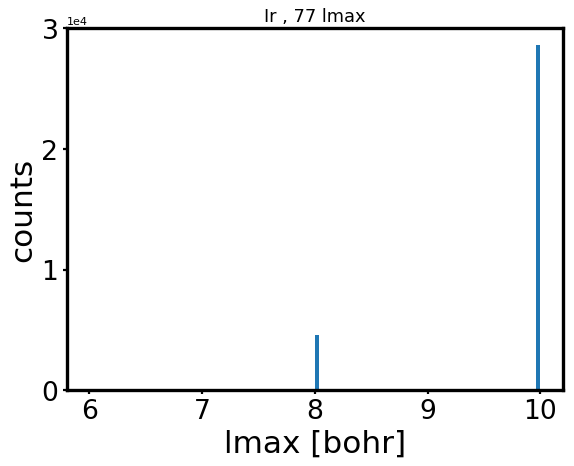

6


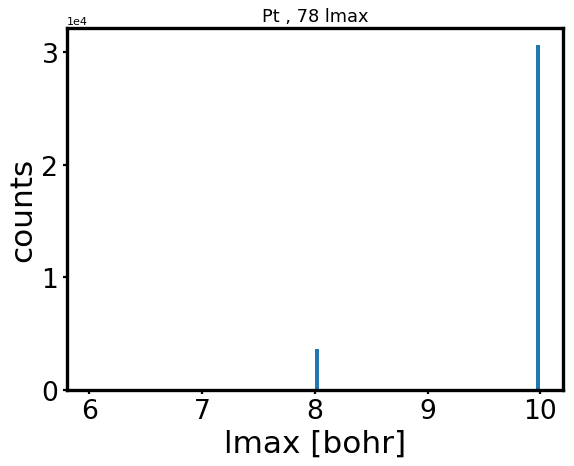

6


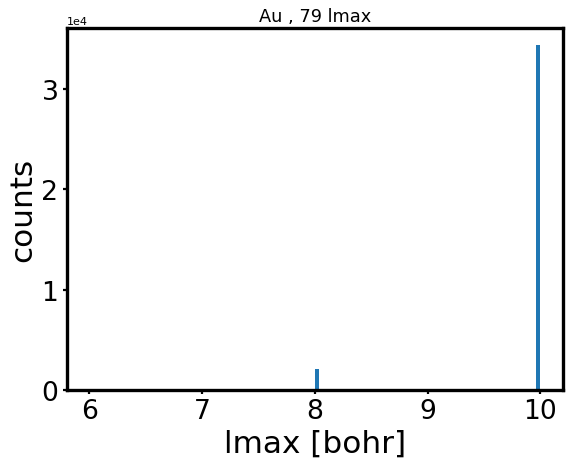

6


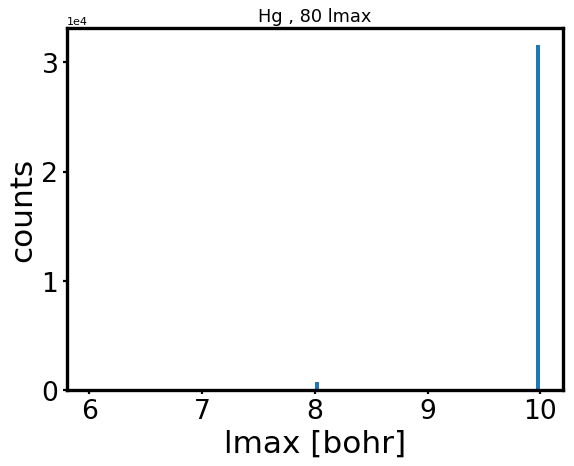

6


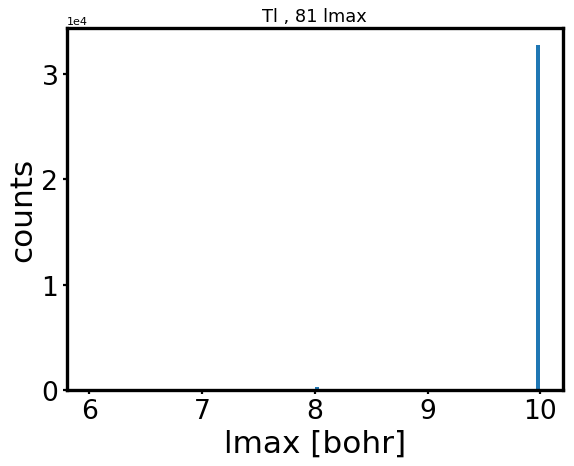

6


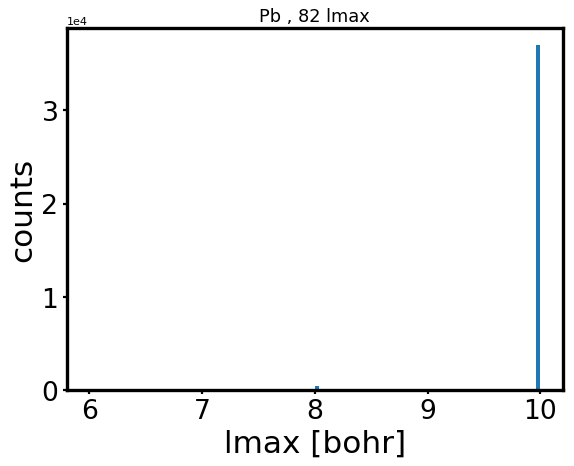

6


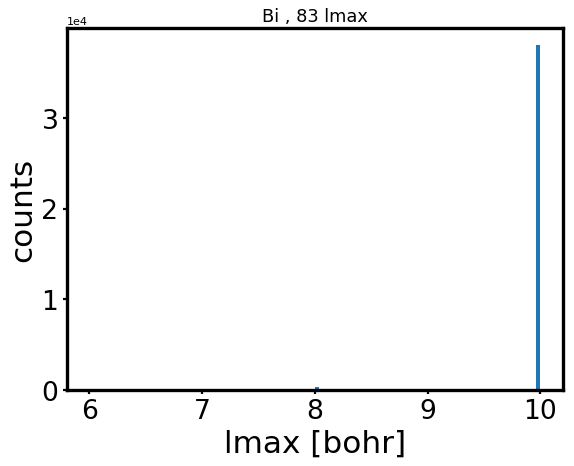

6


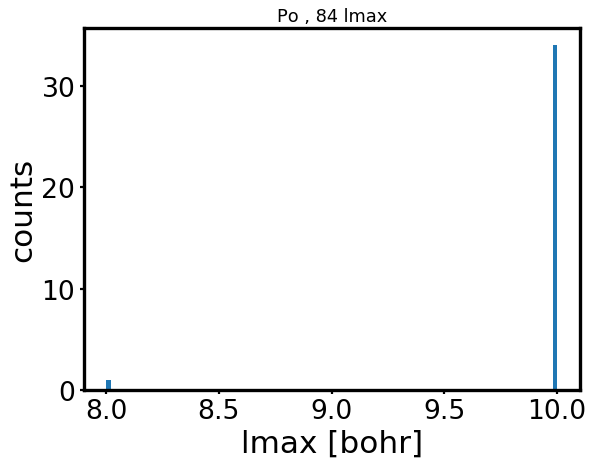

8


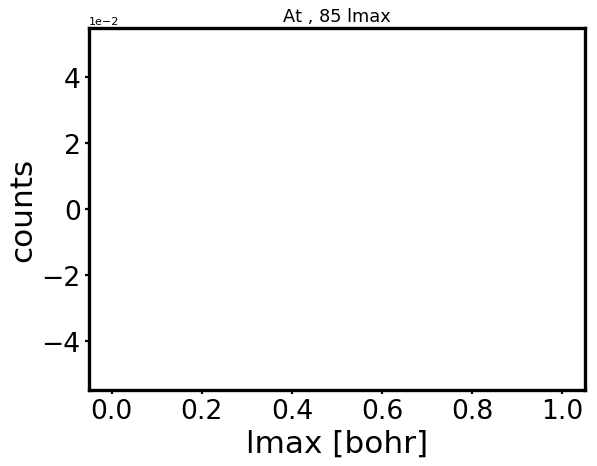

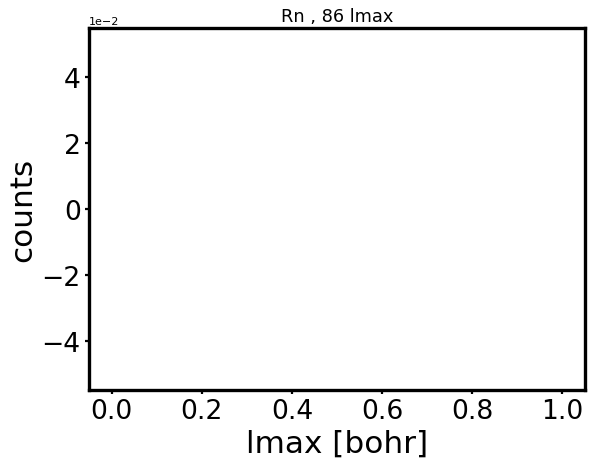

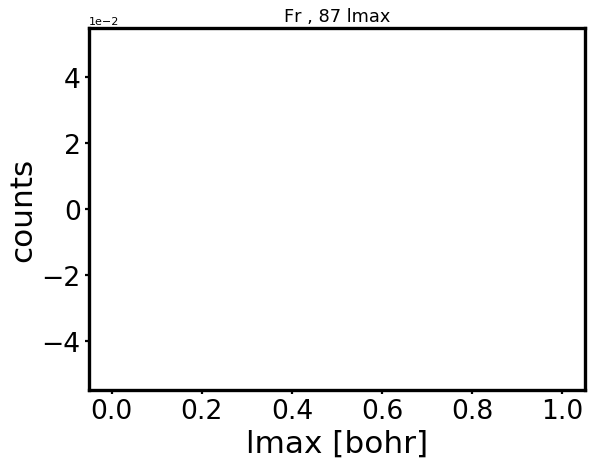

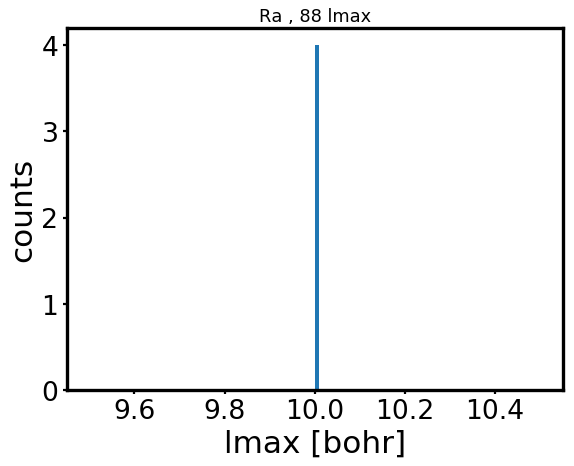

10


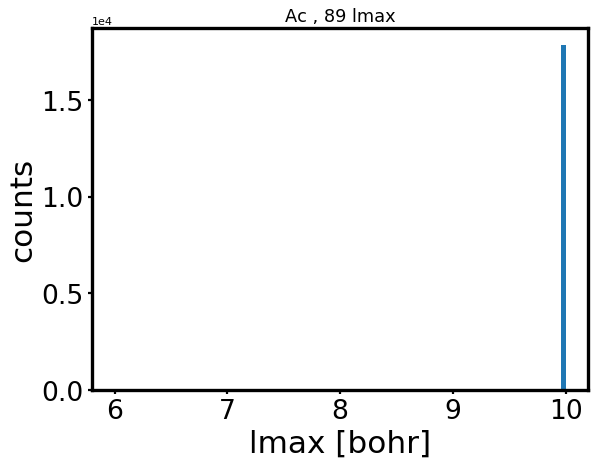

6


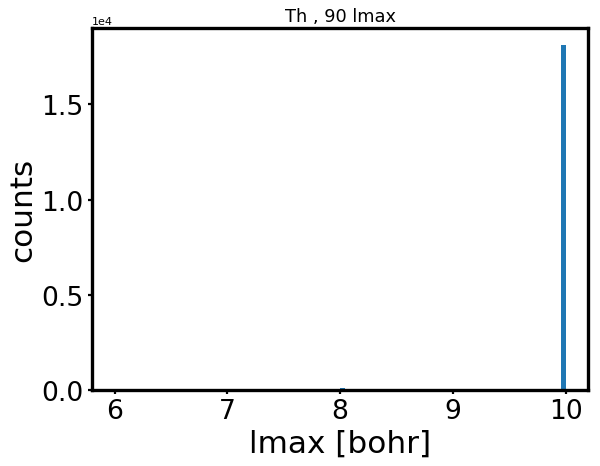

6


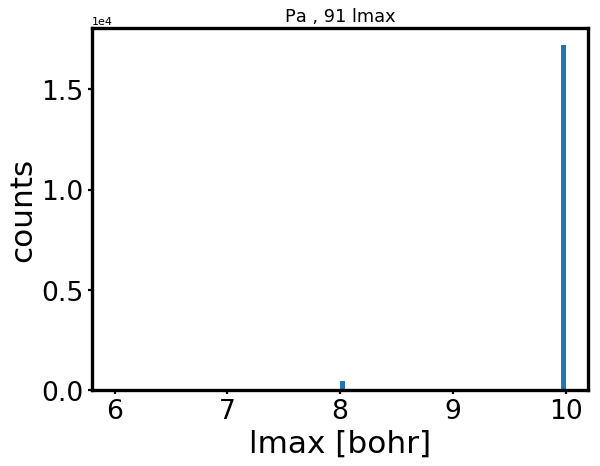

6


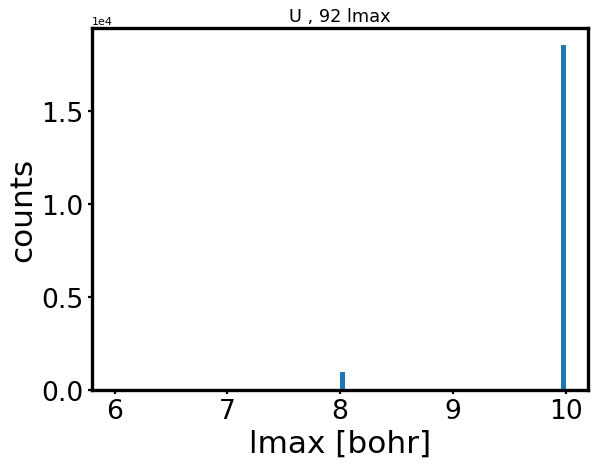

6


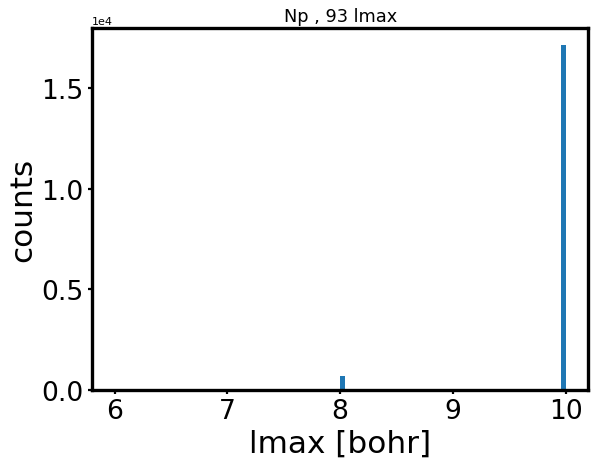

6


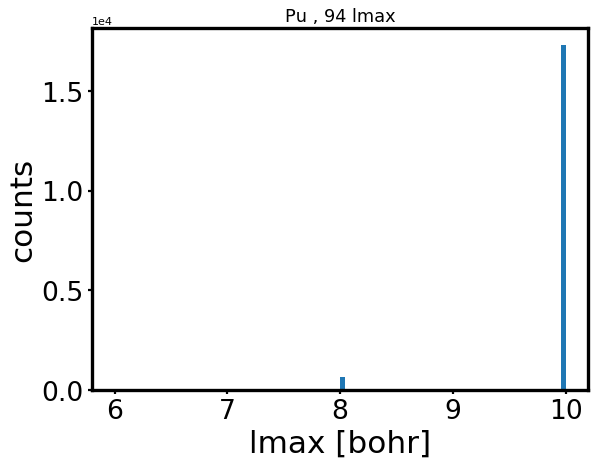

6


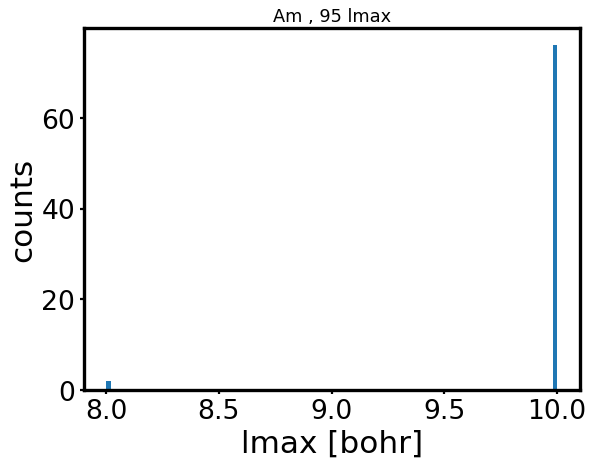

8


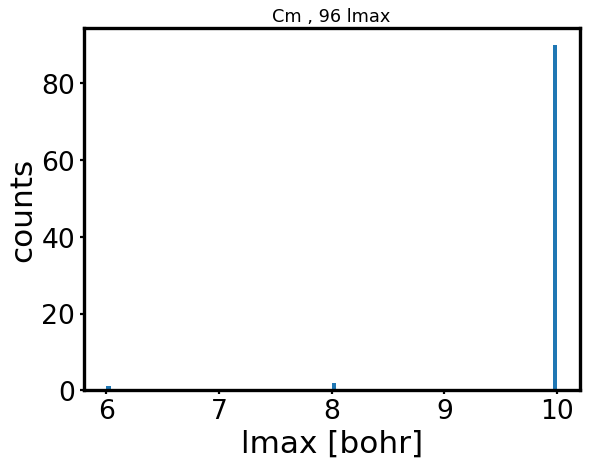

6


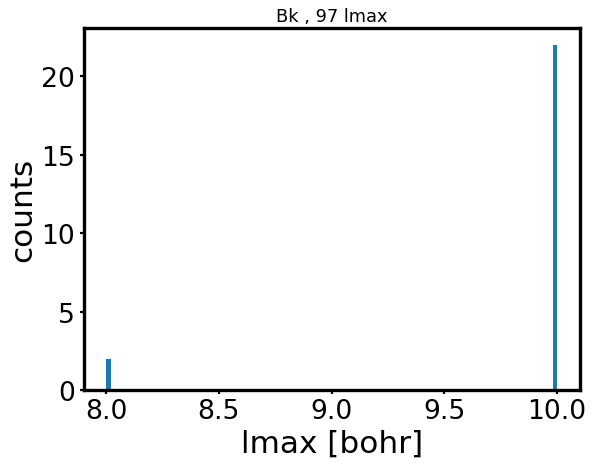

8


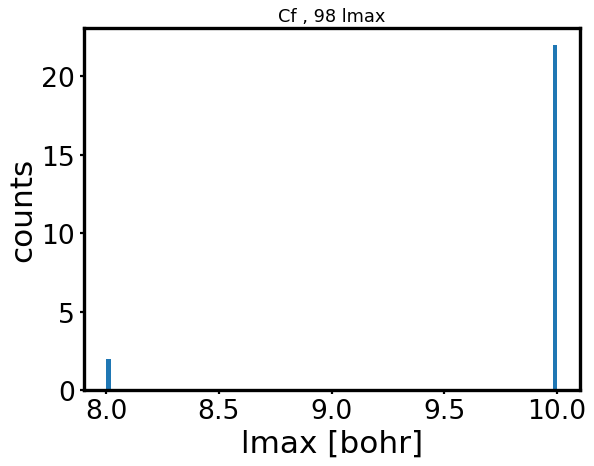

8


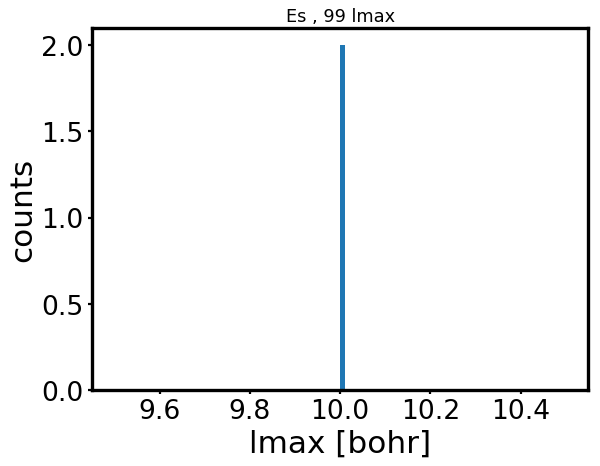

10


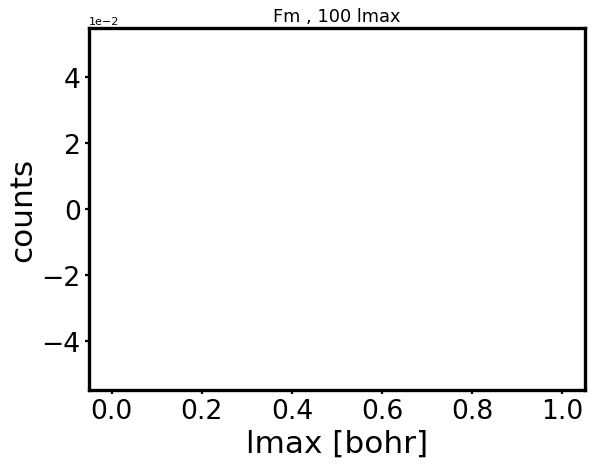

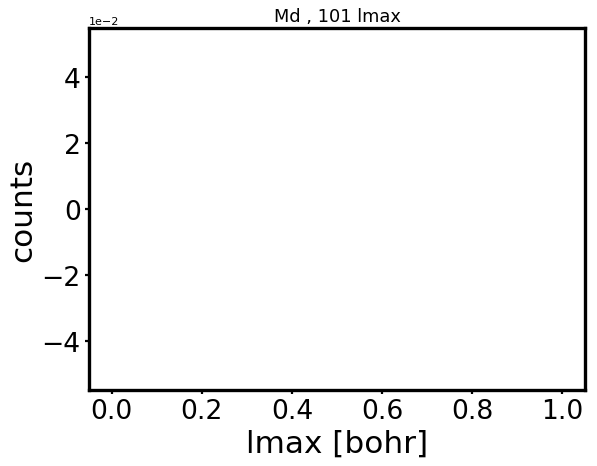

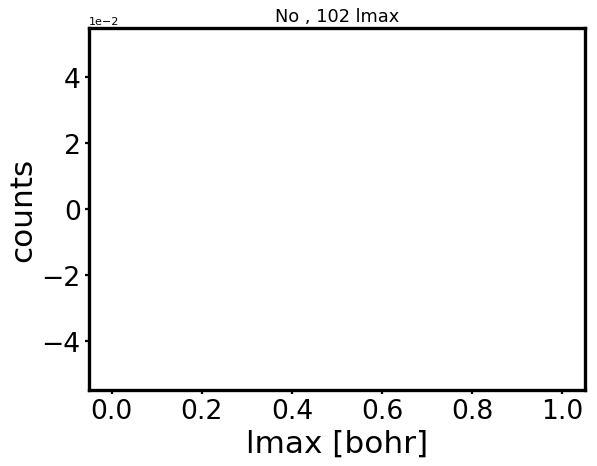

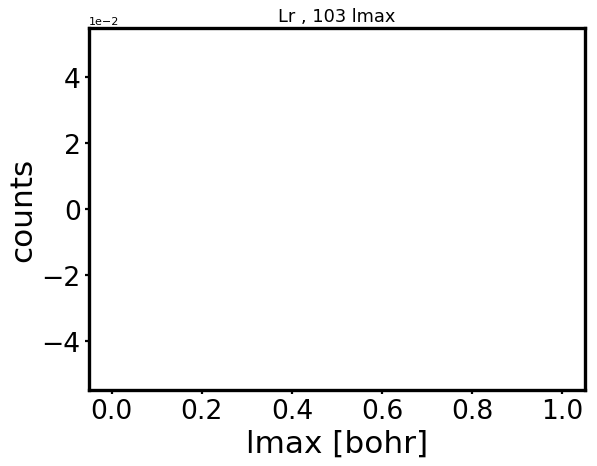

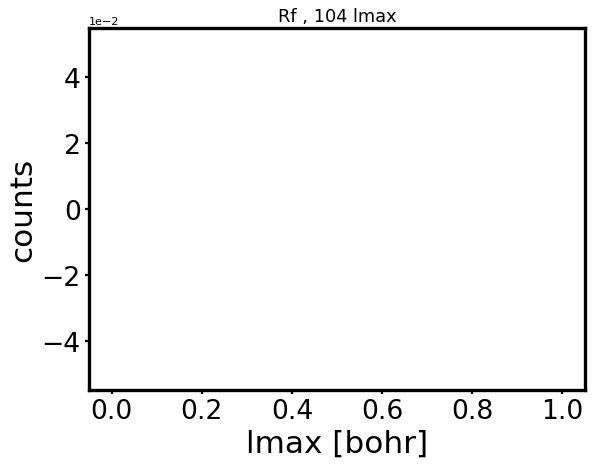

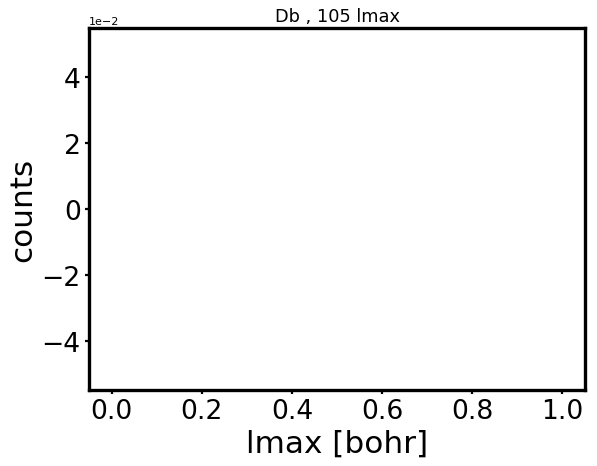

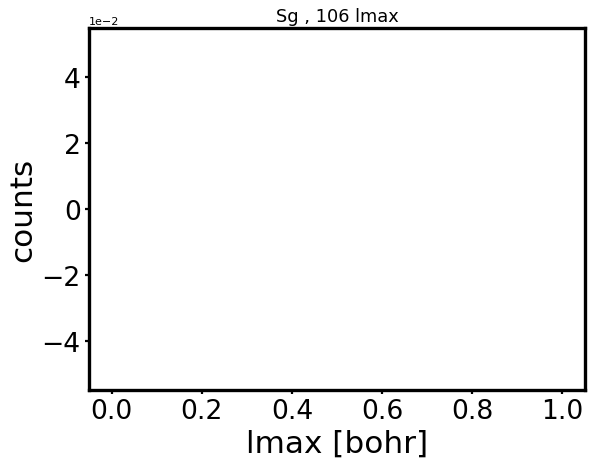

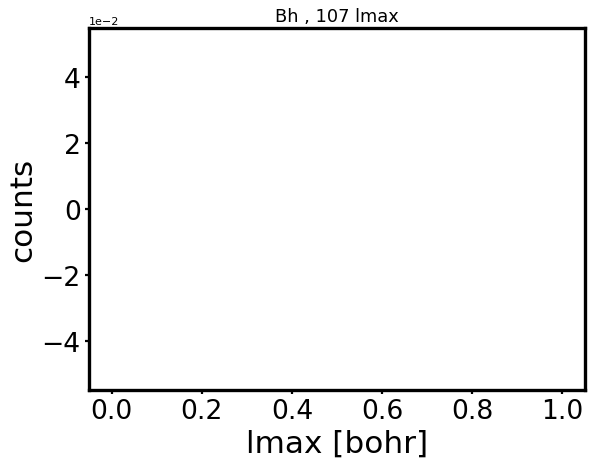

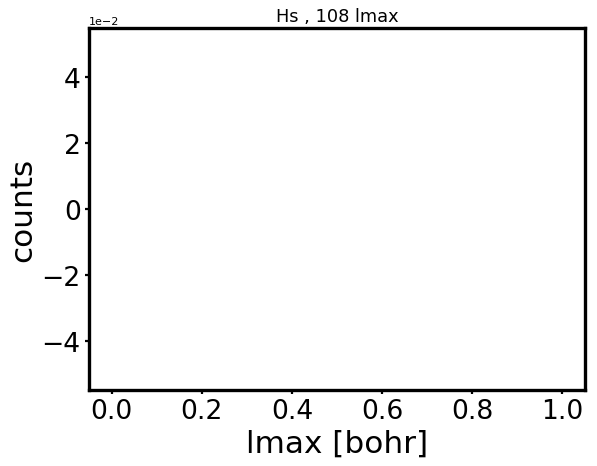

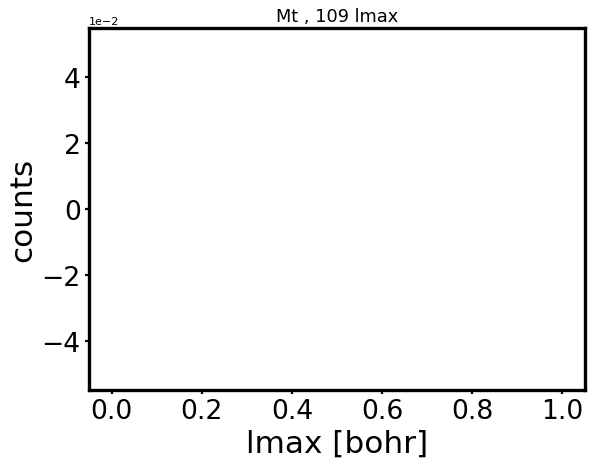

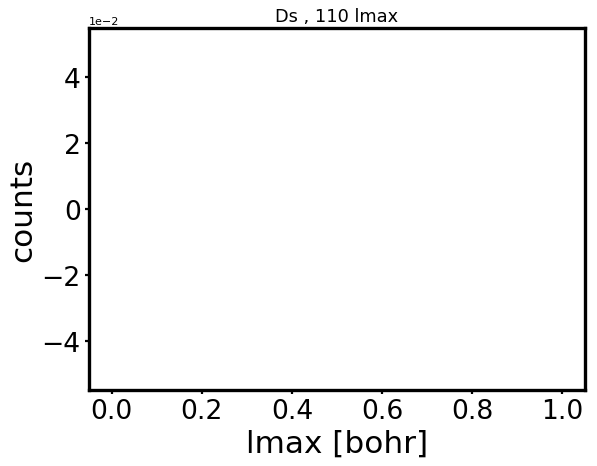

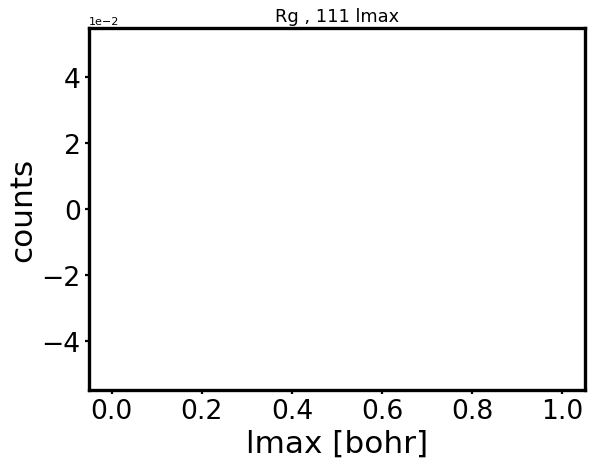

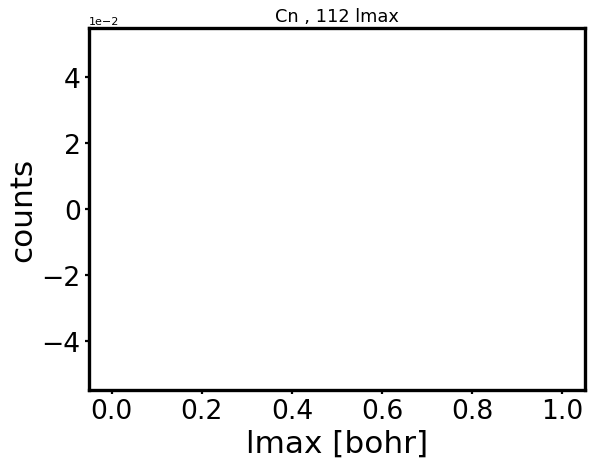

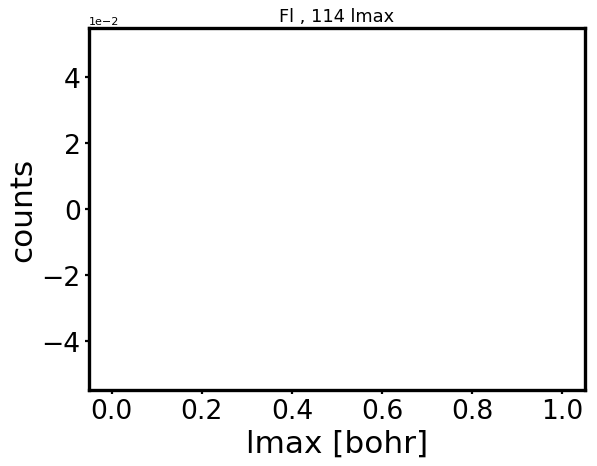

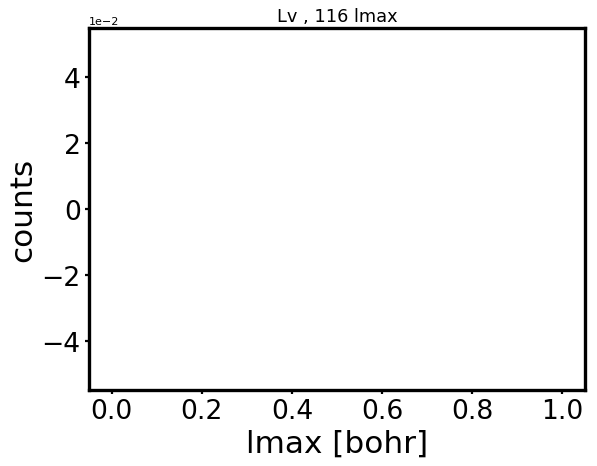

In [62]:
total_lmax = []
total_lmax3 = []
total_lmax_types = {}
for element in elements:
    total_lmax = total_lmax + elemental_dict[str(element)]['lmax']
    total_lmax3.append(elemental_dict[str(element)]['lmax'])
    edtype = element_type2[element]
    lmax_typelist = total_lmax_types.get(edtype, [])
    lmax_typelist = lmax_typelist + elemental_dict[str(element)]['lmax']
    total_lmax_types[edtype] = lmax_typelist
    
    default_histogram(elemental_dict[str(element)]['lmax'], bins=100, 
                      log=False, title='{} , {} lmax'.format(PeriodicTableElements[int(element)]['symbol'], element), 
                      xlabel='lmax [bohr]')
    if elemental_dict[str(element)]['lmax']:
        print(min(elemental_dict[str(element)]['lmax']))

In [63]:
len(total_lmax)

2527205

In [66]:
Counter(total_lmax)

Counter({6: 130224, 8: 307538, 10: 2089443})

In [67]:
total = len(total_lmax)
print(2089443.0/total)
print(307538.0/total)
print(130224.0/total)

0.826780178102
0.121690958984
0.0515288629138


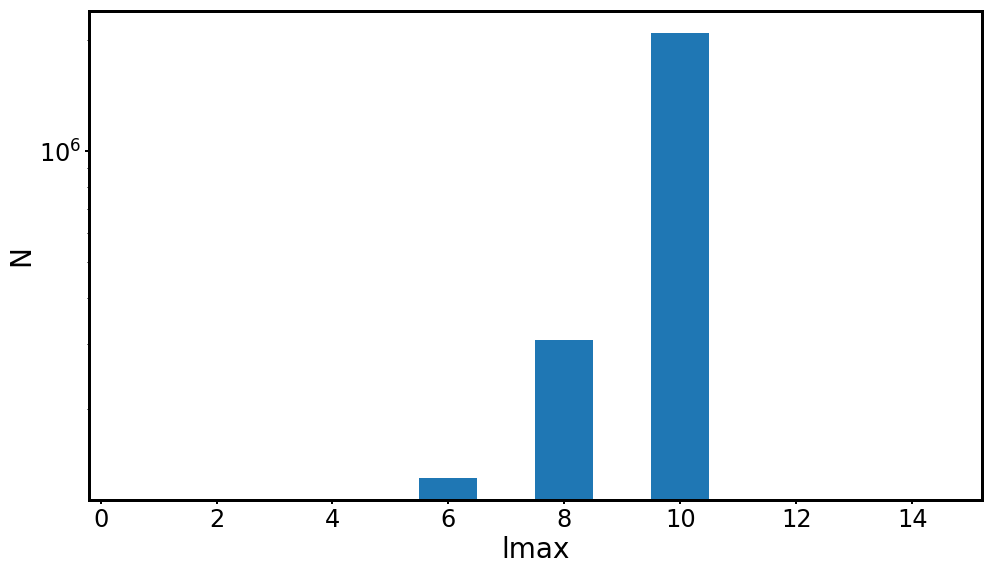

In [72]:
fig = pp.figure(num=None, figsize=(16,9))
ax1 = fig.add_subplot(111)
bins = [i for i in np.linspace(0.5, 14.5, num=15)]
#print(bins)
ax1 = histogram(total_lmax, 
                bins=bins, legend=False, 
                label=['H', 'Alkali & Alkaline earth metal', 'Metalloid', 'Reactive nonmetal', 'Transition metal', 'Post-transition metal', 'Lanthanide & Actinide'],#, 'Nobel gas'], 
                #label=['1s', 's-block', 'p-block', 'd-block', 'f-block'], 
                #range=[0.305,2.905],
                log=True, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                xlabel='lmax', #limits=[[0.305, 3.1],[0, 36000]], #0.3,3.1]
                ylabel=u'N',
                legend_option={'bbox_to_anchor' : (0.05, 0.97), 'fontsize' : 18, 'borderaxespad' : 1 , 'loc' : 2, 'fancybox' : True} #'linewidth' : 1.5,, 'title' : 'Legend',
, density=False, saveas='All_lmax_types_oqmd', axis=ax1)# type=bar_stack



# Look at kmax

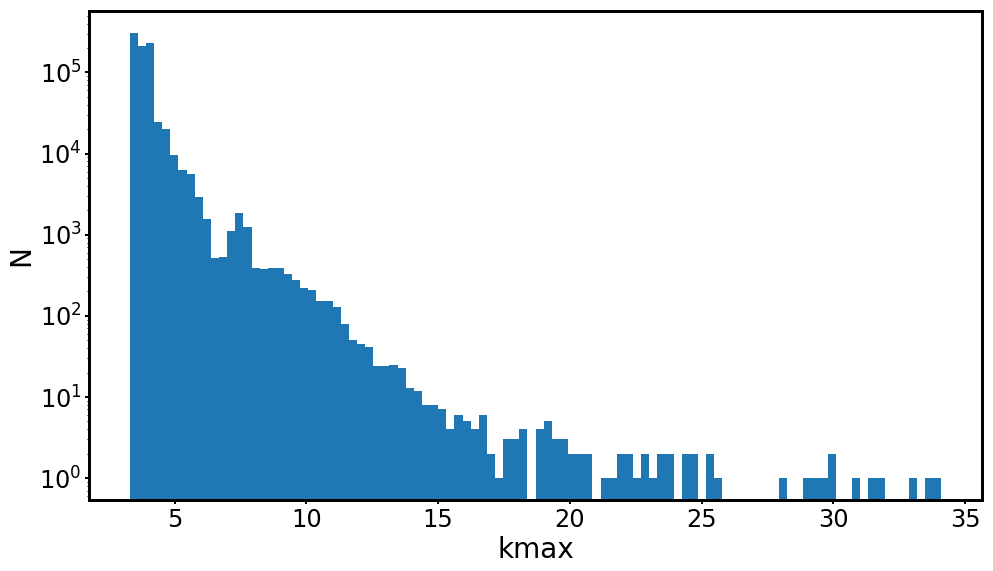

In [69]:
fig = pp.figure(num=None, figsize=(16,9))
ax1 = fig.add_subplot(111)
bins = 100#[i for i in np.linspace(0.0, 14.05, num=15)]
#print(bins)
ax1 = histogram(property_dict['kmax'], 
                bins=bins, legend=False, 
                label=['H', 'Alkali & Alkaline earth metal', 'Metalloid', 'Reactive nonmetal', 'Transition metal', 'Post-transition metal', 'Lanthanide & Actinide'],#, 'Nobel gas'], 
                #label=['1s', 's-block', 'p-block', 'd-block', 'f-block'], 
                #range=[0.305,2.905],
                log=True, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                xlabel='kmax', #limits=[[0.305, 3.1],[0, 36000]], #0.3,3.1]
                ylabel=u'N',
                legend_option={'bbox_to_anchor' : (0.05, 0.97), 'fontsize' : 18, 'borderaxespad' : 1 , 'loc' : 2, 'fancybox' : True} #'linewidth' : 1.5,, 'title' : 'Legend',
, density=False, saveas='All_kmax_types_oqmd', axis=ax1)# type=bar_stack




# Look at combined (kmax*rmt\lmax)

In [ ]:
default_histogram(property_dict['kmax'], bins=40, log=False, title='Plane wave cutoff', xlabel='Kmax', range=[3, 5])

In [ ]:
len(total_combined)

In [ ]:
len(total_rmts)

In [ ]:
total_combined2 = []
for i,ent in enumerate(total_combined):
    total_combined2.append(ent*total_lmax[i])

In [ ]:
xnorm = [i for i in range(1,100)]

In [ ]:
ax = single_scatterplot(total_lmax, total_combined2, xlabel='rmt*kmax', ylabel='lmax', title='', linestyle='', limits=[[3,70], [3,12]])

In [ ]:
ydata = [total_lmax_types['1s'], total_lmax_types['s'], total_lmax_types['p'], total_lmax_types['d'], total_lmax_types['f']]#.values()[:2]
ydata.append(xnorm)
xdata = [total_combined2_types['1s'], total_combined2_types['s'], total_combined2_types['p'],total_combined2_types['d'],total_combined2_types['f']]#.values()[:2]
xdata.append(xnorm)

In [ ]:
print(len(total_lmax_types.values()[0]), len(total_combined2_types.values()[0]))
total_lmax_types.keys()[0]

In [ ]:
ax = multiple_scatterplots(ydata, xdata, xlabel='rmt*kmax', ylabel='lmax', title='', linestyle=['','','','','','-'], limits=[[5,None], [5,11]])

In [ ]:
a =1

In [ ]:
max(total_combined_types['1s']), max(total_combined_types['s']), max(total_combined_types['p'])

In [ ]:
bins = [i for i in np.linspace(0.505, 3.005, num=251)] #+ [i for i in np.linspace(1.30, 3.00, num=100)]
print(bins)
ax = histogram([total_combined_types['1s'],total_combined_types['s'], total_combined_types['p'], total_combined_types['d'], total_combined_types['f']], 
               bins=bins, legend=True, label=['1s', 's', 'p', 'd', 'f'], #range=[0.5, 3],
          log=False, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
         xlabel='kmax*rmt\lmax', limits=[[None,None],[None,None]])#[0, 40000]])#, density=True)# type=bar_stack
#ax.text(-0.01, 0.01, '', fontsize=text_size)



In [ ]:
ax = histogram([total_combined_types['1s'],total_combined_types['s'], total_combined_types['p'], total_combined_types['d'], total_combined_types['f']], bins=100, legend=True, label=['1s', 's', 'p', 'd', 'f'],
          log=True, title='all rmt', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
         xlabel='Muffin tin radius [bohr]')#, limits=[[0.8,7],[0, 8000]])#, density=True)# type=bar_stack
#ax.text(-0.01, 0.01, '', fontsize=text_size)



In [ ]:
histogram(total_combined, bins=201, 
                      log=True, title='combined', 
                      xlabel='combinded should be one', range=[0.9, 2])
print(max(total_combined))
print(min(total_combined))

In [ ]:
default_histogram(property_dict['kmax'], bins=40, log=False, title='Plane wave cutoff', xlabel='Kmax', range=[3, 5])


# Jri and dx

In [ ]:
total_jri = []
total_jri3 = []
total_jri_types = {}
total_dx = []
total_dx3 = []
total_dx_types = {}
for element in elements:
    total_jri = total_jri + elemental_dict[str(element)]['jri']
    total_jri3.append(elemental_dict[str(element)]['jri'])
    edtype = element_type2[element]
    jri_typelist = total_jri_types.get(edtype, [])
    jri_typelist = jri_typelist + elemental_dict[str(element)]['jri']
    total_jri_types[edtype] = jri_typelist
    
    default_histogram(elemental_dict[str(element)]['jri'], bins=100, 
                      log=False, title='{} , {} jri'.format(PeriodicTableElements[int(element)]['symbol'], element), 
                      xlabel='jri')
    #if elemental_dict[str(element)]['jri']:
    #    print(min(elemental_dict[str(element)]['jri']))
    
for element in elements:
    total_dx = total_dx + elemental_dict[str(element)]['dx']
    total_dx3.append(elemental_dict[str(element)]['dx'])
    edtype = element_type2[element]
    dx_typelist = total_dx_types.get(edtype, [])
    dx_typelist = dx_typelist + elemental_dict[str(element)]['dx']
    total_dx_types[edtype] = dx_typelist
    
    default_histogram(elemental_dict[str(element)]['dx'], bins=100, 
                      log=False, title='{} , {} dx'.format(PeriodicTableElements[int(element)]['symbol'], element), 
                      xlabel='dx')

In [ ]:
fig = pp.figure(num=None, figsize=(16,9))
ax1 = fig.add_subplot(111)
bins = 100#[i for i in np.linspace(0.0, 14.05, num=15)]
#print(bins)
ax1 = histogram(total_jri, 
                bins=bins, legend=False, 
                label=['H', 'Alkali & Alkaline earth metal', 'Metalloid', 'Reactive nonmetal', 'Transition metal', 'Post-transition metal', 'Lanthanide & Actinide'],#, 'Nobel gas'], 
                #label=['1s', 's-block', 'p-block', 'd-block', 'f-block'], 
                #range=[0.305,2.905],
                log=False, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                xlabel='jri', #limits=[[0.305, 3.1],[0, 36000]], #0.3,3.1]
                ylabel=u'N',
                legend_option={'bbox_to_anchor' : (0.05, 0.97), 'fontsize' : 18, 'borderaxespad' : 1 , 'loc' : 2, 'fancybox' : True} #'linewidth' : 1.5,, 'title' : 'Legend',
, density=False, saveas='All_jri_types_oqmd', axis=ax1)# type=bar_stack




In [ ]:
fig = pp.figure(num=None, figsize=(16,9))
ax1 = fig.add_subplot(111)
bins = [i for i in np.linspace(0.005, 0.0505, num=101)]
#print(bins)
ax1 = histogram(total_dx, 
                bins=bins, legend=False, 
                label=['H', 'Alkali & Alkaline earth metal', 'Metalloid', 'Reactive nonmetal', 'Transition metal', 'Post-transition metal', 'Lanthanide & Actinide'],#, 'Nobel gas'], 
                #label=['1s', 's-block', 'p-block', 'd-block', 'f-block'], 
                #range=[0.305,2.905],
                log=False, title='', histtype='barstacked',# 'bar', 'barstacked', 'step', 'stepfilled'
                xlabel='dx', #limits=[[0.305, 3.1],[0, 36000]], #0.3,3.1]
                ylabel=u'N',
                legend_option={'bbox_to_anchor' : (0.05, 0.97), 'fontsize' : 18, 'borderaxespad' : 1 , 'loc' : 2, 'fancybox' : True} #'linewidth' : 1.5,, 'title' : 'Legend',
, density=False, saveas='All_dx_types_oqmd', axis=ax1)# type=bar_stack





In [ ]:
##############

In [ ]:
property_dict.keys()

In [ ]:
property_dict['sym_op']

In [ ]:
default_histogram(property_dict['inpgen_symg'], bins=200, log=False, title='Spacegroups', xlabel='sapcegroup')


In [ ]:
default_histogram(property_dict['natomtypes'], bins=100, log=False, title='Spacegroups', xlabel='sapcegroup')


In [ ]:
default_histogram(property_dict['struc_symg'], bins=230, log=False, title='Spacegroups', xlabel='sapcegroup')
max(property_dict['struc_symg'])

In [ ]:
default_histogram(property_dict['nsym_inpgen'], bins=40, log=False, title='Number of symmetry ops', xlabel='nsym')


In [ ]:
elements = [int(elem) for elem in elemental_dict.keys()]
elements.sort()
for element in elements:
    default_histogram(elemental_dict[str(element)]['jri'], bins=100, 
                      log=False, title='{} , {} jri'.format(PeriodicTableElements[int(element)]['symbol'], element), 
                      xlabel='jri gridpoints')

In [ ]:
elements = [int(elem) for elem in elemental_dict.keys()]
elements.sort()
for element in elements:
    default_histogram(elemental_dict[str(element)]['dx'], bins=100, 
                      log=False, title='{} , {} dx'.format(PeriodicTableElements[int(element)]['symbol'], element), 
                      xlabel='dx gridpara')

In [ ]:
for element in elements:
    default_histogram(elemental_dict[str(element)]['combined'], bins=50, 
                      log=False, title='{} , {} combined'.format(PeriodicTableElements[int(element)]['symbol'], element), 
                      xlabel='kmax*rmt/lmax')

In [ ]:
elements = [int(elem) for elem in elemental_dict.keys()]
elements.sort()
#set_plot_defaults(show=False)
fig = pp.figure(figsize=(15, 35))
leng=len(elements)
xgrid = leng#/2+1
ygrid = 2
for i, element in enumerate(elements):
    pass
    #ax = pp.subplot2grid((xgrid, ygrid), (i, 0))#(i/ygrid%xgrid, i%ygrid))
    #default_histogram(elemental_dict[str(element)]['rmt'], bins=100, log=False, 
    #                  title='{} , {} rmt'.format(PeriodicTableElements[int(element)]['symbol'], element), 
    #                  xlabel='Muffin tin radius [bohr]', axis=ax)
    #ax1 = pp.subplot2grid((xgrid, ygrid), (i, 1))#(i/ygrid%xgrid, i%ygrid))
    #default_histogram(elemental_dict[str(element)]['jri'], bins=100, log=False, 
    #                  title='{} , {} jri'.format(PeriodicTableElements[int(element)]['symbol'], element), 
     #                 xlabel='jri', axis=ax1)

In [ ]:
default_histogram(elemental_dict['6']['lmax'],bins=100, log=False)

In [ ]:
default_histogram(elemental_dict['6']['lnonsph'],bins=100, log=False)

In [ ]:
default_histogram(elemental_dict['74']['lmax'],bins=100, log=False)

In [ ]:
default_histogram(elemental_dict['4']['rmt'],bins=100, log=False)

In [ ]:
default_histogram(elemental_dict['8']['rmt'],bins=100, log=False)

In [ ]:
default_histogram(elemental_dict['74']['rmt'],bins=100, log=False)

In [ ]:
default_histogram(elemental_dict['14']['rmt'],bins=100, log=False)

In [ ]:
default_histogram(elemental_dict['22']['rmt'],bins=100, log=False)

In [ ]:
default_histogram()

In [ ]:
df = pd.DataFrame(elemental_dict)


In [ ]:
df

In [ ]:
elemental_dict

In [ ]:
for key, val in elemental_dict.iteritems():
    print(len(val))

In [ ]:
property_dict.keys()

In [ ]:
df = pd.DataFrame()
ncalc = len(property_dict['strucvol'])
for ke, val in property_dict.iteritems():
    if len(val) == ncalc:
        df[ke] = val
    

In [ ]:
df.head

In [ ]:
df['kmax'].mean()

In [ ]:
print(df.shape, df.keys())

In [ ]:
('H' and 'Be') in df['elements'][12]

In [ ]:
for i in range(df.shape[0]):
    print df.loc[i]

In [ ]:
#get rid of anthing containing C and H together, try to get rid of organics
organic = []
for ke in range(df.shape[0]):
    #print ke
    org = 0
    if ('C' and 'H') in df['elements'][ke]:
        org = 1
    organic.append(org)  
  
#print(organic)
df['organic'] = organic
   
       
df_non_organic = df[df.organic != 1]

In [ ]:
df_non_organic.shape

In [ ]:
df_non_organic.head(1)

In [ ]:
df2 = df_non_organic
to_delete = ['rmts', 'lmax', 'los', 'jri', 'dx', 'econfig']
for key in to_delete:
    del df2[key]

In [ ]:
df2.cov()

In [ ]:
df2.describe()

In [ ]:
df2.corr()

In [ ]:
df2.cov?

In [ ]:
c = df.sort_values(['kmax'], ascending=False)
c.head(3)

In [ ]:
c = df.sort_values(['strucvol'], ascending=False)
c.head(3)

In [ ]:
c = df.sort_values(['natoms'], ascending=False)
c.head(5)

In [ ]:
elemental_dict['6']['rmt']

In [ ]:
df3 = pd.DataFrame(elemental_dict)
#df.add(property_dict['kmax'])

In [ ]:
df3.head(2)

In [ ]:
df.